# Wall Street Predictor
* This is application software to predict the daily Standard & Poor of New York Stock Exchange (NYSE) index behavior.
* It is based on the Spikes behavior of the Standard & Poor NYSE symbol SPY.

## Spikes:
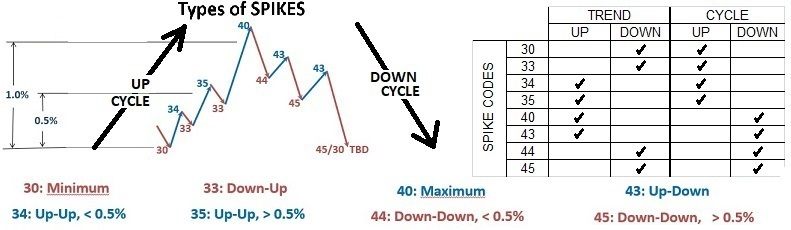
* One spike usually appears two or three times per hour. As soon as it is generated, this app automatically analyse it to find if it is more similar to another one which belong to one UP cycle, or to another one which belong to one DOWN cycle.
* Around 5% of the times, one option investment message is delivered with 95% of accuracy.

## Inputs:
* The following 24 NYSE indicators from January 1st 2015 up today:
* NYSE symbols: COMP, NYA, VIX, SPX
* The following indicators are taking in account for each one of them:
* Last Price
* Exponential Moving averages, length = 60
* Exponential Moving averages, length = 3
* Williams Percent R (stocastic)
* MACD Two Lines Exponential
* MACD Exponential
* These are the 24 Originals Values. Two of them are discard. We call them 22OV.

### Daily:
* During each NYSE round, once each 40 second one picture of these 22OV is taken and it is compared against the historical data, to predict if SPY value will raise or decrease during the current NYSE session.

### Historic:
* This statistic data is used to train the 3 predictors.
* More than 7000 spikes data with these 22 variables and others 68 values generated by this app for each spike/row, form the Historic statistic database, from January 1st 2015 up today. 
* This historic statistics database is updated once a week. 
* It is stored in the Historic DataFrame. 
* It has 90 fields for each row/spike. It includes date and time, code, trend, cycle, the 22OV, 30 first level predictions, and 30 second level predictions. 48 of them are 0.
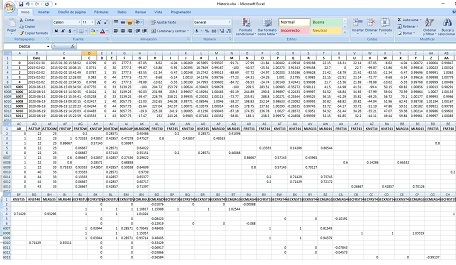
* This is the one of key factors. No one of these 22OV values (NYSE indicators) is available with any Internet API.

## Technologies:
* This application software is developed in Python.
* Machine Learning-Sci Kit Learn, Random Forest, K Nearest Neighbors and Multiple Linear Model Regression technologies tools are used to predict SPY behavior.  

## Code
* This application is based on the following 11 modules:
* 1. Importing Libraries
* 2. Training
* 3. Averages
* 4. Load Fit Data
* 5. Second Spike
* 6. Manual 
* 7. Tuning
* 8. Reset Signals
* 9. API 
* 10. Operation
* 11. Output
* Only the comments lines and the line code numbers are included.

### 1. Importing libraries
* #2. Sklearn, numpy, pandas and others 12 Python libraries are imported.
* #27 End Importing Libraries

### 2. Training
* #2. Random Forest, K Nearest Neighbors and Multiple Lineal Model Regression predictors are trained with the following Historic DataFrame data.
* Spike trend, Column D: it is 1 if the spike trend is UP, codes 34, 35, 40 and 43, and it is 0 if the spike trend is DOWN, as it happens in codes 30, 33, 44 and 45. This value is always knew.
* Spike code, Column E:  30, 33, 34, 35, 40, 43, 44 and 45. Note that column AB for spike codes 30, 33, 34 and 35 is 1, and 0 for spikes codes 40, 43, 44 and 45.
* Cycle, Column AB: it is 1, if the spike belong to one UP cycle, and 0 if it belongs to one DOWN cycle of the SPY.
* Columns F to AA are the original 22 Original value for NYSE indicators, 22OV.
* #23. Random Forest UP/DOWN cycle
* The predictor is trained using the 22OV and column AB. 
* Thus after the predictor be trained, the spike to be analysed will has a greater probability to belong to one UP cycle as its value be closest to 1, and it will has a greater probability to belong to one DWON cycle as its value be closest to 0.
* #26. Define Dataset for UP/DOWN First level training
* #31 Define Dataset for Random Forest UP/DOWN Second level Training, adding the prediction of first level.
* #48. Train and save UP/DOWN Random Forest Predictor, first level
* #55. Train and save UP/DOWN Random Forest Predictor, second level
* #63. Random Forest for codes 30 & 45
* Spike codes 30 & 45 (column E) have both DOWN trend (column D:0), but spike code 30 belong to one UP cycle (Column AB:1) and code 45 spike belong to one DOWN cycle (Column AB:0).
* Thus after the predictor be trained, the spike to be analysed will has a greater probability to be one UP spike code 30 (which belong to one UP cycle) as the prediction value be closest to 1, and it will has a greater probability to be one DOWN spike code 45 (which belong to one DOWN cycle) as the prediction value be closest to 0.
* #75. Define Dataset for spike codes 30 & 45 First level training
* Only rowns/Spikes with code 30 and 45 are used to train this Predictor
* #80. Define Dataset for Random Forest for spikes codes 30 & 45 Second level Training, adding the prediction of first level.
* #94. Train and save 3045 Random Forest Predictor, first level
* #101. Train and save 3045 Random Forest Predictor, second level
* Same analysis is used below.
* #109. Random Forest for codes 33 & 44
* #147. Random Forest for codes 34 & 43
* #185. Random Forest for codes 35 & 40
* #225. K Nearest Neighbors UP/DOWN cycle
* #258. K Nearest Neighbors for codes 30 & 45
* #296. K Nearest Neighbors for codes 33 & 44
* #335. K Nearest Neighbors for codes 34 & 43
* #374. K Nearest Neighbors for codes 35 & 40
* #414. Multiple Linear Regression UP/DOWN cycle
* #447. Multiple Linear Regression for codes 30 & 45
* #485. Multiple Linear Regression for codes 33 & 44
* #523. Multiple Linear Regression for codes 34 & 43
* #561. Multiple Linear Regression for codes 35 & 40
* #636. End of training

### 3. Averages
* This module update the patterns reference values which should be improved by the current spike so that one investment signals can be delivered.
* Patterns DataFrame is a partial view of historic DF. It has the most representative, around 2%, Spikes codes.
* Patterns DF has date & time, code, trend, cycle, 30FBP and 30SBP spike data. 22OV are not included
* We will compare current spike with all the spikes in patterns in order to find if the current has better prediction that someone with the corresponding spike code in patterns.
* To make this comparison we need the averages for the 60 variables, 30FBP plus 30SBP. We wil consider the averages for the complete histaoric DF and another set of averages for the patterns DF, which are a subset of the historic DF.
* ************ BACKTESTING **************
* #54 for all the row/spikes and for the 3 predictor in Historic:
*        FIRST: using the 22OV as input, 6 predictions will be calculated (3 UP/DW and 3 for the spike codes, one for each predictor):
* Probability that it belongs to one UP Cycle, if it did, and update the Historic DF corresponding field
* Probability that it belongs to one DOWN cycle, if it did, and update the Historic DF corresponding field
* Probability that it be one code 30 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 33 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 34 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 35 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 40 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 43 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 44 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 45 spike, if it was, and update the Historic DF corresponding field
* These values will be used as reference to compare current spike.
* Historic DF has 30 columns to store the values for the First level prediction, 24 of them are 0 for each row/spike.
* We call them, 30FBV
*      SECOND: using the 6 values predicted in the previous step as input, another 6 will be updated as a second level prediction: 
* Probability that it belongs to one UP cycle, if it did, and update the Historic DF corresponding field
* Probability that it belongs to one DOWN cycle, if it did, and update the Historic DF corresponding field
* Probability that it be one code 30 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 33 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 34 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 35 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 40 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 43 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 44 spike, if it was, and update the Historic DF corresponding field
* Probability that it be one code 45 spike, if it was, and update the Historic DF corresponding field
* These values will be also used as reference to compare current spike.
* These is a second level prediction. It is the prediction of the prediction.
* Historic DF has 30 columns to store the values for the Second level prediction, 24 of them are 0 for each row/spike.
* We call them 30SBV.
* Historic DF has 90 columns in total. See Input-Historic.
* *************** AVERAGES *****************
* #263. In this module the averages, maximum and minimum values, for historic DF and for patterns DF are calculated and saved to load them further as a fit data.
* #270. patterns = historic's view with the 30 variables/values defined in Backtesting (30BV).
* The averages of each one of them are calculated for the complete Historic DataFrame, and for the patterns view.
* #522. If the Spike belongs to one UP Cycle, the maximum value is stored, else the minimum.
* #650. End of Averages

### 4. Load fit data
* #2. Load trained predictors, spike patterns and averages of backtested predictors data from file to variables.
* #120 End Load Fit Data

### 5. Second Spike
* This function is used in the Manual and Operation module to define the spike to be processed to predict the second level prediction.
* Input: original spike with its 22 originals variables (22OV)
* Output: the original spike with the 30 First Backtesting Values (30FBV) added.
* #79 End Second Spike

### 6. Manual
* Input: one original spike with its 22 original values
* Output: 
*  First Randon Forest Preiction
*  First K Nearest Neigbors Prediction
*  First Multiple Linear Regression Prediction
*  Second Randon Forest Prediction
*  Second K Nearest Neigbors Prediction
*  Second Multiple Linear Regression Prediction

* ****** 6.1. MANUALUP/dOWN
* #17. Read original spike to be predicted
* #24. Random Forest Prediction for the spike
*   The probability that the spike belongs to one UP CYCLE, will be greater if the Random Forest prediction output is closest to 1.
*   The probability that the spike belongs to one DOWN CYCLE, will be greater if the Random Forest prediction output is closest to 0.
* #30. K Nearest Neighbors Prediction for the spike
*   The probability that the spike belongs to one UP CYCLE, will be greater if the K Nearest Neighbors prediction output is closest to 1.
*   The probability that the spike belongs to one DOWN CYCLE, will be greater if the K Nearest Neighbors prediction output is closest to 0.

* #36. Multiple Linear Regression Prediction for the spike
*   The probability that the spike belongs to one UP CYCLE, will be greater if the Multiple Linear Regression prediction output is closest to 1.
*   The probability that the spike belongs to one DOWN CYCLE, will be greater if the Multiple Linear Regression prediction output is closest to 0.
* #47.  Second level Prediction. The prediction of the prediction.
* #48. Define Second Spike
* #50. Random Forest, 2nd level prediction
* #51. Define Second Spike for Random Forest prediction, adding the first level Random Forest predictions
* #54. Second Level Random Forest Prediction for the second spike
*   The probability that the spike belongs to one UP CYCLE, will be greater if the Random Forest second level prediction output is closest to 1.
*   The probability that the spike belongs to one DOWN CYCLE, will be greater if the Random Forest second level prediction output is closest to 0.
* #59. K Nearest Neighbors, 2nd level prediction
* #60. Define Second Spike for K Nearest Neighbors prediction, adding the first level K Nearest Neighbors predictions
* #64. Second Level K Nearest Neighbors Prediction for the second spike
*   The probability that the spike belongs to one UP CYCLE, will be greater if the K Nearest Neighbors second level prediction output is closest to 1.
*   The probability that the spike belongs to one DOWN CYCLE, will be greater if the K Nearest Neighbors second level prediction output is closest to 0.
* #69. Multiple Linear Regression, 2nd level prediction
* #70. Define Second Spike for Multiple Linear Regression prediction, adding the first level Multiple Linear Regression predictions
* #74. Second Level Multiple Linear Regression Prediction for the second spike
*   The probability that the spike belongs to one UP CYCLE, will be greater if the Multiple Linear Regression second level prediction output is closest to 1.
*   The probability that the spike belongs to one DOWN CYCLE, will be greater if the Multiple Linear Regression second level prediction output is closest to 0.
* #85. End of MANUAL10

* ****** 6.2. MANUAL 3045
* This module can be executed as a second prediction, in order to confirm the one of MANUAL 10, in any of this two cases:
* a. if MANUAL 10 forecast predicts that the spike could belong to one UP CYCLE. 
*    This new prediction will tell you the probability that this spike be one spike CODE=30.
* b. if MANUAL 10 forecast predicts that the spike could belong to one DOWN CYCLE.
*    This new prediction will tell you the probability that this spike be one spike CODE=45. 
* It works as a confirmation prediction.
* Forecast Output: 
* Note that the difference between one spike CODE=30 and another one CODE=45, is that the first one belong to one UP trend, and the second one to onw DOWN trend.
* #17. Read original spike to be predicted
* #24. Random Forest 3045 prediction for the spike
* The probability that the spike could be one CODE=30, will be greater if the Random Forest 3045 prediction output is closest to 1.
*   The probability that the spike could be one CODE=45, will be greater if the Random Forest 3045 prediction output is closest to 0.
* #30. K Nearest Neighbors 3045 prediction for the spike
*   The probability that the spike could be one CODE=30, will be greater if the K Nearest Neighbors 3045 prediction output is closest to 1.
*   The probability that the spike could be one CODE=45, will be greater if the K Nearest Neighbors 3045 prediction output is closest to 0.
* #36. Multiple Linear Regression 3045 prediction for the spike
*   The probability that the spike could be one CODE=30, will be greater if the Multiple Linear Regression 3045 prediction output is closest to 1.
*   The probability that the spike could be one CODE=45, will be greater if the Multiple Linear Regression 3045 prediction output is closest to 0.
* #47. Second level 3045 Prediction. The prediction of the prediction.
* #48. Define Second Spike
* #50. Random Forest, 2nd level prediction
* #51. Define Second Spike for Random Forest prediction, adding the first level Random Forest predictions
* #55. Second Level Random Forest 3045 prediction for the second spike
*   The probability that the spike could be one CODE=30, will be greater if the Random Forest second level prediction output is closest to 1.
*   The probability that the spike could be one CODE=45, will be greater if the Random Forest second level prediction output is closest to 0.
* #61. K Nearest Neighbors, 2nd level prediction
* #62. Define Second Spike for K Nearest Neighbors prediction, adding the first level K Nearest Neighbors predictions
* #66. Second Level K Nearest Neighbors 3045 prediction for the second spike
* The probability that the spike could be one CODE=30, will be greater if the K Nearest Neighbors second level prediction output is closest to 1.
*   The probability that the spike could be one CODE=45, will be greater if the K Nearest Neighbors second level prediction output is closest to 0.
* #72. Multiple Linear Regression, 2nd level prediction
* #73. Define Second Spike for Multiple Linear Regression prediction, adding the first level Multiple Linear Regression predictions
* #77. Second Level Multiple Linear Regression 3045 prediction for the second spike
*   The probability that the spike could be one CODE=30, will be greater if the Multiple Linear Regression second level prediction output is closest to 1.
* The probability that the spike could be one CODE=45, will be greater if the Multiple Linear Regression second level prediction output is closest to 0.
* #88 End MANUAL 3045

* ***** 6.3. MANUAL 3344
* Idem MANUAL 3045
* Forecast Output:
* The spike could be one CODE=33, if the prediction is closest to 1.
* The spike could be one CODE=44, if the prediction is closest to 0.
* #59 End Manual 3344
* ***** 6.4. MANUAL 3443
* Idem MANUAL 3045
* Forecast Output:
* The spike could be one CODE=34, if the prediction is closest to 1.
* The spike could be one CODE=43, if the prediction is closest to 0.
* #60 End MANUAL 3443
* ***** 6.5. MANUAL 3540
* Idem MANUAL 3045
* Forecast Output:
* The spike could be one CODE=30, if the prediction is closest to 1.
* The spike could be one CODE=45, if the prediction is closest to 0.
* #59 End MANUAL 3540

### 7. Tuning
* In the Operation Module can be generated 112 different positive signals. Another 112 can be also generated by the else condition.
* Here we will assign one potentiometer to work together its corresponding signal, in order to Tuning each one of these positive signals. If we detect that some signal fails, we will increase the pote to avoid a new wrong signals be delivered again.
* #60 14 Potes for signals corresponding to first prediction, trend up, 1/2/3 conditions (codes 30/33). CODEWINFIRUP 
* #75 14 Potes for signals corresponding to first prediction, trend down, 1/2/3 condition (codes 40/43). CODEWINFIRDW
* #90 14 Potes for signals corresponding to first prediction, trend up, 1/2/3 conditions (codes 34/35) CODEWINFIRNOTUP 
* #105 14 Potes for signals corresponding to first prediction, trend down, 1/2/3 condition (codes 40/43).CODEWINFIRNOTDW 
* #121 14 Potes for signals corresponding to second prediction, trend up, 1/2/3 conditions (codes 30/33). CODEWINSECUP
* #136 14 Potes for signals corresponding to second prediction, trend down, 1/2/3 condition (codes 40/43). CODEWINSECDW
* #151 14 Potes for signals corresponding to second prediction, trend up, 1/2/3 conditions (codes 34/35) CODEWINSECNOTUP 
* #166 14 Potes for signals corresponding to second prediction, trend down, 1/2/3 condition (codes 40/43).CODEWINSECNOTDW 
* #184 End of Tuning

### 8. Reset Signals
* signals DataFrame is reseted, so that the daily spike can be proceseed again.
* #19 End of Reset signals

### 9. API
* Each 40 second one NYSE picture with the 24OV is taken. 
* If it correspond to one Spike, it will added to the Spike Historic DataFrame, so that it  
* can be predicted if it could one investment opportunity or not.
* It is executed by one external Excel Macro which import the 24OV from one NYSE broker

### 10. Operation
* #24   while NYSE session is open, do the following once each 40 seconds: 
* #29.      Read current Spike to be analysed
* #54       while SpikeHistoric has new daily Spike:
* #62.          Predict Randon Forest for original spike
* #65.          Predict K Nearest Neighbors for original spike
* #72.          Predict Multiple Linear Regression for original spike
*               #### SECOND LEVEL PREDICTION
* #83####### random Forest ###### 8 
* #84           Define Second Spike
* #98. Predict Random Forest, Second Level Prediction
* #105#### Knearest ########
* #107. Define Second Spike  
* #111. Predict K Nearest Neighbors, Second Level Prediction
* #116##### MLRG #######
* #119. Define Second Spike  
* #122. Predict Multiple Linear Regression, Second Level Prediction
* #178. We are going to see if the predition we have just calculated are better than any of them for some spike in the patterns DF.
* #180          for each spike in patterns: #180
* #191              if current spike trend is UP
* #194                  if current spike's 3 predictions are greater than some spike in patterns with code 34/35 & its average
* #226                                  INVEST1="UP34"; else: "PU34" 
* #255                                  INVEST1="UP35"; else: "PU35"
* #261                  if current spike's 3 predictions are lower than some spike in patterns with code 40/43 & its average
* #293                                  INVEST1="DW40"; else: "WD40"
* #322                                  INVEST1="DW43"; else: "WD43"
* #328                  if current spike's 2 predictions are greater than some spike in patterns with code 34/35 & its average
* #351                                      INVEST1="UPFK34"; else: "PUFK34"
* #372                                      INVEST1="UPFK35"; else: "PUFK35"
* #399                                      INVEST1="UPFM34"; else: "PUFM34"
* #420                                      INVEST1="UPFM35"; else: "PUFM35"
* #447                                      INVEST1="UPKM34"; else: "PUKM34"
* #468                                      INVEST1="UPKM35"; else: "PUKM35"
* #474                  if current spike's 2 predictions are lower than some spike in patterns with code 40/43 & its average
* #495                                      INVEST1="DWFK40"; else: "WDFK40"
* #521                                      INVEST1="DWFK43"; else: "WDFK43"
* #542                                      INVEST1="DWFM40"; else: "WDFM40" 
* #563                                      INVEST1="DWFM43"; else: "WDFM43"
* #589                                      INVEST1="DWKM40"; else: "WDKM40"
* #610                                      INVEST1="DWKM43"; else: "WDKM43"
* #616                      if current spike's 1 prediction are greater than some spike in patterns with code 34/35 & its average
* #633                                          INVEST1="UPF34"; else: "PUF34"
* #648                                          INVEST1="UPF35"; else: "PUF35"
* #670                                          INVEST1="UPK34"; else: "PUK34"
* #685                                          INVEST1="UPK35"; else: "PUK35"
* #707                                          INVEST1="UPM34"; else: "PUM34"
* #722                                          INVEST1="UPM35"; else: "PUM35"
* #728                      if current spike's 1 prediction are lower than some spike in patterns with code 40/43 & its average
* #743                                          INVEST1="DWF40"; else: "WDF40"
* #758                                          INVEST1="DWF43"; else: "WDF43"
* #779                                          INVEST1="DWK40"; else: "WDK40"
* #794                                          INVEST1="DWK43"; else: "WDK43"
* #815                                          INVEST1="DWM40"; else: "WDM40"
* #830                                          INVEST1="DWM43"; else: "WDM43"
* #836              if current spike trend is DWON           
* #845                  if current spike's 3 predictions are greater than some spike in patterns with code 30/33 & its average
* #878                                  INVEST1="UP30"; else: "PU30"
* #910                                  INVEST1="UP33"; else: "PU33"
* #930                  if current spike's 3 predictions are lower than some spike in patterns with code 44/45 & its average
* #949                                  INVEST1="DW44"; else: "WD44"
* #978                                  INVEST1="DW45"; else: "WD45"
* #1000                 if current spike's 2 predictions are greater than some spike in patterns with code 30/33 & its average
* #1008                                     INVEST1="UPFK30"; else: "PUFK30"
* #1031                                     INVEST1="UPFK33"; else: "PUFK33"
* #1062                                     INVEST1="UPFM30"; else: "PUFM30"
* #1098                                     INVEST1="UPFM33"; else: "PUFM33"
* #1121                                     INVEST1="UPKM30"; else: "PUKM30"
* #1144                                     INVEST1="UPKM33"; else: "PUKM33"
* #1152                     if current spike's 2 predictions are lower than some spike in patterns with code 44/45 & its average
* #1176                                     INVEST1="DWFK44"; else: "WDFK44"
* #1196                                     INVEST1="DWFK45"; else: "WDFK45"
* #1226                                     INVEST1="DWFM44"; else: "WDFM44"
* #1247                                     INVEST1="DWFM45"; else: "WDFM45"
* #1274                                     INVEST1="DWKM44"; else: "WDKM44"
* #1295                                    INVEST1="DWKM45"; else: "WDKM45"
* #1302                     ## FIRST DOWN ONE CONDITION 30/33 ### 1302
* #1305                         if current spike's 1 prediction are greater than some spike in patterns with code 30/33 & its average
* #1321                                         INVEST1="UPF30"; else: "PUF30"
* #1338                                         INVEST1="UPF33"; else: "PUF33"
* #1363                                         INVEST1="UPK30"; else: "PUK30"
* #1379                                         INVEST1="UPK33"; else: "PUK33"
* #1405                                         INVEST1="UPM30"; else: "PUM30"
* #1422                                         INVEST1="UPM33"; else: "PUM33"
* #1425                         if current spike's 1 prediction are lower than some spike in patterns with code 44/45 & its average
* #1449                                         INVEST1="DWF44"; else: "WDF44"
* #1453                                         INVEST1="DWF45"; else: "WDF45"
* #1485                                         INVEST1="DWK44"; else: "WDK44"
* #1580                                         INVEST1="DWK45"; else: "WDK45"
* #1522                                         INVEST1="DWM44": else: "WDM44"
* #1537                                         INVEST1="DWM45"; else: "WDM45"
* #1546              if new    S E C O N D   spike trend is UP
* #1548                 if current spike's 3 predictions are greater than some spike in patterns with code 34/35 & its average
* #1593                                 INVEST2="U234"; else: "P234"
* #1619                                 INVEST2="U235"; else: "P235"
* #1622                 ##### SECOND UP THREE CONDITION  40/43 #######
* #1650                                 INVEST2="D240"; else: "W240"
* #1677                                 INVEST2="D243"; else: "W243"
* #1684                 ##### SECOND UP TWO CONDITION ####### 1684
* #1686                     ##### SECOND TWO CONDITION UP 34/35 ####### 1686
* #1717                                     INVEST2="U2FK34"; else: "P2FK34"
* #1736                                     INVEST2="U2FK35"; else: "P2FK35"
* #1770                                     INVEST2="U2FM34"; else: "PEFM34"
* #1789                                     INVEST2="U2FM35"; else: "P2FM35"
* #1822                                     INVEST2="U2KM34"; else: "P2KM34"
* #1841                                     INVEST2="U2KM35"; else: "P2KM35"
* #1849                     ##### SECOND TWO CONDITION UP 40/43 ####### 1849
* #1870                                     INVEST2="D2FK40"; else: "W2FK40"
* #1890                                     INVEST2="D2FK43"; else: "W2FK43"
* #1915                                     INVEST2="D2FM40"; else: "W2FM40"
* #1935                                     INVEST2="D2FM43"; else: "W2FM43"
* #1960                                     INVEST2="D2KM40"; else: "W2KM40"
* #1980                                     INVEST2="D2KM43"; else: "W2KM43"
* #1989                     ##### SECOND UP ONE CONDITION 34/35 & 40/43 ####### 1989
* #2015                                         INVEST2="U2F34"; else: "P2F34"
* #2029                                         INVEST2="U2F35"; else: "PEF35"
* #2055                                         INVEST2="U2K34"; else: "P2K34"
* #2060                                         INVEST2="U2K35"; else: "P2K35"
* #2096                                         INVEST2="U2M34"; else: "P2M34"
* #2110                                         INVEST2="U2M35"; else: "P2M35"
* #2117                         ## elif < f  40/43 2117
* #2132                                         INVEST2="D2F40"; else: "W2F40"
* #2147                                         INVEST2="D2F43"; else: "W2F43"
* #2166                                         INVEST2="D2K40"; else: "W2K40"
* #2181                                         INVEST2="D2K43"; else: "W2K43"
* #2200                                         INVEST2="D2M40"; else: "W2M40"
* #2215                                         INVEST2="D2M43"; else: "W2M43"
* #2222             if new  S E C O N D  spike trend is DOWN               
* #2224                 if current spike's 3 predictions are greater than some spike in patterns with code 30/33 & its average
* #2254                                 INVEST2="U230"; else: "P230"
* #2283                                 INVEST2="U233"; else: "P233"
* #2290                 if current spike's 3 predictions are lower than some spike in patterns with code 44/45 & its average
* #2316                                 INVEST2="D244"; else: "W244"
* #2342                                 INVEST2="D245"; else: "W245"
* #2348                 ##### SECOND TWO CONDITION DOWN ####### 2348 
* #2350                    if current spike's 2 predictions are greater than some spike in patterns with code 30/33 & its average
* #2374                                     INVEST2="U2FK30"; else: "P2FK30"
* #2394                                     INVEST2="U2FK33"; else: "P2FK33"
* #2422                                     INVEST2="U2FM30"; else: "P2FM30"
* #2445                                     INVEST2="U2FM33"; else: "P2FM33"
* #2476                                     INVEST2="U2KM30"; else: "P2KM30"
* #2496                                     INVEST2="U2KM33"; else: "P2KM33"
* #2504                    if current spike's 2 predictions are lower than some spike in patterns with code 44/45 & its average
* #2526                                     INVEST2="D2FK44"; else: "W2FK44"
* #2545                                     INVEST2="D2FK45"; else: "W2FK45"
* #2570                                     INVEST2="D2FM44"; else: "W2FM44"
* #2589                                     INVEST2="D2FM45"; else: "W2FM45"
* #2614                                     INVEST2="D2KM44"; else: "W2KM44"
* #2633                                     INVEST2="D2KM45"; else: "W2KM45"
* #2640                     if current spike's 1 prediction are greater than some spike in patterns with code 30/33 & its average
* #2659                                         INVEST2="U2F30"; else: "P2F30"
* #2674                                         INVEST2="U2F33"; else: "P2F33"
* #2696                                         INVEST2="U2K30"; else: "P2K30"
* #2711                                         INVEST2="U2K33"; else: "P2K33"
* #2732                                         INVEST2="U2M30"; else: "P2M30"
* #2747                                         INVEST2="U2M33"; else: "P2M33"
* #2757                     if current spike's 1 prediction are lower than some spike in patterns with code 44/45 & its average
* #2770                                         INVEST2="D2F44"; else: "W2F44"
* #2784                                         INVEST2="D2F45"; else: "W2F45"
* #2804                                         INVEST2="D2M44"; else: "W2M44"
* #2818                                         INVEST2="D2K45"; else: "W2K45"
* #2838                                         INVEST2="D2M44"; else: "W2M44"
* #2852                                         INVEST2="D2M45"; else: "W2M45"
* #2858        ##### O P E N     F I R S T ###### 2858
* #2902               if end of last FIRST signal == 30/33 & ends of previous last FIRST signal == 34/35:
*                         append spike & signalcode to signals DF
*                         send whatsapp "BUY CALLs"
*                         Beep
* #2902               if end of last FIRST signal == 40/43 & ends of previous last FIRST signal == 44/45:
*                         append spike & signalcode to signals DF
*                         send whatsapp "BUY PUTs"
*                         Beep
* #3104       ############################# C L O S I N G   F I R S T #
*             When takeprofit or stoploss SPY values are reached, close spike row in signals DF
* #3140      ##### O P E N     S E C O N D ######
* #3181               if end of last SECOND signal == 30/33 & ends of previous last SECOND signal == 34/35:
*                         append spike & signalcode to signals DF
*                         send whatsapp "BUY CALLs"
*                         Beep
* #3288               if end of last SECOND signal == 40/43 & ends of previous last SECOND signal == 44/45:
*                         append spike & signalcode to signals DF
*                         send whatsapp "BUY PUTs"
*                         Beep
* #3395       ############################# C L O S I N G   S E C O N D  ##
*             When takeprofit or stoploss SPY values are reached, close spike row in signals DF
* #3449    print(signals_final)
* #3486 print("CLOSED")
* #3487 print("Close and Save signals")
* End of Operation

### 10. Output
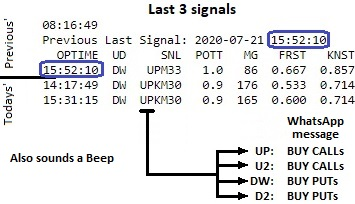

## Contact
Mario Schmidt
WA: +5491138180265

In [1]:
# 1. Importing Libraries
#2. Sklearn, numpy, pandas and others Python libraries are imported.
print("Importing Libraries. Please wait...")
import sklearn
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
#from keras.models import load_model
import time
import os
import winsound
from IPython.display import clear_output
from threading import Timer
from sklearn import linear_model
from dateutil import parser
from twilio.rest import Client
account_sid = 'AC4602b98e73f1a0baadeb5b6bb8a5730c'
auth_token = '5a5c70b53578485b82b16ee512c0a1db'
client = Client('AC4602b98e73f1a0baadeb5b6bb8a5730c', '5a5c70b53578485b82b16ee512c0a1db')
formato_hora = "%X"
clear_output(wait=True)
ahora = time.strftime(formato_hora)
print(ahora)
print("Libraries imported OK")

14:13:01
Libraries imported OK


In [ ]:
 # 2. Training
import WSTraining

In [ ]:
# 3. Averages
import WSAverages

In [3]:
# 4. LOAD FIT DATA
# 2. Load trained, patterns and averages data from file to variables.
#first
clear_output(wait=True)
firclfFRST10 = joblib.load('FIRWSFRST10_entrenado.pkl')
firclfKNST10 = joblib.load('FIRWSKNST10_entrenado.pkl')
firclfMLRG10 = joblib.load('FIRWSMLRG10_entrenado.pkl')
firclfFRST3045 = joblib.load('FIRWSFRST3045_entrenado.pkl')
firclfKNST3045 = joblib.load('FIRWSKNST3045_entrenado.pkl')
firclfMLRG3045 = joblib.load('FIRWSMLRG3045_entrenado.pkl')
firclfFRST3344 = joblib.load('FIRWSFRST3344_entrenado.pkl')
firclfKNST3344 = joblib.load('FIRWSKNST3344_entrenado.pkl')
firclfMLRG3344 = joblib.load('FIRWSMLRG3344_entrenado.pkl')
firclfFRST3443 = joblib.load('FIRWSFRST3443_entrenado.pkl')
firclfKNST3443 = joblib.load('FIRWSKNST3443_entrenado.pkl')
firclfMLRG3443 = joblib.load('FIRWSMLRG3443_entrenado.pkl')
firclfFRST3540 = joblib.load('FIRWSFRST3540_entrenado.pkl')
firclfKNST3540 = joblib.load('FIRWSKNST3540_entrenado.pkl')
firclfMLRG3540 = joblib.load('FIRWSMLRG3540_entrenado.pkl')
#second
secclfFRST10 = joblib.load('SECWSFRST10_entrenado.pkl')
secclfKNST10 = joblib.load('SECWSKNST10_entrenado.pkl')
secclfMLRG10 = joblib.load('SECWSMLRG10_entrenado.pkl')
secclfFRST3045 = joblib.load('SECWSFRST3045_entrenado.pkl')
secclfKNST3045 = joblib.load('SECWSKNST3045_entrenado.pkl')
secclfMLRG3045 = joblib.load('SECWSMLRG3045_entrenado.pkl')
secclfFRST3344 = joblib.load('SECWSFRST3344_entrenado.pkl')
secclfKNST3344 = joblib.load('SECWSKNST3344_entrenado.pkl')
secclfMLRG3344 = joblib.load('SECWSMLRG3344_entrenado.pkl')
secclfFRST3443 = joblib.load('SECWSFRST3443_entrenado.pkl')
secclfKNST3443 = joblib.load('SECWSKNST3443_entrenado.pkl')
secclfMLRG3443 = joblib.load('SECWSMLRG3443_entrenado.pkl')
secclfFRST3540 = joblib.load('SECWSFRST3540_entrenado.pkl')
secclfKNST3540 = joblib.load('SECWSKNST3540_entrenado.pkl')
secclfMLRG3540 = joblib.load('SECWSMLRG3540_entrenado.pkl')
signals = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\Signals.xlsx', index=['OPDATE', 'OPTIME'])
SignalsLastTimeOLD= signals.loc[len(signals)-1, 'OPDANDT']
#nop_senial = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\Nopsenial.xlsx', index=['OPDATE', 'OPTIME'])
data=['OPTIME', 'UD', 'SNL', 'POTT', 'MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP', 'OPSPY']
nop_senial=pd.DataFrame(columns=data)
dat2=['OPTIME', 'UD', 'SNL', 'POT2', 'MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP', 'OPSPY']
nop_senial2=pd.DataFrame(columns=dat2)
datquasi=['OPTIME','UD','SNL','POTT','MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP']
quasi=pd.DataFrame(columns=datquasi)
patterns = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\Patterns.xlsx')
averages = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\Averages.xlsx')
formato_fecha = "%x"
formato_hora = "%X"
formato_FechayHora= ("%Y-%m-%d %H:%M:%S")
ahora = time.strftime(formato_hora)
ahoraFyH = time.strftime(formato_FechayHora)
fecha_spike="2020-05-04"
#first
avgFIRFRSTUP=averages.loc[0,'FF10']
avgFIRFRSTDW=averages.loc[1,'FF10']
avgFIRKNSTUP=averages.loc[0,'FK10']
avgFIRKNSTDW=averages.loc[1,'FK10']
avgFIRMLRGUP=averages.loc[0,'FM10']
avgFIRMLRGDW=averages.loc[1,'FM10']
avgFIRFRST30=averages.loc[0,'FF3045']
avgFIRFRST45=averages.loc[1,'FF3045']
avgFIRKNST30=averages.loc[0,'FK3045']
avgFIRKNST45=averages.loc[1,'FK3045']
avgFIRMLRG30=averages.loc[0,'FM3045']
avgFIRMLRG45=averages.loc[1,'FM3045']
avgFIRFRST33=averages.loc[0,'FF3344']
avgFIRFRST44=averages.loc[1,'FF3344']
avgFIRKNST33=averages.loc[0,'FK3344']
avgFIRKNST44=averages.loc[1,'FK3344']
avgFIRMLRG33=averages.loc[0,'FM3344']
avgFIRMLRG44=averages.loc[1,'FM3344']
avgFIRFRST34=averages.loc[0,'FF3443']
avgFIRFRST43=averages.loc[1,'FF3443']
avgFIRKNST34=averages.loc[0,'FK3443']
avgFIRKNST43=averages.loc[1,'FK3443']
avgFIRMLRG34=averages.loc[0,'FM3443']
avgFIRMLRG43=averages.loc[1,'FM3443']
avgFIRFRST35=averages.loc[0,'FF3540']
avgFIRFRST40=averages.loc[1,'FF3540']
avgFIRKNST35=averages.loc[0,'FK3540']
avgFIRKNST40=averages.loc[1,'FK3540']
avgFIRMLRG35=averages.loc[0,'FM3540']
avgFIRMLRG40=averages.loc[1,'FM3540']
#second

avgSECFRSTUP=averages.loc[0,'SF10']
avgSECFRSTDW=averages.loc[1,'SF10']
avgSECKNSTUP=averages.loc[0,'SK10']
avgSECKNSTDW=averages.loc[1,'SK10']
avgSECMLRGUP=averages.loc[0,'SM10']
avgSECMLRGDW=averages.loc[1,'SM10']
avgSECFRST30=averages.loc[0,'SF3045']
avgSECFRST45=averages.loc[1,'SF3045']
avgSECKNST30=averages.loc[0,'SK3045']
avgSECKNST45=averages.loc[1,'SK3045']
avgSECMLRG30=averages.loc[0,'SM3045']
avgSECMLRG45=averages.loc[1,'SM3045']
avgSECFRST33=averages.loc[0,'SF3344']
avgSECFRST44=averages.loc[1,'SF3344']
avgSECKNST33=averages.loc[0,'SK3344']
avgSECKNST44=averages.loc[1,'SK3344']
avgSECMLRG33=averages.loc[0,'SM3344']
avgSECMLRG44=averages.loc[1,'SM3344']
avgSECFRST34=averages.loc[0,'SF3443']
avgSECFRST43=averages.loc[1,'SF3443']
avgSECKNST34=averages.loc[0,'SK3443']
avgSECKNST43=averages.loc[1,'SK3443']
avgSECMLRG34=averages.loc[0,'SM3443']
avgSECMLRG43=averages.loc[1,'SM3443']
avgSECFRST35=averages.loc[0,'SF3540']
avgSECFRST40=averages.loc[1,'SF3540']
avgSECKNST35=averages.loc[0,'SK3540']
avgSECKNST40=averages.loc[1,'SK3540']
avgSECMLRG35=averages.loc[0,'SM3540']
avgSECMLRG40=averages.loc[1,'SM3540']
clear_output(wait=True)
ahora = time.strftime(formato_hora)
print(ahora)
print("FIT DATA LOADED OK")
# END LOAD FIT DATA

14:18:18
FIT DATA LOADED OK


In [4]:
# 5. Second Spike
# This function is used in the Manual and Operation module to define the spike to be processed to predict the second level prediction.
# Input: original spike with its 22 originals values (22OV)
# output: the original spike with the 30 First Backtesting values (30FBV) added.
def SECONDSPIKE(spikeFyS):
    UPDOWN=spikeFyS.loc[:,'D']
    spike=spikeFyS 
    spikeFULL = spikeFyS
    spike = spike.loc[:,'D':'AA'] 
    spike = np.array(spike)
    if (UPDOWN==1).bool:
        forecastFIRFRST10 = firclfFRST10.predict_proba(spike)
        spikeFULL.loc[:,'FRSTUP'] = (forecastFIRFRST10[:,1])
        forecastFIRKNST10 = firclfKNST10.predict_proba(spike)
        spikeFULL.loc[:,'KNSTUP'] = (forecastFIRKNST10[:,1])
        forecastFIRMLRG10 = firclfMLRG10.predict(spike)
        spikeFULL.loc[:,'MLRGUP'] = forecastFIRMLRG10
    else:
        forecastFIRFRST10 = firclfFRST10.predict_proba(spike)
        spikeFULL.loc[:,'FRSTDW'] = (forecastFIRFRST10[:,1])
        forecastFIRKNST10 = firclfKNST10.predict_proba(spike)
        spikeFULL.loc[:,'KNSTDW'] = (forecastFIRKNST10[:,1])        
        forecastFIRMLRG10 = firclfMLRG10.predict(spike)
        spikeFULL.loc[:,'MLRGDW'] = forecastFIRMLRG10
    forecastFIRFRST3045 = firclfFRST3045.predict_proba(spike)
    spikeFULL.loc[:,'FRST30'] = (forecastFIRFRST3045[:,1])
    forecastFIRKNST3045 = firclfKNST3045.predict_proba(spike)
    spikeFULL.loc[:,'KNST30'] = (forecastFIRKNST3045[:,1])
    forecastFIRMLRG3045 = firclfMLRG3045.predict(spike)
    spikeFULL.loc[:,'MLRG30'] = forecastFIRMLRG3045
    forecastFIRFRST3045 = firclfFRST3045.predict_proba(spike)
    spikeFULL.loc[:,'FRST45'] = (forecastFIRFRST3045[:,1])
    forecastFIRKNST3045 = firclfKNST3045.predict_proba(spike)
    spikeFULL.loc[:,'KNST45'] = (forecastFIRKNST3045[:,1])     
    forecastFIRMLRG3045 = firclfMLRG3045.predict(spike)
    spikeFULL.loc[:,'MLRG45'] = forecastFIRMLRG3045
    forecastFIRFRST3344 = firclfFRST3344.predict_proba(spike)
    spikeFULL.loc[:,'FRST33'] = (forecastFIRFRST3344[:,1])
    forecastFIRKNST3344 = firclfKNST3344.predict_proba(spike)
    spikeFULL.loc[:,'KNST33'] = (forecastFIRKNST3344[:,1])
    forecastFIRMLRG3344 = firclfMLRG3344.predict(spike)
    spikeFULL.loc[:,'MLRG33'] = forecastFIRMLRG3344
    forecastFIRFRST3344 = firclfFRST3344.predict_proba(spike)
    spikeFULL.loc[:,'FRST44'] = (forecastFIRFRST3344[:,1])
    forecastFIRKNST3344 = firclfKNST3344.predict_proba(spike)
    spikeFULL.loc[:,'KNST44'] = (forecastFIRKNST3344[:,1])
    forecastFIRMLRG3344 = firclfMLRG3344.predict(spike)
    spikeFULL.loc[:,'MLRG44'] = forecastFIRMLRG3344
    forecastFIRFRST3443 = firclfFRST3443.predict_proba(spike)
    spikeFULL.loc[:,'FRST43'] = (forecastFIRFRST3443[:,1])
    forecastFIRKNST3443 = firclfKNST3443.predict_proba(spike)
    spikeFULL.loc[:,'KNST43'] = (forecastFIRKNST3443[:,1])   
    forecastFIRMLRG3443 = firclfMLRG3443.predict(spike)
    spikeFULL.loc[:,'MLRG43'] = forecastFIRMLRG3443
    forecastFIRFRST3443 = firclfFRST3443.predict_proba(spike)
    spikeFULL.loc[:,'FRST34'] = (forecastFIRFRST3443[:,1])
    forecastFIRKNST3443 = firclfKNST3443.predict_proba(spike)
    spikeFULL.loc[:,'KNST34'] = (forecastFIRKNST3443[:,1]) 
    forecastFIRMLRG3443 = firclfMLRG3443.predict(spike)
    spikeFULL.loc[:,'MLRG34'] = forecastFIRMLRG3443    
    forecastFIRFRST3540 = firclfFRST3540.predict_proba(spike)
    spikeFULL.loc[:,'FRST35'] = (forecastFIRFRST3540[:,1])
    forecastFIRKNST3540 = firclfKNST3540.predict_proba(spike)
    spikeFULL.loc[:,'KNST35'] = (forecastFIRKNST3540[:,1])
    forecastFIRMLRG3540 = firclfMLRG3540.predict(spike)
    spikeFULL.loc[:,'MLRG35'] = forecastFIRMLRG3540
    forecastFIRFRST3540 = firclfFRST3540.predict_proba(spike)
    spikeFULL.loc[:,'FRST40'] = (forecastFIRFRST3540[:,1])
    forecastFIRKNST3540 = firclfKNST3540.predict_proba(spike)
    spikeFULL.loc[:,'KNST40'] = (forecastFIRKNST3540[:,1])
    forecastFIRMLRG3540 = firclfMLRG3540.predict(spike)
    spikeFULL.loc[:,'MLRG40'] = forecastFIRMLRG3540
    spikeFULL.fillna(0, inplace=True)
    #spikeFULL.to_excel(r'C:\Users\Mario\Dropbox\spikeFULL.xlsx', engine='xlsxwriter')
    return spikeFULL
clear_output(wait=True)
ahora = time.strftime(formato_hora)
print(ahora)
print("SECONDSPIKE() OK")
# END SECONDSPIKE()

14:18:26
SECONDSPIKE() OK


In [5]:
# 6. MANUAL
# Input: one original spike with its 24 original values
# Output: 
#  First Randon Forest Prediction
#  First K Nearest Neigbors Prediction
#  First Multiple Linear Regression Prediction
#  Second Randon Forest Prediction
#  Second K Nearest Neigbors Prediction
#  Second Multiple Linear Regression Prediction
# 6.1. MANUAL UP/DOWN
# 11. Forecast Output: 
def MANUAL10():
    # # # #  F I R S T   # # # # 
    clear_output(wait=True)
    ahora = time.strftime(formato_hora)
    print(ahora)
    ## Read original spike to be predicted
    spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spike.drop(['A', 'Date', 'C', 'E', 'F'], axis=1, inplace=True)
    spikeFyS=spike
    spike = spike.loc[:,'D':'AA'] 
    Spike = np.array(spike)
    ########### random Forest ######
    #24. Random Forest Prediction for the spike
    #   The probability that the spike belongs to one UP CYCLE, will be greater if the Random Forest prediction output is closest to 1.
    #   The probability that the spike belongs to one DOWM CYCLE, will be greater if the Random Forest prediction output is closest to 0.
    forecastFRST10 = firclfFRST10.predict_proba(Spike)
    fFRST10 = (forecastFRST10[:,1])
    ##### Knearest ########
    #30. K Nearest Neighbors Prediction for the spike
    #   The probability that the spike belongs to one UP CYCLE, will be greater if the K Nearest Neighbors prediction output is closest to 1.
    #   The probability that the spike belongs to one DOWM CYCLE, will be greater if the K Nearest Neighbors prediction output is closest to 0.
    forecastKNST10 = firclfKNST10.predict_proba(Spike)
    fKNST10 = (forecastKNST10[:,1])
    ##### MLRG ########
    #36. Multiple Linear Regression Prediction for the spike
    #   The probability that the spike belongs to one UP CYCLE, will be greater if the Multiple Linear Regression prediction output is closest to 1.
    #   The probability that the spike belongs to one DOWM CYCLE, will be greater if the Multiple Linear Regression prediction output is closest to 0.
    forecastMLRG10 = firclfMLRG10.predict(Spike)
    fMLRG10 = forecastMLRG10
    print("FORECASTUPDW")
    fcst10 = pd.Series([fFRST10,fKNST10,fMLRG10])
    print(fcst10)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    #print(spikeDTR)
    #47.  Second level Prediction. The prediction of the prediction.
    #48. Define Second Spike
    spikeSec= SECONDSPIKE(spikeFyS)
    #50. Random Forest, 2nd level prediction
    #51. Define Second Spike for Random Forest prediction, adding the first level Random Forest predictions
    spikeSecF=spikeSec[['D'] + ['FRSTUP'] + ['FRSTDW'] + ['FRST30'] + ['FRST45'] + ['FRST33'] + ['FRST44'] + ['FRST34'] + ['FRST43'] + ['FRST35'] + ['FRST40']]    
    SpikeSecF = np.array(spikeSecF)
    ##54. Second Level Random Forest Prediction for the second spike
    #   The probability that the spike belongs to one UP CYCLE, will be greater if the Random Forest second level prediction output is closest to 1.
    #   The probability that the spike belongs to one DOWM CYCLE, will be greater if the Random Forest second level prediction output is closest to 0.
    forsecFRST10 = secclfFRST10.predict_proba(SpikeSecF)
    fSECFRST10 = (forsecFRST10[:,1])
    #59. K Nearest Neighbors, 2nd level prediction
    #60. Define Second Spike for K Nearest Neighbors prediction, adding the first level K Nearest Neighbors predictions
    spikeSec= SECONDSPIKE(spikeFyS) 
    spikeSecK=spikeSec[['D'] + ['KNSTUP'] + ['KNSTDW'] + ['KNST30'] + ['KNST45'] + ['KNST33'] + ['KNST44'] + ['KNST34'] + ['KNST43'] + ['KNST35'] + ['KNST40']]
    SpikeSecK = np.array(spikeSecK)
    #64. Second Level K Nearest Neighbors Prediction for the second spike
    #   The probability that the spike belongs to one UP CYCLE, will be greater if the K Nearest Neighbors second level prediction output is closest to 1.
    #   The probability that the spike belongs to one DOWM CYCLE, will be greater if the K Nearest Neighbors second level prediction output is closest to 0.
    forsecKNST10 = secclfKNST10.predict_proba(SpikeSecK)
    fSECKNST10 = (forsecKNST10[:,1])    
    #69. Multiple Linear Regression, 2nd level prediction
    #70. Define Second Spike for Multiple Linear Regression prediction, adding the first level Multiple Linear Regression predictions
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecM=spikeSec[['D'] + ['MLRGUP'] + ['MLRGDW'] + ['MLRG30'] + ['MLRG45'] + ['MLRG33'] + ['MLRG44'] + ['MLRG34'] + ['MLRG43'] + ['MLRG35'] + ['MLRG40']]
    SpikeSecM = np.array(spikeSecM)
    #74. Second Level Multiple Linear Regression Prediction for the second spike
    #   The probability that the spike belongs to one UP CYCLE, will be greater if the Multiple Linear Regression second level prediction output is closest to 1.
    #   The probability that the spike belongs to one DOWM CYCLE, will be greater if the Multiple Linear Regression second level prediction output is closest to 0.
    forsecMLRG10 = secclfMLRG10.predict(SpikeSecM)
    fSECMLRG10 = forsecMLRG10
    print("SECOND FORECAST")
    fcstsec10 = pd.Series([fSECFRST10,fSECKNST10,fSECMLRG10])
    print(fcstsec10)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    print(spikeDTR)
MANUAL10()

14:18:33
FORECASTUPDW
0     [0.4666666666666667]
1    [0.42857142857142855]
2     [0.3194295932210025]
dtype: object
SECOND FORECAST
0    [0.5333333333333333]
1                   [1.0]
2    [1.0491342654595885]
dtype: object
           A                    Date         C  D   E        F      G       H  \
0 2020-06-15 2020-06-15 09:41:40.590 -0.069875  1  99  2992.25 -89.43  210.69   

        I         J         K  
0  254.94  1.004486 -0.350788  


In [12]:
# 6.2. MANUAL 3045
# This module can be executed as a second prediction, in order to confirm the one of MANUAL 10, in any of this two cases:
# a. if MANUAL 10 forecast predicts that the spike could belong to one UP CYCLE. 
#    This new prediction will tell you the probability that this spike be one spike CODE=30.
# b. if MANUAL 10 forecast predicts that the spike could belong to one DOWN CYCLE.
#    This new prediction will tell you the probability that this spike be one spike CODE=45.
# It works as a confirmation prediction.
# Forecast Output: 
#   The spike could be one CODE=30, if the prediction is closest to 1.
#   The spike could be one CODE=45, if the prediction is closest to 0.
def MANUAL3045():
    # # # #  F I R S T   # # # #
    clear_output(wait=True)
    ahora = time.strftime(formato_hora)
    print(ahora)
    ########### spike ######
    #17. Read original spike to be predicted   
    spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spike.drop(['A', 'Date', 'C', 'E', 'F'], axis=1, inplace=True)
    spikeFyS=spike
    spike = spike.loc[:,'D':'AA'] 
    Spike = np.array(spike)
    ########### random Forest ######
    #24. Random Forest 3045 prediction for the spike
    #   The probability that the spike could be one CODE=30, will be greater if the Random Forest 3045 prediction output is closest to 1.
    #   The probability that the spike could be one CODE=45, will be greater if the Random Forest 3045 prediction output is closest to 0.
    forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
    fFRST3045 = (forecastFRST3045[:,1])
    ##### Knearest ########
    #30. K Nearest Neighbors 3045 prediction for the spike
    #   The probability that the spike could be one CODE=30, will be greater if the K Nearest Neighbors 3045 prediction output is closest to 1.
    #   The probability that the spike could be one CODE=45, will be greater if the K Nearest Neighbors 3045 prediction output is closest to 0.
    forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
    fKNST3045 = (forecastKNST3045[:,1])
    ##### MLRG ########
    #36. Multiple Linear Regression 3045 prediction for the spike
    #   The probability that the spike could be one CODE=30, will be greater if the Multiple Linear Regression 3045 prediction output is closest to 1.
    #   The probability that the spike could be one CODE=45, will be greater if the Multiple Linear Regression 3045 prediction output is closest to 0.
    forecastMLRG3045 = firclfMLRG3045.predict(Spike)
    fMLRG3045 = forecastMLRG3045
    print("FORECAST 3045")
    fcst3045 = pd.Series([fFRST3045,fKNST3045,fMLRG3045])
    print(fcst3045)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    #print(spikeDTR)
    #47. Second level 3045 Prediction. The prediction of the prediction.
    #48. Define Second Spike
    ########### random Forest ######
    #50. Random Forest, 2nd level prediction
    #51. Define Second Spike for Random Forest prediction, adding the first level Random Forest predictions
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecF=spikeSec[['D'] + ['FRSTUP'] + ['FRSTDW'] + ['FRST30'] + ['FRST45'] + ['FRST33'] + ['FRST44'] + ['FRST34'] + ['FRST43'] + ['FRST35'] + ['FRST40']]    
    SpikeSecF = np.array(spikeSecF)
    #55. Second Level Random Forest 3045 prediction for the second spike
    #   The probability that the spike could be one CODE=30, will be greater if the Random Forest second level prediction output is closest to 1.
    #   The probability that the spike could be one CODE=45, will be greater if the Random Forest second level prediction output is closest to 0.
    forsecFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
    fFRST3045 = (forsecFRST3045[:,1])
    ##### Knearest ########
    #61. K Nearest Neighbors, 2nd level prediction
    #62. Define Second Spike for K Nearest Neighbors prediction, adding the first level K Nearest Neighbors predictions
    spikeSec= SECONDSPIKE(spikeFyS) 
    spikeSecK=spikeSec[['D'] + ['KNSTUP'] + ['KNSTDW'] + ['KNST30'] + ['KNST45'] + ['KNST33'] + ['KNST44'] + ['KNST34'] + ['KNST43'] + ['KNST35'] + ['KNST40']]
    SpikeSecK = np.array(spikeSecK)
    #66. Second Level K Nearest Neighbors 3045 prediction for the second spike
    #   The probability that the spike could be one CODE=30, will be greater if the K Nearest Neighbors second level prediction output is closest to 1.
    #   The probability that the spike could be one CODE=45, will be greater if the K Nearest Neighbors second level prediction output is closest to 0.
    forsecKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
    fKNST3045 = (forsecKNST3045[:,1])    
    ##### MLRG ########
    #72. Multiple Linear Regression, 2nd level prediction
    #73. Define Second Spike for Multiple Linear Regression prediction, adding the first level Multiple Linear Regression predictions
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecM=spikeSec[['D'] + ['MLRGUP'] + ['MLRGDW'] + ['MLRG30'] + ['MLRG45'] + ['MLRG33'] + ['MLRG44'] + ['MLRG34'] + ['MLRG43'] + ['MLRG35'] + ['MLRG40']]
    SpikeSecM = np.array(spikeSecM)
    #77. Second Level Multiple Linear Regression 3045 prediction for the second spike
    #   The probability that the spike could be one CODE=30, will be greater if the Multiple Linear Regression second level prediction output is closest to 1.
    #   The probability that the spike could be one CODE=45, will be greater if the Multiple Linear Regression second level prediction output is closest to 0.
    forsecMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
    fMLRG3045 = forsecMLRG3045
    print("SECOND FORECAST")
    fcst3045 = pd.Series([fFRST3045,fKNST3045,fMLRG3045])
    print(fcst3045)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    print(spikeDTR)
MANUAL3045()

14:51:05
FORECAST 3045
0    [0.26666666666666666]
1    [0.42857142857142855]
2     [0.6663350449271661]
dtype: object
SECOND FORECAST
0                   [0.8]
1                   [1.0]
2    [0.8747544966432284]
dtype: object
           A                    Date         C  D   E        F      G       H  \
0 2020-06-15 2020-06-15 09:41:40.590 -0.069875  1  99  2992.25 -89.43  210.69   

        I         J         K  
0  254.94  1.004486 -0.350788  


In [ ]:
** 6.3. MANUAL 3344
# Idem MANUAL 3045
# Forecast Output:
# The spike could be one CODE=33, if the prediction is closest to 1.
# The spike could be one CODE=44, if the prediction is closest to 0.
    # # # #  F I R S T   # # # # 
    clear_output(wait=True)
    ahora = time.strftime(formato_hora)
    print(ahora)
    ########### spike ######
    spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spike.drop(['A', 'Date', 'C', 'E', 'F'], axis=1, inplace=True)
    spikeFyS=spike
    spike = spike.loc[:,'D':'AA'] 
    Spike = np.array(spike)
    ########### random Forest ######
    forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
    fFRST3344 = (forecastFRST3344[:,1])
    ##### Knearest ########
    forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
    fKNST3344 = (forecastKNST3344[:,1])
    ##### MLRG ########
    forecastMLRG3344 = firclfMLRG3344.predict(Spike)
    fMLRG3344 = forecastMLRG3344
    print("FORECAST 3344")
    fcst3344 = pd.Series([fFRST3344,fKNST3344,fMLRG3344])
    print(fcst3344)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    #print(spikeDTR)
        # # # #  S E C O N D    # # # # 
    ########### random Forest ######
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecF=spikeSec[['D'] + ['FRSTUP'] + ['FRSTDW'] + ['FRST30'] + ['FRST45'] + ['FRST33'] + ['FRST44'] + ['FRST34'] + ['FRST43'] + ['FRST35'] + ['FRST40']]    
    SpikeSecF = np.array(spikeSecF)
    forsecFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
    fFRST3344 = (forsecFRST3344[:,1])
    ##### Knearest ########
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS) 
    spikeSecK=spikeSec[['D'] + ['KNSTUP'] + ['KNSTDW'] + ['KNST30'] + ['KNST45'] + ['KNST33'] + ['KNST44'] + ['KNST34'] + ['KNST43'] + ['KNST35'] + ['KNST40']]
    SpikeSecK = np.array(spikeSecK)
    forsecKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
    fKNST3344 = (forsecKNST3344[:,1])    
    ##### MLRG ########
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecM=spikeSec[['D'] + ['MLRGUP'] + ['MLRGDW'] + ['MLRG30'] + ['MLRG45'] + ['MLRG33'] + ['MLRG44'] + ['MLRG34'] + ['MLRG43'] + ['MLRG35'] + ['MLRG40']]
    SpikeSecM = np.array(spikeSecM)
    forsecMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
    fMLRG3344 = forsecMLRG3344
    print("SECOND FORECAST")
    fcst3344 = pd.Series([fFRST3344,fKNST3344,fMLRG3344])
    print(fcst3344)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    print(spikeDTR)
MANUAL3344()

In [ ]:
# 6.4. MANUAL 3443
# Idem MANUAL 3045
# Forecast Output:
# The spike could be one CODE=34, if the prediction is closest to 1.
# The spike could be one CODE=43, if the prediction is closest to 0.
def MANUAL3443():
    # # # #  F I R S T   # # # # 
    clear_output(wait=True)
    ahora = time.strftime(formato_hora)
    print(ahora)
    ########### spike ######
    spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spike.drop(['A', 'Date', 'C', 'E', 'F'], axis=1, inplace=True)
    spikeFyS=spike
    spike = spike.loc[:,'D':'AA'] 
    Spike = np.array(spike)
    ########### random Forest ######
    forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
    fFRST3443 = (forecastFRST3443[:,1])
    ##### Knearest ########
    forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
    fKNST3443 = (forecastKNST3443[:,1])
    ##### MLRG ########
    forecastMLRG3443 = firclfMLRG3443.predict(Spike)
    fMLRG3443 = forecastMLRG3443
    print("FORECAST 3443")
    fcst3443 = pd.Series([fFRST3443,fKNST3443,fMLRG3443])
    print(fcst3443)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    #print(spikeDTR)
        # # # #  S E C O N D    # # # # 
    ########### random Forest ######
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecF=spikeSec[['D'] + ['FRSTUP'] + ['FRSTDW'] + ['FRST30'] + ['FRST45'] + ['FRST33'] + ['FRST44'] + ['FRST34'] + ['FRST43'] + ['FRST35'] + ['FRST40']]    
    SpikeSecF = np.array(spikeSecF)
    forsecFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
    fFRST3443 = (forsecFRST3443[:,1])
    ##### Knearest ########
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS) 
    spikeSecK=spikeSec[['D'] + ['KNSTUP'] + ['KNSTDW'] + ['KNST30'] + ['KNST45'] + ['KNST33'] + ['KNST44'] + ['KNST34'] + ['KNST43'] + ['KNST35'] + ['KNST40']]
    SpikeSecK = np.array(spikeSecK)
    forsecKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
    fKNST3443 = (forsecKNST3443[:,1])    
    ##### MLRG ########
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecM=spikeSec[['D'] + ['MLRGUP'] + ['MLRGDW'] + ['MLRG30'] + ['MLRG45'] + ['MLRG33'] + ['MLRG44'] + ['MLRG34'] + ['MLRG43'] + ['MLRG35'] + ['MLRG40']]
    SpikeSecM = np.array(spikeSecM)
    forsecMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
    fMLRG3443 = forsecMLRG3443
    print("SECOND FORECAST")
    fcst3443 = pd.Series([fFRST3443,fKNST3443,fMLRG3443])
    print(fcst3443)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    print(spikeDTR)
MANUAL3443()

In [ ]:
# 6.5. MANUAL 3540
# Idem MANUAL 3045
# Forecast Output:
# The spike could be one CODE=35, if the prediction is closest to 1.
# The spike could be one CODE=40, if the prediction is closest to 0.
    # # # #  F I R S T   # # # # 
    clear_output(wait=True)
    ahora = time.strftime(formato_hora)
    print(ahora)
    ########### spike ######
    spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spike.drop(['A', 'Date', 'C', 'E', 'F'], axis=1, inplace=True)
    spikeFyS=spike
    spike = spike.loc[:,'D':'AA'] 
    Spike = np.array(spike)
    ########### random Forest ######
    forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
    fFRST3540 = (forecastFRST3540[:,1])
    ##### Knearest ########
    forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
    fKNST3540 = (forecastKNST3540[:,1])
    ##### MLRG ########
    forecastMLRG3540 = firclfMLRG3540.predict(Spike)
    fMLRG3540 = forecastMLRG3540
    print("FORECAST 3540")
    fcst3540 = pd.Series([fFRST3540,fKNST3540,fMLRG3540])
    print(fcst3540)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    #print(spikeDTR)
        # # # #  S E C O N D    # # # # 
    ########### random Forest ######
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecF=spikeSec[['D'] + ['FRSTUP'] + ['FRSTDW'] + ['FRST30'] + ['FRST45'] + ['FRST33'] + ['FRST44'] + ['FRST34'] + ['FRST43'] + ['FRST35'] + ['FRST40']]    
    SpikeSecF = np.array(spikeSecF)
    forsecFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
    fFRST3540 = (forsecFRST3540[:,1])
    ##### Knearest ########
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS) 
    spikeSecK=spikeSec[['D'] + ['KNSTUP'] + ['KNSTDW'] + ['KNST30'] + ['KNST45'] + ['KNST33'] + ['KNST44'] + ['KNST34'] + ['KNST43'] + ['KNST35'] + ['KNST40']]
    SpikeSecK = np.array(spikeSecK)
    forsecKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
    fKNST3540 = (forsecKNST3540[:,1])    
    ##### MLRG ########
    #spike = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeSec= SECONDSPIKE(spikeFyS)
    spikeSecM=spikeSec[['D'] + ['MLRGUP'] + ['MLRGDW'] + ['MLRG30'] + ['MLRG45'] + ['MLRG33'] + ['MLRG44'] + ['MLRG34'] + ['MLRG43'] + ['MLRG35'] + ['MLRG40']]
    SpikeSecM = np.array(spikeSecM)
    forsecMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
    fMLRG3540 = forsecMLRG3540
    print("SECOND FORECAST")
    fcst3540 = pd.Series([fFRST3540,fKNST3540,fMLRG3540])
    print(fcst3540)
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\Spike.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:11]
    print(spikeDTR)
MANUAL3540()

In [6]:
# 7. T U N I N G    # # #
# In the Operation Module can be generated 112 differents possitive signals. 
# Another 112 can be also generated by the else condition.
# Here we wil assign one potenciometer to work togheter its corresponding signal, in order to tunning each one of these possitive signals. 
# If we detect that some signal fails, we will increase the pote to avoid a new wrong signals be delivered again.
POTE = 1.10
POT2 = 1.10
MAGMIN=70
MAGCHANGUI=0.8
CODEWINFIRUP=['UP30', 'UP33', 
              'UPFK30', 'UPFM30', 'UPKM30', 'UPFK33', 'UPKM33', 'UPFM33',
              'UPF30', 'UPK30',  'UPM30','UPF33', 'UPK33', 'UPM33']
CODEWINFIRDW=['DW40', 'DW43',
              'DWFK43', 'DWFM43', 'DWKM43', 'DWFK40', 'DWFM40', 'DWKM40', 'DWK40',
             'DWF43', 'DWK43', 'DWM43', 'DWF40', 'DWM40']
CODEWINFIRNOTUP =["UP34", "UP35",
            "UPFK34", "UPFM34", "UPKM34", "UPFK35", "UPFM35", "UPKM35",
            "UPF34", "UPK34", "UPM34", "UPF35", "UPK35", "UPM35"]
CODEWINFIRNOTDW =["DW44", "DW45",
            'DWFK44', 'DWFM44', 'DWKM44', 'DWFK45', 'DWFM45', 'DWKM45'
            'DWF44', 'DWK44', 'DWF45', 'DWK45', 'DWM45']
CODELOSFIR=["NOPI", "DLFWIN", "DLFLOS",
            'UPFK32', 'UPFM32', 'UPMK32', "UPF32", "UPK32", "UPM32",
            "PU30", "PU32", "PU33", "PU34", "PU35", "PU36",
            "PUFK30", "PUFM30", "PUMK30", "PUFK33", "PUFM33", "PUKM33",
            "PUF30", "PUK30", "PUM30", "PUF33", "PUK33", "PUM33",            
            "PUFK34", "PUFM34", "PUKM34", "PUFK35", "PUFM35", "PUKM35", "PUFK32", "PUFM32", "PUKM32",
            "PUF34", "PUK34", "PUM34", "PUF35", "PUK35", "PUM35", 
            "PUF32", "PUK32", "PUM32",
            "WD40", "WD42", "WD43", "WD44", "WD45", "WD46", 
            'WDFK40', 'WDFM40', 'WDKM40', 'WDFK42', 'WDFM42', 'WDKM42', 'WDFK43', 'WDFM43', 'WDKM43',
            'WDF40',  "WDK40", 'WDM40', 'WDF42', 'WDK42', 'WDM42', 'WDF43', 'WDK43', 'WDM43',
            'WDFK44', 'WDFM44', 'WDKM44', 'WDFK46', 'WDFM46', 'WDKM46', 'WDFK45', 'WDFM45', 'WDKM45',
            'WDF44',  "WDK44", "DWK44",'WDM44', 'WDF46', 'WDK46', 'WDM46', 'WDF45', 'WDK45', 'WDM45']
CODEDELFIR =['DWM44']
CODEWINSECUP=['U230', 'U233',
             'U2FK30', 'U2FM30',  'U2KM30', 'U2FK33', 'U2FM33', 'U2KM33',
             'U2f30', 'U2K30', 'U2M30', 'U2F33', 'U2K33', 'U2M33']
CODEWINSECDW=['D240', 'D243',
             'D2FK40', 'D2FM40', 'D2KM40', 'D2FK43', 'D2FM40', 'D2KM40',
             'D2F40', 'D2K40', 'D2M40', 'D2F43', 'D2K40', 'D2M40']
CODEWINSECNOTUP =[ "U234", "U235",
            "U2FK34", "U2FM34", "U2KM34", "U2FK35", "U2FM35", "U2KM35",
            "U2F34", "U2K34", "U2M34", "U2F35", "U2K35", "U2M35"]
CODEWINSECNOTDW =["D244", "D245",
            'D2FK44', 'D2FM44', 'D2KM44', 'D2FK45', 'D2FM45', 'D2KM45'
            'D2F44', 'D2K44', 'D2M44', 'D2F45', 'D2K45', 'D2M45']
CODELOSSEC=["NOP2", "DLSWIN", "DLSLOS",
            "U2FK32", "U2FM32", "U2MK32", "U2F32", "U2K32", "U2M32", 
            "P230", "P232", "P233", "P234", "P235", "P236",
            "P2FK30", "P2FM30", "P2KM30", "P2FK33", "P2FM33", "P2KM33",
            "P2F30", "P2K30", "P2M30", "P2F33", "P2K33", "P2M33",
            "P2FK34", "P2FM34", "P2KM34", "P2FK35", "P2FM35", "P2KM35",
            "P2F34", "P2K34", "P2M34", "P2F35", "P2K35", "P2M35",
            "P2F32", "P2K32", "P2M32",
            "W240", "W242", "W243", "W244", "W245", "W246", 
            "W2FK40", "W2FM40", "W2KM40", "W2FK42", "W2FM42", "W2KM42", "W2FK43", "W2FM43", "W2KM43", 
            "W2F40", "W2K40", "W2M40", "W2F42", "W2K42", "W2M42", "W2F43", "W2K43", "W2M43",
            'W2FK44', 'W2FM44', 'W2KM44', 'W2FK46', 'W2FM46', 'W2KM46', 'W2FK45', 'W2FM45', 'W2KM45',
            'W2F44', 'W2K44', 'W2M44', 'W2F46', 'W2K46', 'W2M46', 'W2F45', 'W2K45', 'W2M45']
CODEDELSEC =[]
# #60 14 Potes for signal corresponding to first prediction, trend up, 1/2/3 conditions (codes 30/33). CODEWINFIRUP 
POTTUP30=1.00 
POTTUP33=1.00 
POTTUPFK30=1.00 
POTTUPFM30=1.00 
POTTUPKM30=0.9 # 0.87 yes, probably bad 24/jul
POTTUPFK33=1.00 
POTTUPKM33=0.89 # 0.86 yes
POTTUPFM33=1.00
POTTUPF30=1.00 
POTTUPK30=1.00
POTTUPM30=0.4 # 0.39 yes/TBD 28/jul
POTTUPF33=1.00
POTTUPK33=1.00
POTTUPM33=0.35 # 0.35 yes, probably bad 24/28/JUL
# #75 14 Potes for signals corresponding to first prediction, trend down, 1/2/3 condition (codes 40/43). CODEWINFIRDW
POTTDW40=1.00
POTTDW43=1.00
POTTDWFK43=1.00
POTTDWFM43=1.00
POTTDWKM43=1.00
POTTDWFK40=1.00
POTTDWFM40=1.00
POTTDWKM40=1.00
POTTDWK40=1.00
POTTDWF43=1.00
POTTDWK43=1.00
POTTDWM43=1.00
POTTDWF40=1.00
POTTDWM40 = 1.00
# #90 14 Potes for signal corresponding to first prediction, trend up, 1/2/3 conditions (codes 34/35) CODEWINFIRNOTUP 
POTTUP34=1.00
POTTUP35=1.00
POTTUPFK34=1.00
POTTUPFM34=1.00
POTTUPKM34=0.89 # Good:0.87 4, TBD BAD:0.87 7/2/20: + UPXX30/33 could be good signal
POTTUPFK35=1.00
POTTUPFM35=1.00
POTTUPKM35=1.00
POTTUPF34=1.00
POTTUPK34=1.00
POTTUPM34=0.21 # 0.2 yes, probably bad 24/JUL
POTTUPF35=1.00
POTTUPK35=1.00
POTTUPM35=1.00
# #105 14 Potes for signals corresponding to first prediction, trend down, 1/2/3 condition (codes 40/43).CODEWINFIRNOTDW 
POTTDW44=1.00
POTTDW45=1.00
POTTDWFK44=1.00
POTTDWFM44=1.00
POTTDWKM44=1.00
POTTDWFK45=1.00
POTTDWFM45=1.00
POTTDWKM45=1.00
POTTDWF44=1.00
POTTDWK44=1.00
POTTDWM44= 1.00
POTTDWF45=1.00
POTTDWK45=1.00
POTTDWM45=1.00
# # # #     S E C O N D      # # # 
# #121 14 Potes for signals corresponding to second prediction, trend up, 1/2/3 conditions (codes 30/33). CODEWINSECUP
POT2U230=1.00 
POT2U233=1.00 
POT2U2FK30=1.00 
POT2U2FM30=1.00 
POT2U2KM30=0.9 # Good:0.91, 3, BAD: 0.93
POT2U2FK33=1.00 
POT2U2KM33=0.97 # Good:0.91/0.97, 3/1
POT2U2FM33=1.00
POT2U2F30=1.00 
POT2U2K30=0.95
POT2U2M30=0.9 # BAD: 0.85
POT2U2F33=1.00
POT2U2K33=1.00
POT2U2M33=0.9 #BAD: 0.85
# #136 14 Potes for signals corresponding to second prediction, trend down, 1/2/3 condition (codes 40/43). CODEWINSECDW
POT2D240=1.00
POT2D243=1.00
POT2D2FK43=1.00
POT2D2FM43=1.00
POT2D2KM43=1.00
POT2D2FK40=1.00
POT2D2FM40=1.00
POT2D2KM40=1.00
POT2D2K40=1.00
POT2D2F43=1.00
POT2D2K43=1.00
POT2D2M43=1.00
POT2D2F40=1.00
POT2D2M40=1.00
# #151 14 Potes for signals corresponding to second prediction, trend up, 1/2/3 conditions (codes 34/35) CODEWINSECNOTUP 
POT2U234=1.00
POT2U235=1.00
POT2U2FK34=1.00
POT2U2FM34=1.00
POT2U2KM34=1.00
POT2U2FK35=1.00
POT2U2FM35=1.00
POT2U2KM35=1.00
POT2U2F34=1.00
POT2U2K34=1.00
POT2U2M34=0.8 # BAD: 0.75
POT2U2F35=1.00
POT2U2K35=1.00
POT2U2M35=1.00
# #166 14 Potes for signals corresponding to second prediction, trend down, 1/2/3 condition (codes 40/43).CODEWINSECNOTDW 
POT2D244=1.00
POT2D245=1.00
POT2D2FK44=1.00
POT2D2FM44=1.00
POT2D2KM44=1.00
POT2D2FK45=1.00
POT2D2FM45=1.00
POT2D2KM45=1.00
POT2D2F44=1.00
POT2D2K44=1.00
POT2D2F45=1.00
POT2D2K45=1.00
POT2D2M45=1.00
clear_output(wait=True)
ahora = time.strftime(formato_hora)
print(ahora)
print("Tunning ended OK")
## END OF TUNNING 

14:18:53
Tunning ended OK


In [22]:
# 8. Reset signals
# signals DataFrame is reseted, so that the daily spike can be proceseed again.
clear_output(wait=True)
print("Reseting signals")
signals = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\Signals.xlsx', index=['OPDATE', 'OPTIME'])
SignalsLastTimeOLD= signals.loc[len(signals)-1, 'OPDANDT']
del nop_senial
del nop_senial2
data=['OPTIME', 'UD', 'SNL', 'POTT', 'MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP', 'OPSPY']
nop_senial=pd.DataFrame(columns=data)
dat2=['OPTIME', 'UD', 'SNL', 'POT2', 'MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP', 'OPSPY']
nop_senial2=pd.DataFrame(columns=dat2)
datquasi=['OPTIME','UD','SNL','POTT','MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP']
quasi=pd.DataFrame(columns=datquasi)
#spikeDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\SpikeDTR.xlsx', index=['OPDANDT'])
clear_output(wait=True)
ahora = time.strftime(formato_hora)
print(ahora)
print("signals have been reseted")

16:31:04
signals have been reseted


In [ ]:
######### API & OPERATION
WA=0
openhour = "08:08:51"
closehour = "21:59:51"
closetrade = "21:59:51"
patterns = pd.read_excel(r'C:\Users\Mario\Dropbox\WSGH\Patterns.xlsx')
ahora = time.strftime(formato_hora)
openhour=parser.parse(openhour)
closehour=parser.parse(closehour)
ahora=parser.parse(ahora)
delta_t=(openhour-ahora)*1.2
secs=delta_t.total_seconds()
print(ahora)
print("Total Sec: ",secs)
if secs>0:
    time.sleep(secs)
QtySpikesCurrent = 0
QtySpikesPrevious = 0
# 9.API
# Each 40 second one NYSE picture with the 24OV is taken. 
# If it correspond to one Spike, it will added to the Spike Historic DataFrame, so that it can be predicted if it could one investment opportunity or not.
# It is executed by one external Excel Macro which import the 22OV from one NYSE broker.
# 10. Operation
while (ahora>openhour)&(ahora<closehour): #24
    ahora = time.strftime(formato_hora)
    print("entro al while")
    # # # # # #   READ FIRST SPIKE      # # # # # 27
    #29. Read current Spike to be analysed
    SpikesF = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx')
    SpikesF.drop(['Date', 'A',  'C', 'E', 'F'], axis=1, inplace=True)
    SpikesFyS=SpikesF
    spikeF = SpikesF.loc[:,'D':'AA']
    SpikesK = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx')
    SpikesK.drop(['Date', 'A',  'C', 'E', 'F'], axis=1, inplace=True)
    spikeK = SpikesK.loc[:,'D':'AA'] 
    SpikesM = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx')
    SpikesM.drop(['Date', 'A',  'C', 'E', 'F'], axis=1, inplace=True)
    spikeM = SpikesM.loc[:,'D':'AA'] 
    SpikesDTR = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx')
    spikeDTR = SpikesDTR.iloc[:,0:13] 
    SpikesR = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx', index_col='Date', parse_dates=['Date'])
    SpikesR.drop(['A', 'C', 'E', 'F'], axis=1, inplace=True)
    SpikesR = SpikesR.loc[:,'D':'AA'] 
    #SpikesSF = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx')
    #SpikesSK = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx')
    #SpikesSM = pd.read_excel(r'C:\Users\Mario\Dropbox\SpikeHistoric.xlsx') 
    QtySpikesCurrent = len(SpikesDTR)
    SignalsLastTime= signals.loc[len(signals)-1, 'OPDANDT']
    QtySpikesNew = QtySpikesCurrent - QtySpikesPrevious
    filaTBP=QtySpikesCurrent-QtySpikesNew
    QtySpikesPrevious=QtySpikesCurrent
    #filaTBP=QtySpikesCurrent-QtySpikesNew
    while QtySpikesNew > 0:   #54
        filaTBP=QtySpikesCurrent-QtySpikesNew
        print("94 1st filaTBP BB", filaTBP)
        ########### random Forest ######   
        spike = spikeF.loc[filaTBP, 'D':'AA'] 
        spike=spike.to_frame().T
        ###print(spike)
        Spike = np.array(spike)
        #62. Predict Randon Forest for original spike
        forecastFRST10 = firclfFRST10.predict_proba(Spike)
        fFRST10 = ("%.3f" % float(forecastFRST10[:,1]))
        #65. Predict K Nearest Neighbors for original spike
        spike = spikeK.loc[filaTBP, 'D':'AA'] 
        spike=spike.to_frame().T
        Spike = np.array(spike)
        #Spike = np.reshape(Spike, (1, Spike.shape[0]))
        forecastKNST10 = firclfKNST10.predict_proba(Spike)
        fKNST10 = ("%.3f" % float(forecastKNST10[:,1]))
        #72. Predict Multiple Linear Regression for original spike
        spike = spikeM.loc[filaTBP, 'D':'AA'] 
        spike=spike.to_frame().T
        Spike = np.array(spike)
        #Spike = np.reshape(Spike, (1, Spike.shape[0]))
        forecastMLRG10 = firclfMLRG10.predict(Spike)
        fMLRG10 = ("%.3f" % float(forecastMLRG10))
        fcst10 = pd.Series([fFRST10,fKNST10,fMLRG10])
        ###print("0 QTYSpikesNew= ", QtySpikesNew)
        ###print("1st filaTBP= ", filaTBP)
        ##### SECOND LEVEL PREDICTION        
        ##83####### random Forest ######  
        #84 Define Second Spike
        #spikeFyS = SpikesFyS.iloc[filaTBP:filaTBP+1,:]
        spikeFyS = SpikesFyS.loc[filaTBP, 'D':'SECMLRG40']
        spikeFyS=spikeFyS.to_frame().T
        ###print("SECCCC00100")
        ###print(filaTBP)
        ###print(spikeFyS)
        spikeSec= SECONDSPIKE(spikeFyS) 
        #spikeSec.to_excel(r'C:\Users\Mario\Dropbox\WSGH\SpikeSec.xlsx', engine='xlsxwriter')
        ###print("SECCCC00211")
        spikeSecF=spikeSec[['D'] + ['FRSTUP'] + ['FRSTDW'] + ['FRST30'] + ['FRST45'] + ['FRST33'] + ['FRST44'] + ['FRST34'] + ['FRST43'] + ['FRST35'] + ['FRST40']]
        ###print("SECCCC00311")
        #spikeSecF.to_excel(r'C:\Users\Mario\Dropbox\WSGH\SpikeSecF.xlsx', engine='xlsxwriter')
        SpikeSecF = np.array(spikeSecF)
        #98. Predict Random Forest, Second Level Prediction
        forsecFRST10 = secclfFRST10.predict_proba(SpikeSecF)
        ###print("SECCCC11111")
        #fSECFRST10 = ("%.3f" % forecastFRST10[:,1])
        #fSECFRST10 = float(forecastFRST10[0,1])
        fSECFRST10 = ("%.3f" % forsecFRST10[0,1])
        ###print("fFRST102", fFRST10)
        #105#### Knearest ########
        #spike = SpikesSK.iloc[filaTBP:filaTBP+1,:]
        #107. Define Second Spike 
        spikeSecK=spikeSec[['D'] + ['KNSTUP'] + ['KNSTDW'] + ['KNST30'] + ['KNST45'] + ['KNST33'] + ['KNST44'] + ['KNST34'] + ['KNST43'] + ['KNST35'] + ['KNST40']]
        ###print("SECCCC11122")
        SpikeSecK = np.array(spikeSecK)
        #111. Predict K Nearest Neighbors, Second Level Prediction
        forsecKNST10 = secclfKNST10.predict_proba(SpikeSecK)
        ###print("SECCCC22222")
        fSECKNST10 = ("%.3f" % forsecKNST10[0,1])
        ###print("fKNST102", fKNST10)
        #116##### MLRG ########
        ###print("SECCCC22555")
        #spike = SpikeSM.iloc[filaTBP:filaTBP+1,:]
        #119. Define Second Spike    
        spikeSecM=spikeSec[['D'] + ['MLRGUP'] + ['MLRGDW'] + ['MLRG30'] + ['MLRG45'] + ['MLRG33'] + ['MLRG44'] + ['MLRG34'] + ['MLRG43'] + ['MLRG35'] + ['MLRG40']]
        SpikeSecM = np.array(spikeSecM)
        #122. Predict Multiple Linear Regression, Second Level Prediction
        forsecMLRG10 = secclfMLRG10.predict(SpikeSecM)
        ###print("SECCCC33333")
        fSECMLRG10 = ("%.3f" % forsecMLRG10)
        ###print("fMLRG102", fMLRG10)
        fseccst10 = pd.Series([fSECFRST10,fSECKNST10,fSECMLRG10])
        ###print("2ndfcst10= ", fseccst10)
        ###print("0 QTYSpikesNew= ", QtySpikesNew) 
        RATEMN0=spikeDTR.loc[filaTBP, 'C']
        fecha_spike=spikeDTR.loc[filaTBP,'Date']
        fecha_spike=str(fecha_spike)
        fecha_spike=fecha_spike[:10]
        fecha_spike=fecha_spike[-10:]
        hora_spike=spikeDTR.loc[filaTBP,'Date']
        hora_spike=str(hora_spike)
        hora_spike=hora_spike[:19]
        hora_spike=hora_spike[-9:]
        RATEMAX=spikeDTR.loc[:,'C'].max()
        RATEMIN=spikeDTR.loc[:,'C'].min()
        AMPLITUD=(RATEMAX-RATEMIN)*10000
        SPUPDW = spikeDTR.loc[filaTBP,'D']
        if SPUPDW == 1:
            SPUPDW ='UP'
            MAGSPK=int((RATEMN0-RATEMIN)*10000)
            #print("148 UP RATEMNO, RATEMIN= ", RATEMN0, RATEMIN)
        else:
            SPUPDW = "DW"
            MAGSPK=int((RATEMAX-RATEMN0)*10000)
            #print("152 DW RATEMAX, RATEMN0= ", RATEMAX, RATEMN0)
        #print("153 MAGSPK= ", MAGSPK)
        MAGTGT=max(MAGMIN,(AMPLITUD*MAGCHANGUI))
        fyh_spike=spikeDTR.loc[filaTBP,'Date']
        fyh_spike=str(fyh_spike)
        fyh_spike=fyh_spike[:19]
        RATE=("%.3f" % spikeDTR.loc[filaTBP,'C'])
        new_signal1=0
        nopsenial1=0
        new_signal2=0
        nopsenial2=0
        fcst3n4n0=0
        fcst3n4n1=0
        fcst3n4n2=0
        INVEST1 = "NOPI"
        INVEST2 = "NOP2"
        senialcode=99
        NPFRST1= 0
        NPKNST1=0
        NPMLRG1=0
        NPFRST2=0
        NPKNST2=0
        NPMLRG2=0      
        nuevasenial1=0
        nuevasenial2=0
        f2cst3n4n0=0
        f2cst3n4n1=0
        f2cst3n4n2=0
        #178. We are going to see if the predition we have just calculated are better than 
        # any of them for some spike in the patterns DF.
        for i in range(0,(len(patterns)-1)): #180
            #print("181 MAGSPK= ", MAGSPK)
            ##print("pattern.loc[i,'D'] 227= ", patterns.loc[i,'D'])
            ##print("pattern.loc[i,'E'] 228= ", patterns.loc[i,'E'])
            ##print("fyh_spike 229= ", fyh_spike)
            #print("200", float(fFRST10)*POTE, float(patterns.loc[i,'FRSTUP']))
            #print(float(fFRST10)*POTE, float(avgFIRFRSTUP))
            #print(float(fKNST10)*POTE, float(patterns.loc[i,'KNSTUP']))
            #print(float(fKNST10)*POTE, float(avgFIRKNSTUP))
            #print(float(fMLRG10)*POTE, float(patterns.loc[i,'MLRGUP']))
            #print(float(fMLRG10)*POTE, float(avgFIRMLRGUP))
            ### FIRST UP ### 191
            if (patterns.loc[i,'D']==1) & (SPUPDW=='UP') &(INVEST1 in CODELOSFIR):
                #print("pattern.loc[i,'D'], SPUPDW 181= ", patterns.loc[i,'D'], SPUPDW)
                ### FIRST UP THREE CONDITIONS 34/35, 194
                if ((float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP))&
                    (float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP))&
                    (float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP))):
                    ###print("UP-XX")        
                    senialcode = patterns.loc[i,'E']
                    ##print("senialcode 236= ", senialcode)
                    if senialcode==34:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                        fFRST3443=(forecastFRST3443[:,1])
                        fcst3n4n0=fFRST3443
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                        fKNST3443=(forecastKNST3443[:,1])
                        fcst3n4n1=fKNST3443
                        spike = spikeM.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                        fMLRG3443=forecastMLRG3443
                        fcst3n4n2=fMLRG3443
                        CSF = "UP34"  
                        POTE = POTE * POTTUP34
                        if (CSF not in CODEDELFIR):
                            if ((float(fFRST3443)*POTE>=float(patterns.loc[i,'FRST34']))&(float(fFRST3443)*POTE>=float(avgFIRFRST34))&
                                (float(fKNST3443)*POTE>=float(patterns.loc[i,'KNST34']))&(float(fKNST3443)*POTE>=float(avgFIRKNST34))&
                                (float(fMLRG3443)*POTE>=float(patterns.loc[i,'MLRG34']))&(float(fMLRG3443)*POTE>=float(avgFIRMLRG34))&(CSF not in CODEDELFIR)):
                                INVEST1="UP34" #226 PU34 
                            else:
                                INVEST1="PU34"
                        POTE = POTE / POTTUP34
                    elif senialcode==35:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                        fFRST3540=(forecastFRST3540[:,1])
                        fcst3n4n0=fFRST3540
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                        fKNST3540=(forecastKNST3540[:,1])
                        fcst3n4n1=fKNST3540
                        spike = spikeM.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                        fMLRG3540=forecastMLRG3540
                        fcst3n4n2=fMLRG3540
                        CSF='UP35'
                        POTE = POTE * POTTUP35
                        if (CSF not in CODEDELFIR):
                            if ((float(fFRST3540)*POTE>=float(patterns.loc[i,'FRST35']))&(float(fFRST3540)*POTE>=float(avgFIRFRST35))&
                                (float(fKNST3540)*POTE>=float(patterns.loc[i,'KNST35']))&(float(fKNST3540)*POTE>=float(avgFIRKNST35))&
                                (float(fMLRG3540)*POTE>=float(patterns.loc[i,'MLRG35']))&(float(fMLRG3540)*POTE>=float(avgFIRMLRG35))&(CSF not in CODEDELFIR)): 
                                INVEST1="UP35" #255 PU35
                            else:
                                INVEST1="PU35"
                        POTE = POTE / POTTUP35
                    else:
                        IMVEST1="PU36"
                ### FIRST UP THREE CONDITIONS 40/43, 261
                elif((float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW))&
                     (float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW))&
                     (float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW))):
                    senialcode = patterns.loc[i,'E']
                    #print(i,"senialcode 242= ", senialcode)
                    if senialcode==40:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                        fFRST3540=(forecastFRST3540[:,1])
                        fcst3n4n0=fFRST3540
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike) 
                        forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                        fKNST3540=(forecastKNST3540[:,1])
                        fcst3n4n1=fKNST3540
                        spike = spikeM.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike) 
                        forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                        fMLRG3540=forecastMLRG3540
                        fcst3n4n2=fMLRG3540
                        CSF='DW40'
                        POTE = POTE * POTTDW40
                        if (CSF not in CODEDELFIR):
                            if ((float(fFRST3540)*1/POTE<=float(patterns.loc[i,'FRST40']))&(float(fFRST3540)*1/POTE<=float(avgFIRFRST40))&
                                (float(fKNST3540)*1/POTE<=float(patterns.loc[i,'KNST40']))&(float(fKNST3540)*1/POTE<=float(avgFIRKNST40))&
                                (float(fMLRG3540)*1/POTE<=float(patterns.loc[i,'MLRG40']))&(float(fMLRG3540)*1/POTE<=float(avgFIRMLRG40))&
                                (MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR)): 
                                INVEST1="DW40" #293 WD40
                            else:
                                INVEST1="WD40"
                        POTE = POTE / POTTDW40
                    elif senialcode==43:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                        fFRST3443=(forecastFRST3443[:,1])
                        fcst3n4n0=fFRST3443
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                        fKNST3443=(forecastKNST3443[:,1])
                        fcst3n4n1=fKNST3443
                        spike = spikeM.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                        fMLRG3443=forecastMLRG3443     
                        fcst3n4n2=fMLRG3443
                        CSF='DW43'
                        POTE = POTE * POTTDW43
                        if (CSF not in CODEDELFIR):
                            if ((float(fFRST3443)*1/POTE<=float(patterns.loc[i,'FRST43']))&(float(fFRST3443)*1/POTE<=float(avgFIRFRST43))&
                                (float(fKNST3443)*1/POTE<=float(patterns.loc[i,'KNST43']))&(float(fKNST3443)*1/POTE<=float(avgFIRKNST43))&
                                (float(fMLRG3443)*1/POTE<=float(patterns.loc[i,'MLRG43']))&(float(fMLRG3443)*1/POTE<=float(avgFIRMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR)):
                                INVEST1="DW43" #322 WD43
                            else:
                                INVEST1="WD43"
                        POTE = POTE / POTTDW43
                    else:
                        INVEST1="WD42"
                ### FIRST TWO CONDITIONs UP 34/35, 328 
                else:
                    if (float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP))&(float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        ##print("senialcode 236= ", senialcode)
                        if senialcode==34:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                            fFRST3443=(forecastFRST3443[:,1])
                            fcst3n4n0=fFRST3443
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                            fKNST3443=(forecastKNST3443[:,1])
                            fcst3n4n1=fKNST3443
                            CSF='UPFK34'
                            POTE = POTE * POTTUPFK34
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3443)*POTE>=float(patterns.loc[i,'FRST34']))&(float(fFRST3443)*POTE>=float(avgFIRFRST34))&(float(fKNST3443)*POTE>=float(patterns.loc[i,'KNST34']))&(float(fKNST3443)*POTE>=float(avgFIRKNST34))&(CSF not in CODEDELFIR):
                                    INVEST1="UPFK34" #351 PUFK34
                                else:
                                    INVEST1="PUFK34"
                            POTE = POTE / POTTUPFK34
                        elif senialcode==35:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                            fFRST3540=(forecastFRST3540[:,1])
                            fcst3n4n0=fFRST3540
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                            fKNST3540=(forecastKNST3540[:,1])
                            fcst3n4n1=fKNST3540
                            CSF='UPFK35'
                            POTE = POTE * POTTUPFK35
                            if (CSF not in CODEDELFIR):
                                if ((float(fFRST3540)*POTE>=float(patterns.loc[i,'FRST35']))&(float(fFRST3540)*POTE>=float(avgFIRFRST35))&(float(fKNST3540)*POTE>=float(patterns.loc[i,'KNST35']))&(float(fKNST3540)*POTE>=float(avgFIRKNST35))&(CSF not in CODEDELFIR)):
                                    INVEST1="UPFK35" #372 PUFK35
                                else:
                                    INVEST1="PUFK35"
                            else:
                                IMVEST1="PUFK36"
                            POTE = POTE / POTTUPFK35
                    elif (float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP))&(float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        ##print("senialcode 236= ", senialcode)
                        if senialcode==34:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                            fFRST3443=(forecastFRST3443[:,1])
                            fcst3n4n0=fFRST3443
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                            fMLRG3443=forecastMLRG3443
                            fcst3n4n2=fMLRG3443
                            CSF='UPFM34'
                            POTE = POTE * POTTUPFM34
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3443)*POTE>=float(patterns.loc[i,'FRST34']))&(float(fFRST3443)*POTE>=float(avgFIRFRST34))&(float(fMLRG3443)*POTE>=float(patterns.loc[i,'MLRG34']))&(float(fMLRG3443)*POTE>=float(avgFIRMLRG34))&(CSF not in CODEDELFIR):
                                    INVEST1="UPFM34" #399 PUFM34
                                else:
                                    INVEST1="PUFM34"
                            POTE = POTE / POTTUPFM34
                        elif senialcode==35:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                            fFRST3540=(forecastFRST3540[:,1])
                            fcst3n4n0=fFRST3540
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                            fMLRG3540=forecastMLRG3540
                            fcst3n4n2=fMLRG3540
                            CSF='UPFM35'
                            POTE = POTE * POTTUPFM35
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3540)*POTE>=float(patterns.loc[i,'FRST35']))&(float(fFRST3540)*POTE>=float(avgFIRFRST35))&(float(fMLRG3540)*POTE>=float(patterns.loc[i,'MLRG35']))&(float(fMLRG3540)*POTE>=float(avgFIRMLRG35))&(CSF not in CODEDELFIR): 
                                    INVEST1="UPFM35" #420 PUFM35
                                else:
                                    INVEST1="PUFM35"
                            POTE = POTE / POTTUPFM35
                        else:
                            IMVEST1="PUFM36"
                    elif (float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP))&(float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        ##print("senialcode 236= ", senialcode)
                        if senialcode==34:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                            fKNST3443=(forecastKNST3443[:,1])
                            fcst3n4n1=fKNST3443
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                            fMLRG3443=forecastMLRG3443
                            fcst3n4n2=fMLRG3443
                            CSF='UPKM34'
                            POTE = POTE * POTTUPKM34
                            if (CSF not in CODEDELFIR):
                                if  (float(fKNST3443)*POTE>=float(patterns.loc[i,'KNST34']))&(float(fKNST3443)*POTE>=float(avgFIRKNST34))&(float(fMLRG3443)*POTE>=float(patterns.loc[i,'MLRG34']))&(float(fMLRG3443)*POTE>=float(avgFIRMLRG34)):
                                    INVEST1="UPKM34" # 447 PUKM34
                                else:
                                    INVEST1="PUKM34"
                            POTE = POTE / POTTUPKM34
                        elif senialcode==35:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                            fKNST3540=(forecastKNST3540[:,1])
                            fcst3n4n1=fKNST3540
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                            fMLRG3540=forecastMLRG3540
                            fcst3n4n2=fMLRG3540
                            CSF='UPKM35'
                            POTE = POTE * POTTUPKM35
                            if (CSF not in CODEDELFIR):
                                if (float(fKNST3540)*POTE>=float(patterns.loc[i,'KNST35']))&(float(fKNST3540)*POTE>=float(avgFIRKNST35))&(float(fMLRG3540)*POTE>=float(patterns.loc[i,'MLRG35']))&(float(fMLRG3540)*POTE>=float(avgFIRMLRG35))&(CSF not in CODEDELFIR): 
                                    INVEST1="UPKM35" # 468 PUKM35
                                else:
                                    INVEST1="PUKM35"
                            POTE = POTE * POTTUPKM35
                        else:
                            IMVEST1="PUKM36"
#474                if current spike's 2 predictions are lower than some spike in patterns with code 40/43 & its average                            
                    elif(float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW))&(float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW)):
                        senialcode = patterns.loc[i,'E']
                        #print(i,"senialcode 242= ", senialcode)
                        if senialcode==40:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                            fFRST3540=(forecastFRST3540[:,1])
                            fcst3n4n0=fFRST3540
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike) 
                            forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                            fKNST3540=(forecastKNST3540[:,1])
                            fcst3n4n1=fKNST3540
                            CSF='DWFK40'
                            POTE = POTE * POTTDWFK40
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3540)*1/POTE<=float(patterns.loc[i,'FRST40']))&(float(fFRST3540)*1/POTE<=float(avgFIRFRST40))&(float(fKNST3540)*1/POTE<=float(patterns.loc[i,'KNST40']))&(float(fKNST3540)*1/POTE<=float(avgFIRKNST40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR): 
                                    INVEST1="DWFK40" #495 WDFK40
                                else:
                                    INVEST1="WDFK40"
                            POTE = POTE / POTTDWFK40
                        elif senialcode==43:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                            fFRST3443=(forecastFRST3443[:,1])
                            fcst3n4n0=fFRST3443
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                            fKNST3443=(forecastKNST3443[:,1])
                            fcst3n4n1=fKNST3443
                            POTE = POTE * POTTDWFK43
                            CSF='DWFK43'
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3443)*1/POTE<=float(patterns.loc[i,'FRST43']))&(float(fFRST3443)*1/POTE<=float(avgFIRFRST43))&(float(fKNST3443)*1/POTE<=float(patterns.loc[i,'KNST43']))&(float(fKNST3443)*1/POTE<=float(avgFIRKNST43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="DWFK43" # WDFK43
                                else:
                                    INVEST1="WDFK43"
                            POTE = POTE / POTTDWFK43
                        else:
                            INVEST1="WDFK42"
                    elif (float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW))&(float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        #print(i,"senialcode 242= ", senialcode)
                        if senialcode==40:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                            fFRST3540=(forecastFRST3540[:,1])
                            fcst3n4n0=fFRST3540
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike) 
                            forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                            fMLRG3540=forecastMLRG3540
                            fcst3n4n2=fMLRG3540
                            CSF='DWFM40'
                            POTE = POTE * POTTDWFM40
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3540)*1/POTE<=float(patterns.loc[i,'FRST40']))&(float(fFRST3540)*1/POTE<=float(avgFIRFRST40))&(float(fMLRG3540)*1/POTE<=float(patterns.loc[i,'MLRG40']))&(float(fMLRG3540)*1/POTE<=float(avgFIRMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR): 
                                    INVEST1="DWFM40" #542 
                                else:
                                    INVEST1="WDFM40"
                            POTE = POTE / POTTDWFM40
                        elif senialcode==43:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                            fFRST3443=(forecastFRST3443[:,1])
                            fcst3n4n0=fFRST3443
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                            fMLRG3443=forecastMLRG3443     
                            fcst3n4n2=fMLRG3443
                            CSF='DWFM43'
                            POTE = POTE * POTTDWFM43
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3443)*1/POTE<=float(patterns.loc[i,'FRST43']))&(float(fFRST3443)*1/POTE<=float(avgFIRFRST43))&(float(fMLRG3443)*1/POTE<=float(patterns.loc[i,'MLRG43']))&(float(fMLRG3443)*1/POTE<=float(avgFIRMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="DWFM43" #563 WDFM43
                                else:
                                    INVEST1="WDFM43"
                            POTE = POTE * POTTDWFM43
                        else:
                            INVEST1="WDFM42"
                    elif (float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW))&(float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        #print(i,"senialcode 242= ", senialcode)
                        if senialcode==40:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike) 
                            forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                            fKNST3540=(forecastKNST3540[:,1])
                            fcst3n4n1=fKNST3540
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike) 
                            forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                            fMLRG3540=forecastMLRG3540
                            fcst3n4n2=fMLRG3540
                            CSF='DWKM40'
                            POTE = POTE * POTTDWKM40
                            if (CSF not in CODEDELFIR):
                                if (float(fKNST3540)*1/POTE<=float(patterns.loc[i,'KNST40']))&(float(fKNST3540)*1/POTE<=float(avgFIRKNST40))&(float(fMLRG3540)*1/POTE<=float(patterns.loc[i,'MLRG40']))&(float(fMLRG3540)*1/POTE<=float(avgFIRMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR): 
                                    INVEST1="DWKM40" #589  WDKM40
                                else:
                                    INVEST1="WDKM40"
                            POTE = POTE / POTTDWKM40
                        elif senialcode==43:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                            fKNST3443=(forecastKNST3443[:,1])
                            fcst3n4n1=fKNST3443
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                            fMLRG3443=forecastMLRG3443     
                            fcst3n4n2=fMLRG3443
                            CSF='DWKM43'
                            POTE = POTE * POTTDWKM43
                            if (CSF not in CODEDELFIR):
                                if (float(fKNST3443)*1/POTE<=float(patterns.loc[i,'KNST43']))&(float(fKNST3443)*1/POTE<=float(avgFIRKNST43))&(float(fMLRG3443)*1/POTE<=float(patterns.loc[i,'MLRG43']))&(float(fMLRG3443)*1/POTE<=float(avgFIRMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="DWKM43" #610 WDKM43
                                else:
                                    INVEST1="WDKM43"
                            POTE = POTE / POTTDWKM43
                        else:
                            INVEST1="WDKM42"                  
                    ### FIRST UP ONE CONDITION 616
                    else:
                        if (float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            ##print("senialcode 236= ", senialcode)
                            if senialcode==34:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                                fFRST3443=(forecastFRST3443[:,1])
                                fcst3n4n0=fFRST3443
                                CSF='UPF34'
                                POTE = POTE * POTTUPF34
                                if (CSF not in CODEDELFIR):
                                    if (float(fFRST3443)*POTE>=float(patterns.loc[i,'FRST34']))&(float(fFRST3443)*POTE>=float(avgFIRFRST34))&(CSF not in CODEDELFIR):
                                        INVEST1="UPF34" #633 PUF34
                                    else:
                                        INVEST1="PUF34"
                                POTE = POTE / POTTUPF34
                            elif senialcode==35:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                                fFRST3540=(forecastFRST3540[:,1])
                                fcst3n4n0=fFRST3540
                                CSF='UPF35'
                                POTE = POTE * POTTUPF35
                                if (CSF not in CODEDELFIR):
                                    if (float(fFRST3540)*POTE>=float(patterns.loc[i,'FRST35']))&(float(fFRST3540)*POTE>=float(avgFIRFRST35))&(CSF not in CODEDELFIR):
                                        INVEST1="UPF35" #648 PUF35
                                    else:
                                        INVEST1="PUF35"
                                POTE = POTE / POTTUPF35
                            else:
                                IMVEST1="PUF36"

                        elif (float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            ##print("senialcode 236= ", senialcode)
                            if senialcode==34:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                                fKNST3443=(forecastKNST3443[:,1])
                                fcst3n4n1=fKNST3443
                                CSF='UPK34'
                                POTE = POTE * POTTUPK34
                                if (CSF not in CODEDELFIR):
                                    if  (float(fKNST3443)*POTE>=float(patterns.loc[i,'KNST34']))&(float(fKNST3443)*POTE>=float(avgFIRKNST34))&(CSF not in CODEDELFIR):
                                        INVEST1="UPK34" #670 PUK34
                                    else:
                                        INVEST1="PUK34"
                                POTE = POTE / POTTUPK34
                            elif senialcode==35:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                                fKNST3540=(forecastKNST3540[:,1])
                                fcst3n4n1=fKNST3540
                                CSF='UPK35'
                                POTE = POTE * POTTUPK35
                                if (CSF not in CODEDELFIR):
                                    if (float(fKNST3540)*POTE>=float(patterns.loc[i,'KNST35']))&(float(fKNST3540)*POTE>=float(avgFIRKNST35))&(CSF not in CODEDELFIR): 
                                        INVEST1="UPK35" #685 PUK35
                                    else:
                                        INVEST1="PUK35"
                                POTE = POTE / POTTUPK35
                            else:
                                IMVEST1="PUK36"

                        elif (float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            ##print("senialcode 236= ", senialcode)
                            if senialcode==34:
                                spike = spikeM.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                                fMLRG3443=forecastMLRG3443
                                fcst3n4n2=fMLRG3443
                                CSF='UPM34'
                                POTE = POTE * POTTUPM34
                                if (CSF not in CODEDELFIR):
                                    if (float(fMLRG3443)*POTE>=float(patterns.loc[i,'MLRG34']))&(float(fMLRG3443)*POTE>=float(avgFIRMLRG34))&(CSF not in CODEDELFIR):
                                        INVEST1="UPM34" #707 PUM34
                                    else:
                                        INVEST1="PUM34"
                                POTE = POTE / POTTUPM34
                            elif senialcode==35:
                                spike = spikeM.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                                fMLRG3540=forecastMLRG3540
                                fcst3n4n2=fMLRG3540
                                CSF='UPM35'
                                POTE = POTE * POTTUPM35
                                if (CSF not in CODEDELFIR):
                                    if (float(fMLRG3540)*POTE>=float(patterns.loc[i,'MLRG35']))&(float(fMLRG3540)*POTE>=float(avgFIRMLRG35))&(CSF not in CODEDELFIR): 
                                        INVEST1="UPM35" #722 PUM35
                                    else:
                                        INVEST1="PUM35"
                                POTE = POTE / POTTUPM35
                            else:
                                IMVEST1="PUM36"  
#728 if current spike's 1 prediction are lower than some spike in patterns with code 40/43 & its average                        
                        elif(float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW)):
                            senialcode = patterns.loc[i,'E']
                            #print(i,"senialcode 242= ", senialcode)
                            if senialcode==40:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3540 = firclfFRST3540.predict_proba(Spike)
                                fFRST3540=(forecastFRST3540[:,1])
                                fcst3n4n0=fFRST3540
                                CSF='DWF40'
                                POTE = POTE * POTTDWF40
                                if (CSF not in CODEDELFIR):
                                    if (float(fFRST3540)*1/POTE<=float(patterns.loc[i,'FRST40']))&(float(fFRST3540)*1/POTE<=float(avgFIRFRST40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR): 
                                        INVEST1="DWF40" #743 WDF40
                                    else:
                                        INVEST1="WDF40"
                                POTE = POTE / POTTDWF40
                            elif senialcode==43:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3443 = firclfFRST3443.predict_proba(Spike)
                                fFRST3443=(forecastFRST3443[:,1])
                                fcst3n4n0=fFRST3443
                                CSF='DWF43'
                                POTE = POTE * POTTDWF43
                                if (CSF not in CODEDELFIR):
                                    if (float(fFRST3443)*1/POTE<=float(patterns.loc[i,'FRST43']))&(float(fFRST3443)*1/POTE<=float(avgFIRFRST43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="DWF43" #758 WDF43
                                    else:
                                        INVEST1="WDF43"
                                POTE = POTE / POTTDWF43
                            else:
                                INVEST1="WDF42"

                        elif(float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW)):
                            senialcode = patterns.loc[i,'E']
                            #print(i,"senialcode 242= ", senialcode)
                            if senialcode==40:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike) 
                                forecastKNST3540 = firclfKNST3540.predict_proba(Spike)
                                fKNST3540=(forecastKNST3540[:,1])
                                fcst3n4n1=fKNST3540
                                CSF='DWK40'
                                POTE = POTE * POTTDWK40
                                if (CSF not in CODEDELFIR):
                                    if (float(fKNST3540)*1/POTE<=float(patterns.loc[i,'KNST40']))&(float(fKNST3540)*1/POTE<=float(avgFIRKNST40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR): 
                                        INVEST1="DWK40" # 779 WDK40
                                    else:
                                        INVEST1="WDK40"
                                POTE = POTE / POTTDWK40
                            elif senialcode==43:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3443 = firclfKNST3443.predict_proba(Spike)
                                fKNST3443=(forecastKNST3443[:,1])
                                fcst3n4n1=fKNST3443
                                CSF='DWK43'
                                POTE = POTE * POTTDWK43
                                if (CSF not in CODEDELFIR):
                                    if (float(fKNST3443)*1/POTE<=float(patterns.loc[i,'KNST43']))&(float(fKNST3443)*1/POTE<=float(avgFIRKNST43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="DWK43" #794 WDK43
                                    else:
                                        INVEST1="WDK43"
                                POTE = POTE / POTTDWK43
                            else:
                                INVEST1="WDK42"

                        elif (float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW)):
                            senialcode = patterns.loc[i,'E']
                            #print(i,"senialcode 242= ", senialcode)
                            if senialcode==40:
                                spike = spikeM.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike) 
                                forecastMLRG3540 = firclfMLRG3540.predict(Spike)
                                fMLRG3540=forecastMLRG3540
                                fcst3n4n2=fMLRG3540
                                CSF='DWM40'
                                POTE = POTE * POTTDWM40
                                if (CSF not in CODEDELFIR):
                                    if (float(fMLRG3540)*1/POTE<=float(patterns.loc[i,'MLRG40']))&(float(fMLRG3540)*1/POTE<=float(avgFIRMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR): 
                                        INVEST1="DWM40" #815 WDM40
                                    else:
                                        INVEST1="WDM40"
                                POTE = POTE / POTTDWM40
                            elif senialcode==43:
                                spike = spikeM.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3443 = firclfMLRG3443.predict(Spike)
                                fMLRG3443=forecastMLRG3443     
                                fcst3n4n2=fMLRG3443
                                CSF='DWM43'
                                POTE = POTE * POTTDWM43
                                if (CSF not in CODEDELFIR):
                                    if (float(fMLRG3443)*1/POTE<=float(patterns.loc[i,'MLRG43']))&(float(fMLRG3443)*1/POTE<=float(avgFIRMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="DWM43" # 830 WDM43
                                    else:
                                        INVEST1="WDM43"
                                POTE = POTE / POTTDWM45
                            else:
                                INVEST1="WDM42" 
            ### FIRST DOWN ### 836           
            elif (patterns.loc[i,'D']==0) & (SPUPDW=='DW') &(INVEST1 in CODELOSFIR):
                #print("838, MAGSPK= ", MAGSPK)
                #####print((float(fFRST10)*POTE), (float(patterns.loc[i,'FRSTUP'])))
                #print((float(fFRST10)*POTE), (float(avgFIRFRSTUP)))
                #print((float(fKNST10)*POTE), (float(patterns.loc[i,'KNSTUP'])))
                #print((float(fKNST10)*POTE), (float(avgFIRKNSTUP)))
                #print((float(fMLRG10)*POTE), (float(patterns.loc[i,'MLRGUP'])))
                #print((float(fMLRG10)*POTE), (float(avgFIRMLRGUP)))
                #### FIRST DOWN THREE CONDITIONS 30/33, 845
                if ((float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP))&
                    (float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP))&
                    (float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP))):
                    ###print("UP-XX")        
                    senialcode = patterns.loc[i,'E']
                   #print("senialcode 333 ", senialcode)
                    if senialcode==30:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                        fFRST3045=(forecastFRST3045[:,1])
                        fcst3n4n0=fFRST3045
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                        fKNST3045=(forecastKNST3045[:,1])
                        fcst3n4n1=fKNST3045
                        spike = spikeM.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                        fMLRG3045=forecastMLRG3045
                        fcst3n4n2=fMLRG3045
                        CSF='UP30'
                        POTE = POTE * POTTUP30
                        if (CSF not in CODEDELFIR):
                            #print("341, MAGMIN, MAGSPK, TGT ", MAGMIN, MAGSPK, MAGTGT)
                            if ((float(fFRST3045)*POTE>=float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POTE>=float(avgFIRFRST30))&
                                (float(fKNST3045)*POTE>=float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POTE>=float(avgFIRKNST30))&
                                (float(fMLRG3045)*POTE>=float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POTE>=float(avgFIRMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR)):
                                INVEST1="UP30" #878 PU30
                                #break
                            else:
                                INVEST1="PU30"
                        POTE = POTE / POTTUP30
                    elif senialcode==33:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                        fFRST3344=(forecastFRST3344[:,1])
                        fcst3n4n0=fFRST3344
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                        fKNST3344=(forecastKNST3344[:,1])
                        fcst3n4n1=fKNST3344
                        spike = spikeM.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                        fMLRG3344=forecastMLRG3344                          
                        fcst3n4n2=fMLRG3344
                        CSF='UP33'
                        POTE = POTE * POTTUP33
                        if (CSF not in CODEDELFIR):
                           #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                            if ((float(fFRST3344)*POTE>=float(patterns.loc[i,'FRST33']))&(float(fFRST3344)*POTE>=float(avgFIRFRST33))&
                                (float(fKNST3344)*POTE>=float(patterns.loc[i,'KNST33']))&(float(fKNST3344)*POTE>=float(avgFIRKNST33))&
                                (float(fMLRG3344)*POTE>=float(patterns.loc[i,'MLRG33']))&(float(fMLRG3344)*POTE>=float(avgFIRMLRG33))&
                                (MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR)):
                                INVEST1="UP33" #910 PU33
                                #break
                                ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                            else:
                                INVEST1="PU33"
                        POTE = POTE / POTTUP33
                    else:
                        INVesT1-"PU32"
                ### FIRST DOWN THREE CONDITIONS 44/45
                elif ((float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW))&
                    (float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW))&
                    (float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW))):
                    senialcode = patterns.loc[i,'E']
                    ###print("DW-XX")
                    if senialcode==44:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                        fFRST3344=(forecastFRST3344[:,1])
                        fcst3n4n0=fFRST3344
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                        fKNST3344=(forecastKNST3344[:,1])
                        fcst3n4n1=fKNST3344
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                        fMLRG3344=forecastMLRG3344     
                        fcst3n4n2=fMLRG3344
                        CSF='DW44'
                        POTE = POTE * POTTDW44
                        if (CSF not in CODEDELFIR):
                            if ((float(fFRST3344)*1/POTE<=float(patterns.loc[i,'FRST44']))&(float(fFRST3344)*1/POTE<=float(avgFIRFRST44))&
                                (float(fKNST3344)*1/POTE<=float(patterns.loc[i,'KNST44']))&(float(fKNST3344)*1/POTE<=float(avgFIRKNST44))&
                                (float(fMLRG3344)*1/POTE<=float(patterns.loc[i,'MLRG44']))&(float(fMLRG3344)*1/POTE<=float(avgFIRMLRG44))&(CSF not in CODEDELFIR)): 
                                INVEST1="DW44" # 949 WD44
                            else:
                                INVEST1="WD44"
                        POTE = POTE / POTTDW44
                    elif senialcode==45:
                        spike = spikeF.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                        fFRST3045=(forecastFRST3045[:,1])
                        fcst3n4n0=fFRST3045
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                        fKNST3045=(forecastKNST3045[:,1])
                        fcst3n4n1=fKNST3045
                        spike = spikeK.loc[filaTBP, 'D':'AA'] 
                        spike=spike.to_frame().T
                        Spike = np.array(spike)
                        forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                        fMLRG3045=forecastMLRG3045   
                        fcst3n4n2=fMLRG3045
                        CSF='DW45'
                        POTE = POTE * POTTDW45
                        if (CSF not in CODEDELFIR):
                            if ((float(fFRST3045)*1/POTE<=float(patterns.loc[i,'FRST45']))&(float(fFRST3045)*1/POTE<=float(avgFIRFRST45))&
                                (float(fKNST3045)*1/POTE<=float(patterns.loc[i,'KNST45']))&(float(fKNST3045)*1/POTE<=float(avgFIRKNST45))&
                                (float(fMLRG3045)*1/POTE<=float(patterns.loc[i,'MLRG45']))&(float(fMLRG3045)*1/POTE<=float(avgFIRMLRG45))&(CSF not in CODEDELFIR)): 
                                INVEST1="DW45" # 978 wd45
                            else:
                                INVEST1="WD45"
                        POTE = POTE / POTTDW45
                    else:
                        INVEST1="WD46"
                ##### FIRST DOWN TWO conditions #####
                else:
                    if (float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP))&(float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                       #print("senialcode 333 ", senialcode)
                        if senialcode==30:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                            fFRST3045=(forecastFRST3045[:,1])
                            fcst3n4n0=fFRST3045
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                            fKNST3045=(forecastKNST3045[:,1])
                            fcst3n4n1=fKNST3045
                            CSF='UPFK30'
                            POTE = POTE * POTTUPFK30
                            if (CSF not in CODEDELFIR):
                                #print("341, MAGMIN, MAGSPK, TGT ", MAGMIN, MAGSPK, MAGTGT)
                                if (float(fFRST3045)*POTE>=float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POTE>=float(avgFIRFRST30))&(float(fKNST3045)*POTE>=float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POTE>=float(avgFIRKNST30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="UPFK30" # 1008 PUFK30
                                    #break
                                else:
                                    INVEST1="PUFK30"
                            POTE = POTE / POTTUPFK30
                        elif senialcode==33:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                            fFRST3344=(forecastFRST3344[:,1])
                            fcst3n4n0=fFRST3344
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                            fKNST3344=(forecastKNST3344[:,1])
                            fcst3n4n1=fKNST3344
                            CSF='UPFK33'
                            POTE = POTE * POTTUPFK33
                            if (CSF not in CODEDELFIR):
                               #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                                if (float(fFRST3344)*POTE>=float(patterns.loc[i,'FRST33']))&(float(fFRST3344)*POTE>=float(avgFIRFRST33))&(float(fKNST3344)*POTE>=float(patterns.loc[i,'KNST33']))&(float(fKNST3344)*POTE>=float(avgFIRKNST33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="UPFK33" # 1031 PUFK33
                                    #break
                                    ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                                else:
                                    INVEST1="PUFK33"
                            POTE = POTE / POTTUPFK33
                        else:
                            INVesT1-"PUFK32"

                    elif (float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP))&(float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                       #print("senialcode 333 ", senialcode)
                        if senialcode==30:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                            fFRST3045=(forecastFRST3045[:,1])
                            fcst3n4n0=fFRST3045
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                            fMLRG3045=forecastMLRG3045
                            fcst3n4n2=fMLRG3045
                            CSF='UPFM30'
                            POTE = POTE * POTTUPFM30
                            if (CSF not in CODEDELFIR):
                                #print("341, MAGMIN, MAGSPK, TGT ", MAGMIN, MAGSPK, MAGTGT)
                                if (float(fFRST3045)*POTE>=float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POTE>=float(avgFIRFRST30))&(float(fMLRG3045)*POTE>=float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POTE>=float(avgFIRMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="UPFM30" # 1062 PUFM30
                                    #break
                                else:
                                    INVEST1="PUFM30"
                            POTE = POTE / POTTUPFM30
                        elif senialcode==33:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                            fFRST3344=(forecastFRST3344[:,1])
                            fcst3n4n0=fFRST3344
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                            fMLRG3344=forecastMLRG3344                          
                            fcst3n4n2=fMLRG3344
                            CSF='UPFM33'
                            POTE = POTE * POTTUPFM33
                            if (CSF not in CODEDELFIR):
                               #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                                if (float(fFRST3344)*POTE>=float(patterns.loc[i,'FRST33']))&(float(fFRST3344)*POTE>=float(avgFIRFRST33))&(float(fMLRG3344)*POTE>=float(patterns.loc[i,'MLRG33']))&(float(fMLRG3344)*POTE>=float(avgFIRMLRG33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                    INVEST1="UPFM33" # PUFM33
                                    #break
                                    ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                                else:
                                    INVEST1="PUFM33"
                            POTE = POTE / POTTUPFM33
                        else:
                            INVesT1-"PUFM32"

                    elif (float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP))&(float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                       #print("senialcode 333 ", senialcode)
                        if senialcode==30:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                            fKNST3045=(forecastKNST3045[:,1])
                            fcst3n4n1=fKNST3045
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                            fMLRG3045=forecastMLRG3045
                            fcst3n4n2=fMLRG3045
                            #MAGSPK=80
                            CSF='UPKM30'
                            POTE = POTE * POTTUPKM30
                            if (CSF not in CODEDELFIR):
                                #print("1113", MAGMIN, MAGSPK, MAGTGT)
                                #print((float(fKNST3045)*POTE), (float(patterns.loc[i,'KNST30'])))
                                #print((float(fKNST3045)*POTE), (float(avgFIRKNST30)))
                                #print((float(fMLRG3045)*POTE), (float(patterns.loc[i,'MLRG30'])))
                                #print((float(fMLRG3045)*POTE), (float(avgFIRMLRG30)))
                                if (float(fKNST3045)*POTE>=float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POTE>=float(avgFIRKNST30))&(float(fMLRG3045)*POTE>=float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POTE>=float(avgFIRMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade):
                                    INVEST1="UPKM30" # 1121 PUKM30
                                    #break
                                else:
                                    INVEST1="PUKM30"
                            POTE = POTE / POTTUPKM30
                        elif senialcode==33:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                            fKNST3344=(forecastKNST3344[:,1])
                            fcst3n4n1=fKNST3344
                            spike = spikeM.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                            fMLRG3344=forecastMLRG3344                          
                            fcst3n4n2=fMLRG3344
                            CSF='UPKM33'
                            POTE = POTE * POTTUPKM33
                            if (CSF not in CODEDELFIR):
                               #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                                if (float(fKNST3344)*POTE>=float(patterns.loc[i,'KNST33']))&(float(fKNST3344)*POTE>=float(avgFIRKNST33))&(float(fMLRG3344)*POTE>=float(patterns.loc[i,'MLRG33']))&(float(fMLRG3344)*POTE>=float(avgFIRMLRG33))&(MAGSPK>=MAGTGT)&(ahora<closetrade):
                                    INVEST1="UPKM33" # 1144 PUKM33
                                    #break
                                    ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                                else:
                                    INVEST1="PUKM33"
                            POTE = POTE / POTTUPKM33
                        else:
                            INVEST1-"PUKM32"
                    ### FIRST DOWN TWO CONDITIONS 44/45, 1152
                    ## elik < fk
                    ## elif < fm
                    ## elif < km                    
                    elif (float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW))&(float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW)):
                        senialcode = patterns.loc[i,'E']
                        ###print("DW-XX")
                        if senialcode==44:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                            fFRST3344=(forecastFRST3344[:,1])
                            fcst3n4n0=fFRST3344
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                            fKNST3344=(forecastKNST3344[:,1])
                            fcst3n4n1=fKNST3344
                            CSF='DWFK44'
                            POTE = POTE * POTTDWFK44
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3344)*1/POTE<=float(patterns.loc[i,'FRST44']))&(float(fFRST3344)*1/POTE<=float(avgFIRFRST44))&(float(fKNST3344)*1/POTE<=float(patterns.loc[i,'KNST44']))&(float(fKNST3344)*1/POTE<=float(avgFIRKNST44))&(CSF not in CODEDELFIR): 
                                    INVEST1="DWFK44" # 1176 WDFK44
                                else:
                                    INVEST1="WDFK44"
                            POTE = POTE / POTTDWFK44
                        elif senialcode==45:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                            fFRST3045=(forecastFRST3045[:,1])
                            fcst3n4n0=fFRST3045
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                            fKNST3045=(forecastKNST3045[:,1])
                            fcst3n4n1=fKNST3045
                            CSF='DWFK45'
                            POTE = POTE * POTTDWFK45
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3045)*1/POTE<=float(patterns.loc[i,'FRST45']))&(float(fFRST3045)*1/POTE<=float(avgFIRFRST45))&(float(fMLRG3045)*1/POTE<=float(patterns.loc[i,'MLRG45']))&(float(fMLRG3045)*1/POTE<=float(avgFIRMLRG45))&(CSF not in CODEDELFIR): 
                                    INVEST1="DWFK45" # 1196 WDFK45
                                else:
                                    INVEST1="WDFK45"
                            POTE = POTE / POTTDWFK45
                        else:
                            INVEST1="WDFK46"



                    elif (float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW))&(float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        ###print("DW-XX")
                        if senialcode==44:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                            fFRST3344=(forecastFRST3344[:,1])
                            fcst3n4n0=fFRST3344
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                            fMLRG3344=forecastMLRG3344     
                            fcst3n4n2=fMLRG3344
                            CSF='DWFM44'
                            POTE = POTE * POTTDWFM44
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3344)*1/POTE<=float(patterns.loc[i,'FRST44']))&(float(fFRST3344)*1/POTE<=float(avgFIRFRST44))&(float(fMLRG3344)*1/POTE<=float(patterns.loc[i,'MLRG44']))&(float(fMLRG3344)*1/POTE<=float(avgFIRMLRG44))&(CSF not in CODEDELFIR): 
                                    INVEST1="DWFM44" #1226 WDFM44
                                else:
                                    INVEST1="WDFM44"
                            POTE = POTE / POTTDWFM44
                        elif senialcode==45:
                            spike = spikeF.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                            fFRST3045=(forecastFRST3045[:,1])
                            fcst3n4n0=fFRST3045
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                            fMLRG3045=forecastMLRG3045   
                            fcst3n4n2=fMLRG3045
                            CSF='DWFM45'
                            POTE = POTE * POTTDWFM45
                            if (CSF not in CODEDELFIR):
                                if (float(fFRST3045)*1/POTE<=float(patterns.loc[i,'FRST45']))&(float(fFRST3045)*1/POTE<=float(avgFIRFRST45))&(float(fMLRG3045)*1/POTE<=float(patterns.loc[i,'MLRG45']))&(float(fMLRG3045)*1/POTE<=float(avgFIRMLRG45))&(CSF not in CODEDELFIR): 
                                    INVEST1="DWFM45" # 1247 WDFM45
                                else:
                                    INVEST1="WDFM45"
                            POTE = POTE / POTTDWFM45
                        else:
                            INVEST1="WDFM46"

                    elif (float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW))&(float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        ###print("DW-XX")
                        if senialcode==44:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                            fKNST3344=(forecastKNST3344[:,1])
                            fcst3n4n1=fKNST3344
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                            fMLRG3344=forecastMLRG3344     
                            fcst3n4n2=fMLRG3344
                            CSF='DWKM44'
                            POTE = POTE * POTTDWKM44
                            if (CSF not in CODEDELFIR):
                                if (float(fKNST3344)*1/POTE<=float(patterns.loc[i,'KNST44']))&(float(fKNST3344)*1/POTE<=float(avgFIRKNST44))&(float(fMLRG3344)*1/POTE<=float(patterns.loc[i,'MLRG44']))&(float(fMLRG3344)*1/POTE<=float(avgFIRMLRG44))&(CSF not in CODEDELFIR): 
                                    INVEST1="DWKM44" #1274 WDKM44
                                else:
                                    INVEST1="WDKM44"
                            POTE = POTE / POTTDWKM44
                        elif senialcode==45:
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                            fKNST3045=(forecastKNST3045[:,1])
                            fcst3n4n1=fKNST3045
                            spike = spikeK.loc[filaTBP, 'D':'AA'] 
                            spike=spike.to_frame().T
                            Spike = np.array(spike)
                            forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                            fMLRG3045=forecastMLRG3045   
                            fcst3n4n2=fMLRG3045
                            CSF='DWKM45'
                            POTE = POTE * POTTDWKM45
                            if (CSF not in CODEDELFIR):
                                if (float(fKNST3045)*1/POTE<=float(patterns.loc[i,'KNST45']))&(float(fKNST3045)*1/POTE<=float(avgFIRKNST45))&(float(fMLRG3045)*1/POTE<=float(patterns.loc[i,'MLRG45']))&(float(fMLRG3045)*1/POTE<=float(avgFIRMLRG45))&(CSF not in CODEDELFIR): 
                                    INVEST1="DWKM45" #1295 WDKM45
                                else:
                                    INVEST1="WDKM45"
                            POTE = POTE / POTTDWKM45
                        else:
                            INVEST1="WDKM46"                    

                    ## FIRST DOWN ONE CONDITION 30/33 ### 1302
                    else:
                        ## FIRST ONE CONDITION DOWN 30/33
                        if (float(fFRST10)*POTE>=float(patterns.loc[i,'FRSTUP']))&(float(fFRST10)*POTE>=float(avgFIRFRSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                           #print("senialcode 333 ", senialcode)
                            if senialcode==30:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                                fFRST3045=(forecastFRST3045[:,1])
                                fcst3n4n0=fFRST3045
                                CSF='UPF30'
                                POTE = POTE * POTTUPF30
                                if (CSF not in CODEDELFIR):
                                    #print("341, MAGMIN, MAGSPK, TGT ", MAGMIN, MAGSPK, MAGTGT)
                                    if (float(fFRST3045)*POTE>=float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POTE>=float(avgFIRFRST30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="UPF30" #1321 PUF30
                                        #break
                                    else:
                                        INVEST1="PUF30"
                                POTE = POTE / POTTUPF30
                            elif senialcode==33:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                                fFRST3344=(forecastFRST3344[:,1])
                                fcst3n4n0=fFRST3344
                                CSF='UPF33'
                                POTE = POTE * POTTUPF33
                                if (CSF not in CODEDELFIR):
                                   #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                                    if (float(fFRST3344)*POTE>=float(patterns.loc[i,'FRST33']))&(float(fFRST3344)*POTE>=float(avgFIRFRST33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="UPF33" #1338 PUF33
                                        #break
                                        ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                                    else:
                                        INVEST1="PUF33"
                                POTE = POTE / POTTUPF33
                            else:
                                INVesT1-"PUF32"
                            
                        if (float(fKNST10)*POTE>=float(patterns.loc[i,'KNSTUP']))&(float(fKNST10)*POTE>=float(avgFIRKNSTUP))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                           #print("senialcode 333 ", senialcode)
                            if senialcode==30:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                                fKNST3045=(forecastKNST3045[:,1])
                                fcst3n4n1=fKNST3045
                                CSF='UPK30'
                                POTE = POTE * POTTUPK30
                                if (CSF not in CODEDELFIR):
                                    #print("341, MAGMIN, MAGSPK, TGT ", MAGMIN, MAGSPK, MAGTGT)
                                    if (float(fKNST3045)*POTE>=float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POTE>=float(avgFIRKNST30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="UPK30" # #1363 PUK30
                                        #break
                                    else:
                                        INVEST1="PUK30"
                                POTE = POTE / POTTUPK30
                            elif senialcode==33:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                                fKNST3344=(forecastKNST3344[:,1])
                                fcst3n4n1=fKNST3344
                                CSF='UPK33'
                                POTE = POTE * POTTUPK33
                                if (CSF not in CODEDELFIR):
                                   #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                                    if (float(fKNST3344)*POTE>=float(patterns.loc[i,'KNST33']))&(float(fKNST3344)*POTE>=float(avgFIRKNST33))&(MAGSPK>=MAGTGT)&(ahora<closetrade):
                                        INVEST1="UPK33" #1379 PUK33
                                        #break
                                        ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                                    else:
                                        INVEST1="PUK33"
                                POTE = POTE / POTTUPK33
                            else:
                                INVesT1-"PUK32"

                        if (float(fMLRG10)*POTE>=float(patterns.loc[i,'MLRGUP']))&(float(fMLRG10)*POTE>=float(avgFIRMLRGUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                           #print("senialcode 333 ", senialcode)
                            if senialcode==30:
                                spike = spikeM.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                                fMLRG3045=forecastMLRG3045
                                fcst3n4n2=fMLRG3045
                                CSF='UPM30'
                                POTE = POTE * POTTUPM30
                                if (CSF not in CODEDELFIR):
                                    #print("341, MAGMIN, MAGSPK, TGT ", MAGMIN, MAGSPK, MAGTGT)
                                    if (float(fMLRG3045)*POTE>=float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POTE>=float(avgFIRMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="UPM30" #1405 PUM30
                                        #break
                                    else:
                                        INVEST1="PUM30"
                                POTE = POTE / POTTUPM30
                            elif senialcode==33:
                                spike = spikeM.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                                fMLRG3344=forecastMLRG3344                          
                                fcst3n4n2=fMLRG3344
                                CSF='UPM33'
                                POTE = POTE * POTTUPM33
                                if (CSF not in CODEDELFIR):
                                   #print("368 MAGSPK, MAGTGT, AMPLITUD", MAGSPK, MAGTGT, AMPLITUD)
                                    if (float(fMLRG3344)*POTE>=float(patterns.loc[i,'MLRG33']))&(float(fMLRG3344)*POTE>=float(avgFIRMLRG33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSF not in CODEDELFIR):
                                        INVEST1="UPM33" # 1422 PUM33
                                        #break
                                        ###print("patterns.loc[i,'D'] 397 =", i, patterns.loc[i,'D'])
                                    else:
                                        INVEST1="PUM33"
                                POTE = POTE / POTTUPM33
                            else:
                                INVEST1-"PUM32"

                        ## FIRST DOWN ONE CONDITION 44/45, 1431
                        ## elif < f 44/45
                        ## elif < m
                        ## elif < m 
                        elif (float(fFRST10)*1/POTE<=float(patterns.loc[i,'FRSTDW']))&(float(fFRST10)*1/POTE<=float(avgFIRFRSTDW)):
                            senialcode = patterns.loc[i,'E']
                            ###print("DW-XX")
                            if senialcode==44:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3344 = firclfFRST3344.predict_proba(Spike)
                                fFRST3344=(forecastFRST3344[:,1])
                                fcst3n4n0=fFRST3344
                                CSF='DWF44'
                                POTE = POTE * POTTDWF44
                                if (CSF not in CODEDELFIR):
                                    if (float(fFRST3344)*1/POTE<=float(patterns.loc[i,'FRST44']))&(float(fFRST3344)*1/POTE<=float(avgFIRFRST44))&(CSF not in CODEDELFIR): 
                                        INVEST1="DWF44" # 1449 WDF44
                                    else:
                                        INVEST1="WDF44"
                                POTE = POTE / POTTDWF44
                            elif senialcode==45:
                                spike = spikeF.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastFRST3045 = firclfFRST3045.predict_proba(Spike)
                                fFRST3045=(forecastFRST3045[:,1])
                                fcst3n4n0=fFRST3045
                                CSF='DWF45'
                                POTE = POTE * POTTDWF45
                                if (CSF not in CODEDELFIR):
                                    if (float(fFRST3045)*1/POTE<=float(patterns.loc[i,'FRST45']))&(float(fFRST3045)*1/POTE<=float(avgFIRFRST45))&(CSF not in CODEDELFIR): 
                                        INVEST1="DWF45" # 1453 WDF45
                                    else:
                                        INVEST1="WDF45"
                                POTE = POTE / POTTDWF45
                            else:
                                INVEST1="WDF46"

                        elif (float(fKNST10)*1/POTE<=float(patterns.loc[i,'KNSTDW']))&(float(fKNST10)*1/POTE<=float(avgFIRKNSTDW)):
                            senialcode = patterns.loc[i,'E']
                            ###print("DW-XX")
                            if senialcode==44:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3344 = firclfKNST3344.predict_proba(Spike)
                                fKNST3344=(forecastKNST3344[:,1])
                                fcst3n4n1=fKNST3344
                                CSF='DWK44'
                                POTE = POTE * POTTDWK44
                                if (CSF not in CODEDELFIR):
                                    if (float(fKNST3344)*1/POTE<=float(patterns.loc[i,'KNST44']))&(float(fKNST3344)*1/POTE<=float(avgFIRKNST44))&(CSF not in CODEDELFIR): 
                                        INVEST1="DWK44" # 1485 WDK44
                                    else:
                                        INVEST1="WDK44"
                                POTE = POTE / POTTDWK44
                            elif senialcode==45:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastKNST3045 = firclfKNST3045.predict_proba(Spike)
                                fKNST3045=(forecastKNST3045[:,1])
                                fcst3n4n1=fKNST3045
                                CSF='DWK45'
                                POTE = POTE * POTTDWK45
                                if (CSF not in CODEDELFIR):
                                    if (float(fKNST3045)*1/POTE<=float(patterns.loc[i,'KNST45']))&(float(fKNST3045)*1/POTE<=float(avgFIRKNST45))&(CSF not in CODEDELFIR): 
                                        INVEST1="DWK45" # 1580 WDK45
                                    else:
                                        INVEST1="WDK45"
                                POTE = POTE / POTTDWK45
                            else:
                                INVEST1="WDK46"


                        elif (float(fMLRG10)*1/POTE<=float(patterns.loc[i,'MLRGDW']))&(float(fMLRG10)*1/POTE<=float(avgFIRMLRGDW)):
                            senialcode = patterns.loc[i,'E']
                            ###print("DW-XX")
                            if senialcode==44:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3344 = firclfMLRG3344.predict(Spike)
                                fMLRG3344=forecastMLRG3344     
                                fcst3n4n2=fMLRG3344
                                CSF='DWM44'
                                POTE = POTE * POTTDWM44
                                if (CSF not in CODEDELFIR):
                                    if (float(fMLRG3344)*1/POTE<=float(patterns.loc[i,'MLRG44']))&(float(fMLRG3344)*1/POTE<=float(avgFIRMLRG44)): 
                                        INVEST1="DWM44"# 1522 WDM44
                                    else:
                                        INVEST1="WDM44"
                                POTE = POTE / POTTDWM44
                            elif senialcode==45:
                                spike = spikeK.loc[filaTBP, 'D':'AA'] 
                                spike=spike.to_frame().T
                                Spike = np.array(spike)
                                forecastMLRG3045 = firclfMLRG3045.predict(Spike)
                                fMLRG3045=forecastMLRG3045   
                                fcst3n4n2=fMLRG3045
                                CSF='DWM45'
                                POTE = POTE * POTTDWM45
                                if (CSF not in CODEDELFIR):
                                    if (float(fMLRG3045)*1/POTE<=float(patterns.loc[i,'MLRG45']))&(float(fMLRG3045)*1/POTE<=float(avgFIRMLRG45))&(CSF not in CODEDELFIR): 
                                        INVEST1="DWM45" # 1537 WDM45
                                    else:
                                        INVEST1="WDM45"
                                POTE = POTE / POTTDWM45
                            else:
                                INVEST1="WDM46"

                    

            # if new  S E C O N D   spike trend is UP
            #print("1547 MAGSPK= ", MAGSPK)
            #if current spike's 3 predictions are greater than some spike in patterns with code 34/35 & its average
            if (patterns.loc[i,'D']==1) & (SPUPDW=='UP') &(INVEST2 in CODELOSSEC):
                #print("450", float(fSECFRST10)*POT2, float(patterns.loc[i,'SECFRSTUP']))
                #print(float(fSECFRST10)*POT2, float(avgSECFRSTUP))
                #print(float(fSECKNST10)*POT2, float(patterns.loc[i,'SECKNSTUP']))
                #print(float(fSECKNST10)*POT2, float(avgSECKNSTUP))
                #print(float(fSECMLRG10)*POT2, float(patterns.loc[i,'SECMLRGUP']))
                #print(float(fSECMLRG10)*POT2, float(avgSECMLRGUP))
                ##### SECOND UP THREE CONDITION 34/35 #######
                if ((float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP))&
                    (float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP))&
                    (float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP))):
                #if (float(fSECFRST10)>(patterns.loc[i,'FRSTUP']))&(float(fSECFRST10)>(avgSECFRSTUP))&(float(fSECKNST10)>(patterns.loc[i,'KNSTUP']))&(float(fSECKNST10)>(avgSECKNSTUP))&(float(fSECMLRG10)>(patterns.loc[i,'MLRGUP']))&(float(fSECMLRG10)>(avgSECMLRGUP)):
                    ###print("UP-XX")        
                    senialcode = patterns.loc[i,'E']
                    #print(QtySpikesNew, i, "senialcode 462= ", senialcode)
                    if senialcode==34:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        ###print(spikeSecF)
                        #SpikeSecF = np.array(spikeSecF)
                        forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                        fFRST3443=(forecastFRST3443[:,1])
                        f2cst3n4n0=fFRST3443
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(spikeSecK)
                        forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                        fKNST3443=(forecastKNST3443[:,1])
                        f2cst3n4n1=fKNST3443
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                        fMLRG3443=forecastMLRG3443
                        f2cst3n4n2=fMLRG3443
                        #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                        #print("468", float(fFRST3443), (avgSECFRST34))
                        #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                        #print("470", float(fKNST3443), (avgSECKNST34))
                        #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                        #print("472", float(fMLRG3443), (avgSECMLRG34))
                        CSS='U234'
                        POT2 = POT2 * POT2U234
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3443)*POT2>(patterns.loc[i,'SECFRST34']))&(float(fFRST3443)*POT2>(avgSECFRST34))&
                                (float(fKNST3443)*POT2>(patterns.loc[i,'SECKNST34']))&(float(fKNST3443)*POT2>(avgSECKNST34))&
                                (float(fMLRG3443)*POT2>(patterns.loc[i,'SECMLRG34']))&(float(fMLRG3443)*POT2>(avgSECMLRG34))&(CSS not in CODEDELSEC)):
                                INVEST2="U234" # 1593 P234
                            else:
                                INVEST2="P234"
                        POT2 = POT2 / POT2U234
                    elif senialcode==35:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                        fFRST3540=(forecastFRST3540[:,1])
                        f2cst3n4n0=fFRST3540
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK)
                        forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                        fKNST3540=(forecastKNST3540[:,1])
                        f2cst3n4n1=fKNST3540
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                        fMLRG3540=forecastMLRG3540
                        f2cst3n4n2=fMLRG3540
                        CSS='U235'
                        POT2 = POT2 * POT2U235
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3540)*POT2>float(patterns.loc[i,'SECFRST35']))&(float(fFRST3540)*POT2>float(avgSECFRST35))&
                                (float(fKNST3540)*POT2>float(patterns.loc[i,'SECKNST35']))&(float(fKNST3540)*POT2>float(avgSECKNST35))&
                                (float(fMLRG3540)*POT2>float(patterns.loc[i,'SECMLRG35']))&(float(fMLRG3540)*POT2>float(avgSECMLRG35))&(CSS not in CODEDELSEC)): 
                                INVEST2="U235" # 1619 P235
                            else:
                                INVEST2="P235"
                        POT2 = POT2 / POT2U235
                    else:
                        INVEST2="P236"
                #if current spike's 3 predictions are lower than some spike in patterns with code 40/43 & its average
                elif((float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW))&(float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW))&(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW))):
                    senialcode = patterns.loc[i,'E']
                    if senialcode==40:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                        fFRST3540=(forecastFRST3540[:,1])
                        f2cst3n4n0=fFRST3540
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK) 
                        forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                        fKNST3540=(forecastKNST3540[:,1])
                        f2cst3n4n1=fKNST3540
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM) 
                        forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                        fMLRG3540=forecastMLRG3540
                        f2cst3n4n2=fMLRG3540
                        CSS='D240'
                        POT2 = POT2 * POT2D240
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3540)/POT2<float(patterns.loc[i,'SECFRST40']))&(float(fFRST3540)/POT2<float(avgSECFRST40))&
                                (float(fKNST3540)/POT2<float(patterns.loc[i,'SECKNST40']))&(float(fKNST3540)/POT2<float(avgSECKNST40))&
                                (float(fMLRG3540)/POT2<float(patterns.loc[i,'SECMLRG40']))&(float(fMLRG3540)/POT2<float(avgSECMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC)):
                                INVEST2="D240" #1650 W240
                                #break
                            else:
                                INVEST2="W240"
                        POT2 = POT2 / POT2D240
                    elif senialcode==43:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                        fFRST3443=(forecastFRST3443[:,1])
                        f2cst3n4n0=fFRST3443
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK)
                        forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                        fKNST3443=(forecastKNST3443[:,1])
                        f2cst3n4n1=fKNST3443
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                        fMLRG3443=forecastMLRG3443     
                        f2cst3n4n2=fMLRG3443
                        CSS='D243'
                        POT2 = POT2 * POT2D243
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3443)/POT2<float(patterns.loc[i,'SECFRST43']))&(float(fFRST3443)/POT2<float(avgSECFRST43))&
                                (float(fKNST3443)/POT2<float(patterns.loc[i,'SECKNST43']))&(float(fKNST3443)/POT2<float(avgSECKNST43))&
                                (float(fMLRG3443)/POT2<float(patterns.loc[i,'SECMLRG43']))&(float(fMLRG3443)/POT2<float(avgSECMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC)):
                                INVEST2="D243" # 1677 W243
                                #break
                            else:
                                INVEST2="W243"
                        POT2 = POT2 * POT2D243
                    else:
                        INVEST2="W242"
                ##### SECOND UP TWO CONDITION ####### 1684
                else:
                    #if current spike's 2 predictions are greater than some spike in patterns with code 34/35 & its average
                    ## if > fk
                    ## elif > fm
                    ## elif > km
                    if (float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP))&(float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP)):
                    #if (float(fSECFRST10)>(patterns.loc[i,'FRSTUP']))&(float(fSECFRST10)>(avgSECFRSTUP))&(float(fSECKNST10)>(patterns.loc[i,'KNSTUP']))&(float(fSECKNST10)>(avgSECKNSTUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        #print(QtySpikesNew, i, "senialcode 462= ", senialcode)
                        if senialcode==34:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            ###print(spikeSecF)
                            #SpikeSecF = np.array(spikeSecF)
                            forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                            fFRST3443=(forecastFRST3443[:,1])
                            f2cst3n4n0=fFRST3443
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(spikeSecK)
                            forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                            fKNST3443=(forecastKNST3443[:,1])
                            f2cst3n4n1=fKNST3443
                            #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                            #print("468", float(fFRST3443), (avgSECFRST34))
                            #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                            #print("470", float(fKNST3443), (avgSECKNST34))
                            #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                            #print("472", float(fMLRG3443), (avgSECMLRG34))
                            CSS='U2FK34'
                            POT2 = POT2 * POT2U2FK34
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3443)*POT2>(patterns.loc[i,'SECFRST34']))&(float(fFRST3443)*POT2>(avgSECFRST34))&(float(fKNST3443)*POT2>(patterns.loc[i,'SECKNST34']))&(float(fKNST3443)*POT2>(avgSECKNST34))&(CSS not in CODEDELSEC):
                                    INVEST2="U2FK34" # 1717 P2FK34
                                else:
                                    INVEST2="P2FK34"
                            POT2 = POT2 / POT2U2FK34
                        elif senialcode==35:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                            fFRST3540=(forecastFRST3540[:,1])
                            f2cst3n4n0=fFRST3540
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                            fKNST3540=(forecastKNST3540[:,1])
                            f2cst3n4n1=fKNST3540
                            CSS='U2FK35'
                            POT2 = POT2 * POT2U2FK35
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3540)*POT2>float(patterns.loc[i,'SECFRST35']))&(float(fFRST3540)*POT2>float(avgSECFRST35))&(float(fKNST3540)*POT2>float(patterns.loc[i,'SECKNST35']))&(float(fKNST3540)*POT2>float(avgSECKNST35))&(CSS not in CODEDELSEC): 
                                    INVEST2="U2FK35" # 1736 P2FK35
                                else:
                                    INVEST2="P2FK35"
                            POT2 = POT2 / POT2U2FK35
                        else:
                            INVEST2="P2FK36"

                    if (float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP))&(float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP)):
                    #if (float(fSECFRST10)>(patterns.loc[i,'FRSTUP']))&(float(fSECFRST10)>(avgSECFRSTUP))&(float(fSECMLRG10)>(patterns.loc[i,'MLRGUP']))&(float(fSECMLRG10)>(avgSECMLRGUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        #print(QtySpikesNew, i, "senialcode 462= ", senialcode)
                        if senialcode==34:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            ###print(spikeSecF)
                            #SpikeSecF = np.array(spikeSecF)
                            forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                            fFRST3443=(forecastFRST3443[:,1])
                            f2cst3n4n0=fFRST3443
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                            fMLRG3443=forecastMLRG3443
                            f2cst3n4n2=fMLRG3443
                            #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                            #print("468", float(fFRST3443), (avgSECFRST34))
                            #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                            #print("470", float(fKNST3443), (avgSECKNST34))
                            #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                            #print("472", float(fMLRG3443), (avgSECMLRG34))
                            CSS='U2FM34'
                            POT2 = POT2 * POT2U2FM34
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3443)*POT2>(patterns.loc[i,'SECFRST34']))&(float(fFRST3443)*POT2>(avgSECFRST34))&(float(fMLRG3443)*POT2>(patterns.loc[i,'SECMLRG34']))&(float(fMLRG3443)*POT2>(avgSECMLRG34))&(CSS not in CODEDELSEC):
                                    INVEST2="U2FM34" # 1770 PEFM34
                                else:
                                    INVEST2="P2FM34"
                            POT2 = POT2 / POT2U2FM34
                        elif senialcode==35:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                            fFRST3540=(forecastFRST3540[:,1])
                            f2cst3n4n0=fFRST3540
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                            fMLRG3540=forecastMLRG3540
                            f2cst3n4n2=fMLRG3540
                            CSS='U2FM35'
                            VFM35
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3540)*POT2>float(patterns.loc[i,'SECFRST35']))&(float(fFRST3540)*POT2>float(avgSECFRST35))&(float(fMLRG3540)*POT2>float(patterns.loc[i,'SECMLRG35']))&(float(fMLRG3540)*POT2>float(avgSECMLRG35))&(CSS not in CODEDELSEC): 
                                    INVEST2="U2FM35" # 1789 P2FM35
                                else:
                                    INVEST2="P2FM35"
                            POT2 = POT2 / POT2U2FM35
                        else:
                            INVEST2="P2FM36"

                    if (float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP))&(float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP)):
                    #if (float(fSECKNST10)>(patterns.loc[i,'KNSTUP']))&(float(fSECKNST10)>(avgSECKNSTUP))&(float(fSECMLRG10)>(patterns.loc[i,'MLRGUP']))&(float(fSECMLRG10)>(avgSECMLRGUP)):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        print("senialcode 1800= ", senialcode)
                        if senialcode==34:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(spikeSecK)
                            forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                            fKNST3443=(forecastKNST3443[:,1])
                            f2cst3n4n1=fKNST3443
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                            fMLRG3443=forecastMLRG3443
                            f2cst3n4n2=fMLRG3443
                            #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                            #print("468", float(fFRST3443), (avgSECFRST34))
                            #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                            #print("470", float(fKNST3443), (avgSECKNST34))
                            #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                            #print("472", float(fMLRG3443), (avgSECMLRG34))
                            CSS='U2KM34'
                            POT2 = POT2 * POT2U2KM34
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3443)*POT2>(patterns.loc[i,'SECKNST34']))&(float(fKNST3443)*POT2>(avgSECKNST34))&(float(fMLRG3443)*POT2>(patterns.loc[i,'SECMLRG34']))&(float(fMLRG3443)*POT2>(avgSECMLRG34))&(CSS not in CODEDELSEC):
                                    INVEST2="U2KM34" # 1822 P2KM34
                                else:
                                    INVEST2="P2KM34"
                            POT2 = POT2 / POT2U2KM34
                        elif senialcode==35:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                            fKNST3540=(forecastKNST3540[:,1])
                            f2cst3n4n1=fKNST3540
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                            fMLRG3540=forecastMLRG3540
                            f2cst3n4n2=fMLRG3540
                            CSS='U2KM35'
                            POT2 = POT2 * POT2U2KM35
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3540)*POT2>float(patterns.loc[i,'SECKNST35']))&(float(fKNST3540)*POT2>float(avgSECKNST35))&(float(fMLRG3540)*POT2>float(patterns.loc[i,'SECMLRG35']))&(float(fMLRG3540)*POT2>float(avgSECMLRG35))&(CSS not in CODEDELSEC): 
                                    INVEST2="U2KM35" # 1841 P2KM35
                                else:
                                    INVEST2="P2KM35"
                            POT2 = POT2 / POT2U2KM35
                        else:
                            INVEST2="P2KM36"

                            
                    #if current spike's 2 predictions are lower than some spike in patterns with code 40/43 & its average
                    ## elif < fk
                    ## elif < fm
                    ## elif < km
                    elif(float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW))&(float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW)):
                        senialcode = patterns.loc[i,'E']
                        if senialcode==40:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                            fFRST3540=(forecastFRST3540[:,1])
                            f2cst3n4n0=fFRST3540
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK) 
                            forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                            fKNST3540=(forecastKNST3540[:,1])
                            f2cst3n4n1=fKNST3540
                            CSS="D2FK40"
                            POT2 = POT2 * POT2D2FK40
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3540)/POT2<float(patterns.loc[i,'SECFRST40']))&(float(fFRST3540)/POT2<float(avgSECFRST40))&(float(fKNST3540)/POT2<float(patterns.loc[i,'SECKNST40']))&(float(fKNST3540)/POT2<float(avgSECKNST40))&(MAGSPK>=MAGTGT)&(ahora<closetrade):
                                    INVEST2="D2FK40" # 1870 W2FK40
                                    #break
                                else:
                                    INVEST2="W2FK40"
                            POT2 = POT2 / POT2D2FK40
                        elif senialcode==43:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                            fFRST3443=(forecastFRST3443[:,1])
                            f2cst3n4n0=fFRST3443
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                            fKNST3443=(forecastKNST3443[:,1])
                            f2cst3n4n1=fKNST3443
                            CSS='D2FK43'
                            POT2 = POT2 * POT2D2FK43
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3443)/POT2<float(patterns.loc[i,'SECFRST43']))&(float(fFRST3443)/POT2<float(avgSECFRST43))&(float(fKNST3443)/POT2<float(patterns.loc[i,'SECKNST43']))&(float(fKNST3443)/POT2<float(avgSECKNST43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="D2FK43" # 1890 W2FK43 
                                    #break
                                else:
                                    INVEST2="W2FK43"
                            POT2 = POT2 / POT2D2FK43
                        else:
                            INVEST2="W2FK42"

                    elif(float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW))&(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        if senialcode==40:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                            fFRST3540=(forecastFRST3540[:,1])
                            f2cst3n4n0=fFRST3540
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM) 
                            forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                            fMLRG3540=forecastMLRG3540
                            f2cst3n4n2=fMLRG3540
                            CSS='D2FM40'
                            POT2 = POT2 * POT2D2FM40
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3540)/POT2<float(patterns.loc[i,'SECFRST40']))&(float(fFRST3540)/POT2<float(avgSECFRST40))&(float(fMLRG3540)/POT2<float(patterns.loc[i,'SECMLRG40']))&(float(fMLRG3540)/POT2<float(avgSECMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="D2FM40" # 1915 W2FM40
                                    #break
                                else:
                                    INVEST2="W2FM40"
                            POT2 = POT2 / POT2D2FM40
                        elif senialcode==43:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                            fFRST3443=(forecastFRST3443[:,1])
                            f2cst3n4n0=fFRST3443
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                            fMLRG3443=forecastMLRG3443     
                            f2cst3n4n2=fMLRG3443
                            CSS='D2FM43'
                            POT2 = POT2 * POT2D2FM43
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3443)/POT2<float(patterns.loc[i,'SECFRST43']))&(float(fFRST3443)/POT2<float(avgSECFRST43))&(float(fMLRG3443)/POT2<float(patterns.loc[i,'SECMLRG43']))&(float(fMLRG3443)/POT2<float(avgSECMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="D2FM43" # 1935 W2FM43 
                                    #break
                                else:
                                    INVEST2="W2FM43"
                            POT2 = POT2 / POT2D2FM43
                        else:
                            INVEST2="W2FM42"

                    elif (float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW))&(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        if senialcode==40:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK) 
                            forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                            fKNST3540=(forecastKNST3540[:,1])
                            f2cst3n4n1=fKNST3540
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM) 
                            forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                            fMLRG3540=forecastMLRG3540
                            f2cst3n4n2=fMLRG3540
                            CSS='D2KM40'
                            POT2 = POT2 * POT2D2KM40
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3540)/POT2<float(patterns.loc[i,'SECKNST40']))&(float(fKNST3540)/POT2<float(avgSECKNST40))&(float(fMLRG3540)/POT2<float(patterns.loc[i,'SECMLRG40']))&(float(fMLRG3540)/POT2<float(avgSECMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="D2KM40" # 1960 W2KM40
                                    #break
                                else:
                                    INVEST2="W2KM40"
                            POT2 = POT2 / POT2D2KM40
                        elif senialcode==43:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                            fKNST3443=(forecastKNST3443[:,1])
                            f2cst3n4n1=fKNST3443
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                            fMLRG3443=forecastMLRG3443     
                            f2cst3n4n2=fMLRG3443
                            CSS='D2KM43'
                            POT2 = POT2 * POT2D2KM43
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3443)/POT2<float(patterns.loc[i,'SECKNST43']))&(float(fKNST3443)/POT2<float(avgSECKNST43))&(float(fMLRG3443)/POT2<float(patterns.loc[i,'SECMLRG43']))&(float(fMLRG3443)/POT2<float(avgSECMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="D2KM43" # 1980 W2KM43
                                    #break
                                else:
                                    INVEST2="W2KM43"
                            POT2 = POT2 / POT2D2KM43
                        else:
                            INVEST2="W2KM42"

                    
                    #if current spike's 1 prediction are greater than some spike in patterns with code 34/35 & its average
                    else:    
                        ## if > f  34/35
                        ## elif > m
                        ## elif>  m 
                        if (float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            #print(QtySpikesNew, i, "senialcode 462= ", senialcode)
                            if senialcode==34:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                ###print(spikeSecF)
                                #SpikeSecF = np.array(spikeSecF)
                                forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                                fFRST3443=(forecastFRST3443[:,1])
                                f2cst3n4n0=fFRST3443
                                #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                                #print("468", float(fFRST3443), (avgSECFRST34))
                                #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                                #print("470", float(fKNST3443), (avgSECKNST34))
                                #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                                #print("472", float(fMLRG3443), (avgSECMLRG34))
                                CSS='U2F34'
                                POT2 = POT2 * POT2U2F34
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3443)*POT2>(patterns.loc[i,'SECFRST34']))&(float(fFRST3443)*POT2>(avgSECFRST34))&(float(fKNST3443)*POT2>(patterns.loc[i,'SECKNST34']))&(float(fKNST3443)*POT2>(avgSECKNST34))&(CSS not in CODEDELSEC):
                                        INVEST2="U2F34" # 2015 P2F34
                                    else:
                                        INVEST2="P2F34"
                                POT2 = POT2 / POT2U2F34
                            elif senialcode==35:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                                fFRST3540=(forecastFRST3540[:,1])
                                f2cst3n4n0=fFRST3540
                                CSS='U2F35'
                                POT2 = POT2 * POT2U2F35
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3540)*POT2>float(patterns.loc[i,'SECFRST35']))&(float(fFRST3540)*POT2>float(avgSECFRST35))&(CSS not in CODEDELSEC): 
                                        INVEST2="U2F35" # 2029 PEF35
                                    else:
                                        INVEST2="P2F35"
                                POT2 = POT2 / POT2U2F35
                            else:
                                INVEST2="P2F36"
                        elif (float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            #print(QtySpikesNew, i, "senialcode 462= ", senialcode)
                            if senialcode==34:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(spikeSecK)
                                forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                                fKNST3443=(forecastKNST3443[:,1])
                                f2cst3n4n1=fKNST3443
                                #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                                #print("468", float(fFRST3443), (avgSECFRST34))
                                #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                                #print("470", float(fKNST3443), (avgSECKNST34))
                                #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                                #print("472", float(fMLRG3443), (avgSECMLRG34))
                                CSS='U2K34'
                                POT2 = POT2 * POT2U2K34
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3443)*POT2>(patterns.loc[i,'SECKNST34']))&(float(fKNST3443)*POT2>(avgSECKNST34))&(CSS not in CODEDELSEC):
                                        INVEST2="U2K34" # 2055 P2K34
                                    else:
                                        INVEST2="P2K34"
                                POT2 = POT2 / POT2U2K34
                            elif senialcode==35:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK)
                                forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                                fKNST3540=(forecastKNST3540[:,1])
                                f2cst3n4n1=fKNST3540
                                CSS='U2K35'
                                POT2 = POT2 * POT2U2K35
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3540)*POT2>float(patterns.loc[i,'SECKNST35']))&(float(fKNST3540)*POT2>float(avgSECKNST35))&(CSS not in CODEDELSEC): 
                                        INVEST2="U2K35" # 2060 P2K35
                                    else:
                                        INVEST2="P2K35"
                                POT2 = POT2 / POT2U2K35
                            else:
                                INVEST2="P2K36"

                        elif (float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            #print(QtySpikesNew, i, "senialcode 462= ", senialcode)
                            if senialcode==34:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                                fMLRG3443=forecastMLRG3443
                                f2cst3n4n2=fMLRG3443
                                #print(float("467", fFRST3443), (patterns.loc[i,'SECFRST34']))
                                #print("468", float(fFRST3443), (avgSECFRST34))
                                #print("469", float(fKNST3443), (patterns.loc[i,'SECKNST34']))
                                #print("470", float(fKNST3443), (avgSECKNST34))
                                #print("471", float(fMLRG3443), (patterns.loc[i,'SECMLRG34']))
                                #print("472", float(fMLRG3443), (avgSECMLRG34))
                                CSS='U2M34'
                                POT2 = POT2 * POT2U2M34
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3443)*POT2>(patterns.loc[i,'SECMLRG34']))&(float(fMLRG3443)*POT2>(avgSECMLRG34))&(CSS not in CODEDELSEC):
                                        INVEST2="U2M34" # 2096 P2M34
                                    else:
                                        INVEST2="P2M34"
                                POT2 = POT2 / POT2U2M34
                            elif senialcode==35:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                                fMLRG3540=forecastMLRG3540
                                f2cst3n4n2=fMLRG3540
                                CSS='U2M35'
                                POT2 = POT2 * POT2U2M35
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3540)*POT2>float(patterns.loc[i,'SECMLRG35']))&(float(fMLRG3540)*POT2>float(avgSECMLRG35))&(CSS not in CODEDELSEC): 
                                        INVEST2="U2M35" # 2110 P2M35
                                    else:
                                        INVEST2="P2M35"
                                POT2 = POT2 / POT2U2M35
                            else:
                                INVEST2="P2M36" 
                           
                        ## elif < f  40/43 2117
                        ## elif < m
                        #if current spike's 1 prediction are lower than some spike in patterns with code 40/43 & its average 
                        elif(float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW)):
                            senialcode = patterns.loc[i,'E']
                            if senialcode==40:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3540 = secclfFRST3540.predict_proba(SpikeSecF)
                                fFRST3540=(forecastFRST3540[:,1])
                                f2cst3n4n0=fFRST3540
                                CSS='D2F40'
                                POT2 = POT2 * POT2D2F40
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3540)/POT2<float(patterns.loc[i,'SECFRST40']))&(float(fFRST3540)/POT2<float(avgSECFRST40))&(float(fKNST3540)/POT2<float(patterns.loc[i,'SECKNST40']))&(float(fKNST3540)/POT2<float(avgSECKNST40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="D2F40" # 2132 W2F40
                                        #break
                                    else:
                                        INVEST2="W2F40"
                                POT2 = POT2 / POT2D2F40
                            elif senialcode==43:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3443 = secclfFRST3443.predict_proba(SpikeSecF)
                                fFRST3443=(forecastFRST3443[:,1])
                                f2cst3n4n0=fFRST3443
                                CSS='D2F43'
                                POT2 = POT2 * POT2D2F43
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3443)/POT2<float(patterns.loc[i,'SECFRST43']))&(float(fFRST3443)/POT2<float(avgSECFRST43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="D2F43" # 2147 W2F43
                                        #break
                                    else:
                                        INVEST2="W2F43"
                                POT2 = POT2 / POT2D2F45
                            else:
                                INVEST2="W2F42"
                        elif (float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW)):
                            senialcode = patterns.loc[i,'E']
                            if senialcode==40:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK) 
                                forecastKNST3540 = secclfKNST3540.predict_proba(SpikeSecK)
                                fKNST3540=(forecastKNST3540[:,1])
                                f2cst3n4n1=fKNST3540
                                CSS='D2K40'
                                POT2 = POT2 * POT2D2K40
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3540)/POT2<float(patterns.loc[i,'SECKNST40']))&(float(fKNST3540)/POT2<float(avgSECKNST40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="D2K40" # 2166 W2K40
                                        #break
                                    else:
                                        INVEST2="W2K40"
                                POT2 = POT2 / POT2D2K40
                            elif senialcode==43:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK)
                                forecastKNST3443 = secclfKNST3443.predict_proba(SpikeSecK)
                                fKNST3443=(forecastKNST3443[:,1])
                                f2cst3n4n1=fKNST3443
                                CSS='D2K43'
                                POT2 = POT2 * POT2D2K43
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3443)/POT2<float(patterns.loc[i,'SECKNST43']))&(float(fKNST3443)/POT2<float(avgSECKNST43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="D2K43" # 2181 W2K43
                                        #break
                                    else:
                                        INVEST2="W2K43"
                                POT2 = POT2 / POT2D2K43
                            else:
                                INVEST2="W2K42"
                        elif(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                            senialcode = patterns.loc[i,'E']
                            if senialcode==40:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM) 
                                forecastMLRG3540 = secclfMLRG3540.predict(SpikeSecM)
                                fMLRG3540=forecastMLRG3540
                                f2cst3n4n2=fMLRG3540
                                CSS='D2M40'
                                POT2 = POT2 * POT2D2M40
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3540)/POT2<float(patterns.loc[i,'SECMLRG40']))&(float(fMLRG3540)/POT2<float(avgSECMLRG40))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="D2M40" # 2200 W2M40
                                        #break
                                    else:
                                        INVEST2="W2M40"
                                POT2 = POT2 / POT2D2M40
                            elif senialcode==43:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3443 = secclfMLRG3443.predict(SpikeSecM)
                                fMLRG3443=forecastMLRG3443     
                                f2cst3n4n2=fMLRG3443
                                CSS='D2M43'
                                POT2 = POT2 * POT2D2M43
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3443)/POT2<float(patterns.loc[i,'SECFRST43']))&(float(fFRST3443)/POT2<float(avgSECFRST43))&(float(fMLRG3443)/POT2<float(patterns.loc[i,'SECMLRG43']))&(float(fMLRG3443)/POT2<float(avgSECMLRG43))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="D2M43" # 2215 W2M43
                                        #break
                                    else:
                                        INVEST2="W2M43"
                                POT2 = POT2 / POT2D2M43
                            else:
                                INVEST2="W2M42"                            
            #if new  S E C O N D  spike trend is DOWN                
            elif (patterns.loc[i,'D']==0) & (SPUPDW=='DW')&(INVEST2 in CODELOSSEC):
                #if current spike's 3 predictions are greater than some spike in patterns with code 30/33 & its average
                if ((float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP))&
                    (float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP))&
                    (float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP))):
                #if ((fSECFRST10)>(patterns.loc[i,'FRSTUP'])):
                    ###print("UP-XX")        
                    senialcode = patterns.loc[i,'E']
                    ###print(senialcode)
                    if senialcode==30:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                        fFRST3045=(forecastFRST3045[:,1])
                        f2cst3n4n0=fFRST3045
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK)
                        forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                        fKNST3045=(forecastKNST3045[:,1])
                        f2cst3n4n1=fKNST3045
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                        fMLRG3045=forecastMLRG3045
                        f2cst3n4n2=fMLRG3045
                        CSS='U230'
                        POT2 = POT2 * POT2U230
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3045)*POT2>float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POT2>float(avgSECFRST30))&
                                (float(fKNST3045)*POT2>float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POT2>float(avgSECKNST30))&
                                (float(fMLRG3045)*POT2>float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POT2>float(avgSECMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC)):
                                INVEST2="U230" # 2254 P230
                                #break
                            else:
                                INVEST2="P230"
                        POT2 = POT2 / POT2U230
                    elif senialcode==33:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                        fFRST3344=(forecastFRST3344[:,1])
                        f2cst3n4n0=fFRST3344
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK)
                        forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                        fKNST3344=(forecastKNST3344[:,1])
                        f2cst3n4n1=fKNST3344
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                        fMLRG3344=forecastMLRG3344                          
                        f2cst3n4n2=fMLRG3344
                        CSS='U233'
                        POT2 = POT2 * POT2U233
                        if (CSS not in CODEDELSEC):
                           #print("592 MAGMIN, MAGSPK, TGT, AMPLITUD ", MAGMIN, MAGSPK, MAGTGT, AMPLITUD)
                            if ((float(fFRST3344)*POT2>float(patterns.loc[i,'SECFRST33']))&(float(fFRST3344)*POT2>float(avgSECFRST33))&
                                (float(fKNST3344)*POT2>float(patterns.loc[i,'SECKNST33']))&(float(fKNST3344)*POT2>float(avgSECKNST33))&
                                (float(fMLRG3344)*POT2>float(patterns.loc[i,'SECMLRG33']))&(float(fMLRG3344)*POT2>float(avgSECMLRG33))&
                                (MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC)): 
                                INVEST2="U233" # 2283 P233
                                #break
                            else:
                                INVEST2="P233"
                        POT2 = POT2 / POT2U233
                    else:
                        INVEST2="P232"
                #if current spike's 3 predictions are lower than some spike in patterns with code 44/45 & its average
                elif (float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW))&(float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW))&(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                    senialcode = patterns.loc[i,'E']
                    ###print("DW-XX")
                    if senialcode==44:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                        fFRST3344=(forecastFRST3344[:,1])
                        f2cst3n4n0=fFRST3344
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK)
                        forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                        fKNST3344=(forecastKNST3344[:,1])
                        f2cst3n4n1=fKNST3344
                        #spikeSecM = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                        fMLRG3344=forecastMLRG3344     
                        f2cst3n4n2=fMLRG3344
                        CSS='D244'
                        POT2 = POT2 * POT2D244
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3344)/POT2<float(patterns.loc[i,'SECFRST44']))&(float(fFRST3344)/POT2<float(avgSECFRST44))&
                                (float(fKNST3344)/POT2<float(patterns.loc[i,'SECKNST44']))&(float(fKNST3344)/POT2<float(avgSECKNST44))&
                                (float(fMLRG3344)/POT2<float(patterns.loc[i,'SECMLRG44']))&(float(fMLRG3344)/POT2<float(avgSECMLRG44))&(CSS not in CODEDELSEC)): 
                                INVEST2="D244" # 2316 W244
                            else:
                                INVEST2="W244"
                        POT2 = POT2 / POT2D244
                    elif senialcode==45:
                        #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecF = np.array(SpikeSecF)
                        forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                        fFRST3045=(forecastFRST3045[:,1])
                        f2cst3n4n0=fFRST3045
                        #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecK = np.array(SpikeSecK)
                        forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                        fKNST3045=(forecastKNST3045[:,1])
                        f2cst3n4n1=fKNST3045
                        #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                        #SpikeSecM = np.array(SpikeSecM)
                        forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                        fMLRG3045=forecastMLRG3045   
                        f2cst3n4n2=fMLRG3045
                        CSS='D245'
                        POT2 = POT2 * POT2D245
                        if (CSS not in CODEDELSEC):
                            if ((float(fFRST3045)/POT2<float(patterns.loc[i,'SECFRST45']))&(float(fFRST3045)/POT2<float(avgSECFRST45))&
                                (float(fKNST3045)/POT2<float(patterns.loc[i,'SECKNST45']))&(float(fKNST3045)/POT2<float(avgSECKNST45))&
                                (float(fMLRG3045)/POT2<float(patterns.loc[i,'SECMLRG45']))&(float(fMLRG3045)/POT2<float(avgSECMLRG45))&(CSS not in CODEDELSEC)): 
                                INVEST2="D245" # 2342 W245
                            else:
                                INVEST2="W245"
                        POT2 = POT2 / POT2D245
                    else:
                        INVEST2="W246"
                ##### SECOND TWO CONDITION DOWN ####### 2348 
                else:
                    #if current spike's 2 predictions are greater than some spike in patterns with code 30/33 & its average
                    ## if > fk
                    ## elif > fm
                    ## elif > km  
                    if (float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP))&(float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP)):
                    #if ((fSECFRST10)>(patterns.loc[i,'FRSTUP'])):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        ###print(senialcode)
                        if senialcode==30:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                            fFRST3045=(forecastFRST3045[:,1])
                            f2cst3n4n0=fFRST3045
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                            fKNST3045=(forecastKNST3045[:,1])
                            f2cst3n4n1=fKNST3045
                            CSS='U2FK30'
                            POT2 = POT2 * POT2U2FK30
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3045)*POT2>float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POT2>float(avgSECFRST30))&(float(fKNST3045)*POT2>float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POT2>float(avgSECKNST30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="U2FK30" # 2374 P2FK30
                                    #break
                                else:
                                    INVEST2="P2FK30"
                            POT2 = POT2 / POT2U2FK30
                        elif senialcode==33:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                            fFRST3344=(forecastFRST3344[:,1])
                            f2cst3n4n0=fFRST3344
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                            fKNST3344=(forecastKNST3344[:,1])
                            f2cst3n4n1=fKNST3344
                            CSS='U2FK33'
                            POT2 = POT2 * POT2U2FK33
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3344)*POT2>float(patterns.loc[i,'SECFRST33']))&(float(fFRST3344)*POT2>float(avgSECFRST33))&(float(fKNST3344)*POT2>float(patterns.loc[i,'SECKNST33']))&(float(fKNST3344)*POT2>float(avgSECKNST33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC): 
                                    INVEST2="U2FK33" # 2394 P2FK33
                                    #break
                                else:
                                    INVEST2="P2FK33"
                            POT2 = POT2 / POT2U2FK33
                        else:
                            INVEST2="P2FK32"

                    if (float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP))&(float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP)):
                    #if ((fSECFRST10)>(patterns.loc[i,'FRSTUP'])):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        ###print(senialcode)
                        if senialcode==30:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                            fFRST3045=(forecastFRST3045[:,1])
                            f2cst3n4n0=fFRST3045
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                            fMLRG3045=forecastMLRG3045
                            f2cst3n4n2=fMLRG3045
                            CSS='U2FM30'
                            POT2 = POT2 * POT2U2FM30
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3045)*POT2>float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POT2>float(avgSECFRST30))&(float(fMLRG3045)*POT2>float(patterns.loc[i,'MLRG30']))&(float(fKNST3045)*POT2>float(avgSECKNST30))&(MAGSPK>=MAGTGT)&(ahora<closetrade):
                                    INVEST2="U2FM30" # 2422 P2FM30
                                    #break
                                else:
                                    INVEST2="P2FM30"
                            POT2 = POT2 / POT2U2FM30
                        elif senialcode==33:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                            fFRST3344=(forecastFRST3344[:,1])
                            f2cst3n4n0=fFRST3344
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                            fMLRG3344=forecastMLRG3344                          
                            f2cst3n4n2=fMLRG3344
                            CSS='U2FM33'
                            POT2 = POT2 * POT2U2FM33
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3344)*POT2>float(patterns.loc[i,'SECFRST33']))&(float(fFRST3344)*POT2>float(avgSECFRST33))&(float(fMLRG3344)*POT2>float(patterns.loc[i,'SECMLRG33']))&(float(fMLRG3344)*POT2>float(avgSECMLRG33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC): 
                                    INVEST2="U2FM33" # 2445 P2FM33
                                    #break
                                else:
                                    INVEST2="P2FM33" # 2445 
                            POT2 = POT2 / POT2U2FM33
                        else:
                            INVEST2="P2FM32"

                    if (float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP))&(float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP)):
                    #if ((fSECFRST10)>(patterns.loc[i,'FRSTUP'])):
                        ###print("UP-XX")        
                        senialcode = patterns.loc[i,'E']
                        ###print(senialcode)
                        if senialcode==30:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                            fKNST3045=(forecastKNST3045[:,1])
                            f2cst3n4n1=fKNST3045
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                            fMLRG3045=forecastMLRG3045
                            f2cst3n4n2=fMLRG3045
                            #print("2138")
                            #print(float(fKNST3045)*POT2, float(patterns.loc[i,'KNST30']))
                            #print(float(fKNST3045)*POT2, float(avgSECKNST30))
                            #print(float(fMLRG3045)*POT2, float(patterns.loc[i,'MLRG30']))
                            #print(float(fMLRG3045)*POT2, float(avgSECMLRG30))                  
                            #MAGSPK=200
                            CSS='U2KM30'
                            POT2 = POT2 * POT2U2KM30
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3045)*POT2>float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POT2>float(avgSECKNST30))&(float(fMLRG3045)*POT2>float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POT2>float(avgSECMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                    INVEST2="U2KM30" # 2476 P2KM30
                                    #break
                                else:
                                    INVEST2="P2KM30"
                            POT2 = POT2 / POT2U2KM30
                        elif senialcode==33:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                            fKNST3344=(forecastKNST3344[:,1])
                            f2cst3n4n1=fKNST3344
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                            fMLRG3344=forecastMLRG3344  
                            CSS='U2KM33'
                            f2cst3n4n2=fMLRG3344
                            POT2 = POT2 * POT2U2KM33
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3344)*POT2>float(patterns.loc[i,'SECKNST33']))&(float(fKNST3344)*POT2>float(avgSECKNST33))&(float(fMLRG3344)*POT2>float(patterns.loc[i,'SECMLRG33']))&(float(fMLRG3344)*POT2>float(avgSECMLRG33))&(MAGSPK>=MAGTGT)&(ahora<closetrade): 
                                    INVEST2="U2KM33" # 2496 P2KM33
                                    #break
                                else:
                                    INVEST2="P2KM33"
                            POT2 = POT2 / POT2U2KM33
                        else:
                            INVEST2="P2KM32"

                    #if current spike's 2 predictions are lower than some spike in patterns with code 44/45 & its average
                    ## elik < fk
                    ## elif < fm
                    ## elif < km
                    elif (float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW))&(float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW)):
                        senialcode = patterns.loc[i,'E']
                        ###print("DW-XX")
                        if senialcode==44:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                            fFRST3344=(forecastFRST3344[:,1])
                            f2cst3n4n0=fFRST3344
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                            fKNST3344=(forecastKNST3344[:,1])
                            f2cst3n4n1=fKNST3344
                            CSS='D2FK44'
                            POT2 = POT2 * POT2D2FK44
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3344)/POT2<float(patterns.loc[i,'SECFRST44']))&(float(fFRST3344)/POT2<float(avgSECFRST44))&(float(fKNST3344)/POT2<float(patterns.loc[i,'SECKNST44']))&(float(fKNST3344)/POT2<float(avgSECKNST44))&(CSS not in CODEDELSEC): 
                                    INVEST2="D2FK44" # 2526 W2FK44
                                else:
                                    INVEST2="W2FK44"
                            POT2 = POT2 / POT2D2FK44
                        elif senialcode==45:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                            fFRST3045=(forecastFRST3045[:,1])
                            f2cst3n4n0=fFRST3045
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                            fKNST3045=(forecastKNST3045[:,1])
                            f2cst3n4n1=fKNST3045
                            CSS='D2FK45'
                            POT2 = POT2 * POT2D2FK45
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3045)/POT2<float(patterns.loc[i,'SECFRST45']))&(float(fFRST3045)/POT2<float(avgSECFRST45))&(float(fKNST3045)/POT2<float(patterns.loc[i,'SECKNST45']))&(float(fKNST3045)/POT2<float(avgSECKNST45))&(CSS not in CODEDELSEC): 
                                    INVEST2="D2FK45" # 2545 W2FK45
                                else:
                                    INVEST2="W2FK45"
                            POT2 = POT2 / POT2D2FK45
                        else:
                            INVEST2="W2FK46"

                    elif (float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW))&(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        ###print("DW-XX")
                        if senialcode==44:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                            fFRST3344=(forecastFRST3344[:,1])
                            f2cst3n4n0=fFRST3344
                            #spikeSecM = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                            fMLRG3344=forecastMLRG3344     
                            f2cst3n4n2=fMLRG3344
                            CSS='D2FM44'
                            POT2 = POT2 * POT2D2FM44
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3344)/POT2<float(patterns.loc[i,'SECFRST44']))&(float(fFRST3344)/POT2<float(avgSECFRST44))&(float(fMLRG3344)/POT2<float(patterns.loc[i,'SECMLRG44']))&(float(fMLRG3344)/POT2<float(avgSECMLRG44))&(CSS not in CODEDELSEC): 
                                    INVEST2="D2FM44" # 2570 W2FM44
                                else:
                                    INVEST2="W2FM44"
                            POT2 = POT2 / POT2D2FM44
                        elif senialcode==45:
                            #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecF = np.array(SpikeSecF)
                            forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                            fFRST3045=(forecastFRST3045[:,1])
                            f2cst3n4n0=fFRST3045
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                            fMLRG3045=forecastMLRG3045   
                            f2cst3n4n2=fMLRG3045
                            CSS='D2FM45'
                            POT2 = POT2 * POT2D2FM45
                            if (CSS not in CODEDELSEC):
                                if (float(fFRST3045)/POT2<float(patterns.loc[i,'SECFRST45']))&(float(fFRST3045)/POT2<float(avgSECFRST45))&(float(fMLRG3045)/POT2<float(patterns.loc[i,'SECMLRG45']))&(float(fMLRG3045)/POT2<float(avgSECMLRG45))&(CSS not in CODEDELSEC): 
                                    INVEST2="D2FM45" # 2589 W2FM45
                                else:
                                    INVEST2="W2FM45"
                            POT2 = POT2 / POT2D2FM45
                        else:
                            INVEST2="W2FM46"

                    elif (float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW))&(float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                        senialcode = patterns.loc[i,'E']
                        ###print("DW-XX")
                        if senialcode==44:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                            fKNST3344=(forecastKNST3344[:,1])
                            f2cst3n4n1=fKNST3344
                            #spikeSecM = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                            fMLRG3344=forecastMLRG3344     
                            f2cst3n4n2=fMLRG3344
                            CSS='D2KM44'
                            POT2 = POT2 * POT2D2KM44
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3344)/POT2<float(patterns.loc[i,'SECKNST44']))&(float(fKNST3344)/POT2<float(avgSECKNST44))&(float(fMLRG3344)/POT2<float(patterns.loc[i,'SECMLRG44']))&(float(fMLRG3344)/POT2<float(avgSECMLRG44))&(CSS not in CODEDELSEC): 
                                    INVEST2="D2KM44" # 2614 W2KM44
                                else:
                                    INVEST2="W2KM44"
                            POT2 = POT2 / POT2D2KM44
                        elif senialcode==45:
                            #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecK = np.array(SpikeSecK)
                            forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                            fKNST3045=(forecastKNST3045[:,1])
                            f2cst3n4n1=fKNST3045
                            #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                            #SpikeSecM = np.array(SpikeSecM)
                            forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                            fMLRG3045=forecastMLRG3045   
                            f2cst3n4n2=fMLRG3045
                            CSS='D2KM45'
                            POT2 = POT2 * POT2D2KM45
                            if (CSS not in CODEDELSEC):
                                if (float(fKNST3045)/POT2<float(patterns.loc[i,'SECKNST45']))&(float(fKNST3045)/POT2<float(avgSECKNST45))&(float(fMLRG3045)/POT2<float(patterns.loc[i,'SECMLRG45']))&(float(fMLRG3045)/POT2<float(avgSECMLRG45))&(CSS not in CODEDELSEC): 
                                    INVEST2="D2KM45" # 2633 W2KM45
                                else:
                                    INVEST2="W2KM45"
                            POT2 = POT2 / POT2D2KM45
                        else:
                            INVEST2="W2KM46"
                        
                    #if current spike's 1 prediction are greater than some spike in patterns with code 30/33 & its average
                    else:    
                        ## if > f  30/33
                        ## elif > k
                        ## elif > m 
                        if (float(fSECFRST10)*POT2>float(patterns.loc[i,'SECFRSTUP']))&(float(fSECFRST10)*POT2>float(avgSECFRSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            ###print(senialcode)
                            if senialcode==30:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                                fFRST3045=(forecastFRST3045[:,1])
                                f2cst3n4n0=fFRST3045
                                CSS='U2F30'
                                POT2 = POT2 * POT2U2F30
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3045)*POT2>float(patterns.loc[i,'FRST30']))&(float(fFRST3045)*POT2>float(avgSECFRST30))&(CSS not in CODEDELSEC):
                                        INVEST2="U2F30" # 2659 P2F30
                                        #break
                                    else:
                                        INVEST2="P2F30"
                                POT2 = POT2 / POT2U2F30
                            elif senialcode==33:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                                fFRST3344=(forecastFRST3344[:,1])
                                f2cst3n4n0=fFRST3344
                                CSS='U2F33'
                                POT2 = POT2 * POT2U2F33
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3344)*POT2>float(patterns.loc[i,'SECFRST33']))&(float(fFRST3344)*POT2>float(avgSECFRST33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC): 
                                        INVEST2="U2F33" # 2674 P2F33
                                        #break
                                    else:
                                        INVEST2="P2F33"
                                POT2 = POT2 / POT2U2F33
                            else:
                                INVEST2="P2F32"

                        elif (float(fSECKNST10)*POT2>float(patterns.loc[i,'SECKNSTUP']))&(float(fSECKNST10)*POT2>float(avgSECKNSTUP)):
                            ###print("UP-XX")        
                            senialcode = patterns.loc[i,'E']
                            ###print(senialco
                            if senialcode==30:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK)
                                forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                                fKNST3045=(forecastKNST3045[:,1])
                                f2cst3n4n1=fKNST3045
                                CSS='U2K30'
                                POT2 = POT2 * POT2U2K30
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3045)*POT2>float(patterns.loc[i,'KNST30']))&(float(fKNST3045)*POT2>float(avgSECKNST30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="U2K30" # 2696 P2K30
                                        #break
                                    else:
                                        INVEST2="P2K30"
                                POT2 = POT2 / POT2U2K30
                            elif senialcode==33:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK)
                                forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                                fKNST3344=(forecastKNST3344[:,1])
                                f2cst3n4n1=fKNST3344
                                CSS='U2K33'
                                POT2 = POT2 * POT2U2K33
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3344)*POT2>float(patterns.loc[i,'SECKNST33']))&(float(fKNST3344)*POT2>float(avgSECKNST33))&(MAGSPK>=MAGTGT)&(ahora<closetrade): 
                                        INVEST2="U2K33" # 2711 P2K33
                                        #break
                                    else:
                                        INVEST2="P2K33"
                                POT2 = POT2 / POT2U2K33
                            else:
                                INVEST2="P2K32"                              
                                
                        elif (float(fSECMLRG10)*POT2>float(patterns.loc[i,'SECMLRGUP']))&(float(fSECMLRG10)*POT2>float(avgSECMLRGUP)):
                            senialcode = patterns.loc[i,'E']
                            ###print(senialcode)
                            if senialcode==30:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                                fMLRG3045=forecastMLRG3045
                                f2cst3n4n2=fMLRG3045
                                CSS='U2M30'
                                POT2 = POT2 * POT2U2M30
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3045)*POT2>float(patterns.loc[i,'MLRG30']))&(float(fMLRG3045)*POT2>float(avgSECMLRG30))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC):
                                        INVEST2="U2M30" # 2732 P2M30
                                        #break
                                    else:
                                        INVEST2="P2M30"
                                POT2 = POT2 / POT2U2M30
                            elif senialcode==33:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                                fMLRG3344=forecastMLRG3344                          
                                f2cst3n4n2=fMLRG3344
                                CSS='U2M33'
                                POT2 = POT2 * POT2U2M33
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3344)*POT2>float(patterns.loc[i,'SECMLRG33']))&(float(fMLRG3344)*POT2>float(avgSECMLRG33))&(MAGSPK>=MAGTGT)&(ahora<closetrade)&(CSS not in CODEDELSEC): 
                                        INVEST2="U2M33" # 2747 P2M33
                                        #break
                                    else:
                                        INVEST2="P2M33"
                                POT2 = POT2 / POT2U2M33
                            else:
                                INVEST2="P2M32"
                            
                        ## elif < f 44/45 2755
                        ## elif < k
                        # if current spike's 1 prediction are lower than some spike in patterns with code 44/45 & its average
                        elif (float(fSECFRST10)/POT2<float(patterns.loc[i,'SECFRSTDW']))&(float(fSECFRST10)/POT2<float(avgSECFRSTDW)):
                            senialcode = patterns.loc[i,'E']
                            ###print("DW-XX")
                            if senialcode==44:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3344 = secclfFRST3344.predict_proba(SpikeSecF)
                                fFRST3344=(forecastFRST3344[:,1])
                                CSS='D2F44'
                                POT2 = POT2 * POT2D2F44
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3344)/POT2<float(patterns.loc[i,'SECFRST44']))&(float(fFRST3344)/POT2<float(avgSECFRST44))&(float(fKNST3344)/POT2<float(patterns.loc[i,'SECKNST44']))&(float(fKNST3344)/POT2<float(avgSECKNST44))&(CSS not in CODEDELSEC): 
                                        INVEST2="D2F44" # 2770 W2F44
                                    else:
                                        INVEST2="W2F44"
                                POT2 = POT2 / POT2D2F44
                            elif senialcode==45:
                                #spikeSecF = spikeSecF.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecF = np.array(SpikeSecF)
                                forecastFRST3045 = secclfFRST3045.predict_proba(SpikeSecF)
                                fFRST3045=(forecastFRST3045[:,1])
                                f2cst3n4n0=fFRST3045
                                CSS='D2F45'
                                POT2 = POT2 * POT2D2F45
                                if (CSS not in CODEDELSEC):
                                    if (float(fFRST3045)/POT2<float(patterns.loc[i,'SECFRST45']))&(float(fFRST3045)/POT2<float(avgSECFRST45))&(CSS not in CODEDELSEC): 
                                        INVEST2="D2F45" # 2784 W2F45
                                    else:
                                        INVEST2="W2F45"
                                POT2 = POT2 / POT2D2F45
                            else:
                                INVEST2="W2F46"

                        elif (float(fSECKNST10)/POT2<float(patterns.loc[i,'SECKNSTDW']))&(float(fSECKNST10)/POT2<float(avgSECKNSTDW)):
                            senialcode = patterns.loc[i,'E']
                            ###print("DW-XX")
                            if senialcode==44:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK)
                                forecastKNST3344 = secclfKNST3344.predict_proba(SpikeSecK)
                                fKNST3344=(forecastKNST3344[:,1])
                                f2cst3n4n1=fKNST3344
                                CSS='D2M44'
                                POT2 = POT2 * POT2D2M44
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3344)/POT2<float(patterns.loc[i,'SECKNST44']))&(float(fKNST3344)/POT2<float(avgSECKNST44))&(CSS not in CODEDELSEC): 
                                        INVEST2="D2M44" # 2804 W2M44
                                    else:
                                        INVEST2="W2M44"
                                POT2 = POT2 / POT2D2M44
                            elif senialcode==45:
                                #spikeSecK = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecK = np.array(SpikeSecK)
                                forecastKNST3045 = secclfKNST3045.predict_proba(SpikeSecK)
                                fKNST3045=(forecastKNST3045[:,1])
                                f2cst3n4n1=fKNST3045
                                CSS='D2K45'
                                POT2 = POT2 * POT2D2K45
                                if (CSS not in CODEDELSEC):
                                    if (float(fKNST3045)/POT2<float(patterns.loc[i,'SECKNST45']))&(float(fKNST3045)/POT2<float(avgSECKNST45))&(CSS not in CODEDELSEC): 
                                        INVEST2="D2K45" # 2818 W2K45
                                    else:
                                        INVEST2="W2K45"
                                POT2 = POT2 / POT2D2K45
                            else:
                                INVEST2="W2K46"

                        elif (float(fSECMLRG10)/POT2<float(patterns.loc[i,'SECMLRGDW']))&(float(fSECMLRG10)/POT2<float(avgSECMLRGDW)):
                            senialcode = patterns.loc[i,'E']
                            ###print("DW-XX")
                            if senialcode==44:
                                #spikeSecM = spikeSecK.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3344 = secclfMLRG3344.predict(SpikeSecM)
                                fMLRG3344=forecastMLRG3344     
                                f2cst3n4n2=fMLRG3344
                                CSS='D2M44'
                                POT2 = POT2 * POT2D2M44
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3344)/POT2<float(patterns.loc[i,'SECMLRG44']))&(float(fMLRG3344)/POT2<float(avgSECMLRG44))&(CSS not in CODEDELSEC): 
                                        INVEST2="D2M44" # 2838  W2M44
                                    else:
                                        INVEST2="W2M44"
                                POT2 = POT2 / POT2D2M44
                            elif senialcode==45:
                                #spikeSecM = spikeSecM.loc[filaTBP, 'D':'SECMLRG40']
                                #SpikeSecM = np.array(SpikeSecM)
                                forecastMLRG3045 = secclfMLRG3045.predict(SpikeSecM)
                                fMLRG3045=forecastMLRG3045   
                                f2cst3n4n2=fMLRG3045
                                CSS='D2M45'
                                POT2 = POT2 * POT2D2M45
                                if (CSS not in CODEDELSEC):
                                    if (float(fMLRG3045)/POT2<float(patterns.loc[i,'SECMLRG45']))&(float(fMLRG3045)/POT2<float(avgSECMLRG45))&(CSS not in CODEDELSEC): 
                                        INVEST2="D2M45" # 2852 W2M45
                                    else:
                                        INVEST2="W2M45"
                                POT2 = POT2 / POT2D2M45
                            else:
                                INVEST2="W2M46"                                         
#2858   ##### O P E N     F I R S T ###### 
        SNLOK = 0
        takeprofitUP=str("%.2f" % (spikeDTR.loc[filaTBP,'F']*1.07))
        stoplossUP=str("%.2f" % (spikeDTR.loc[filaTBP,'F']*0.98))
        takeprofitDW=str("%.2f" % (spikeDTR.loc[filaTBP,'F']/1.07))
        stoplossDW=str("%.2f" % (spikeDTR.loc[filaTBP,'F']/0.98))
        print("2865 MAGSPK= ", MAGSPK)
        ##print("INVEST1 684 = ", INVEST1)
        ##print("SignalsLastTime, fyh_spike 685= ",SignalsLastTime,fyh_spike)
        if (new_signal1!=1)&(str(SignalsLastTime)<fyh_spike):
            print("2866, INVEST1= ", INVEST1)
            print("2870 MAGSPK= ", MAGSPK)
            if (INVEST1 in CODEWINFIRUP) or (INVEST1 in CODEWINFIRNOTUP):
                if (INVEST1 in CODEWINFIRUP):
                    SNL1BGCURR=str(INVEST1)[:2]
                    SNL1NDCURR=str(INVEST1)[-2:]
                    if len(quasi)>2:
                        SNL1BGMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[:2]
                        SNL1NDMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[-2:]
                        SNL1BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL1NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL1BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL1NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>1:
                        SNL1BGMNS2='XX'
                        SNL1NDMNS2=99
                        SNL1BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL1NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL1BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL1NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>0:
                        SNL1BGMNS2='XX'
                        SNL1NDMNS2=99
                        SNL1BGMNS1='XX'
                        SNL1NDMNS1=99
                        SNL1BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL1NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    else:
                        SNL1BGMNS2='XX'
                        SNL1NDMNS2=99
                        SNL1BGMNS1='XX'
                        SNL1NDMNS1=99
                        SNL1BGLAST='XX'
                        SNL1NDLAST=99
#2902               if end of last FIRST signal == 30/33 & ends of previous last FIRST signal == 34/35:
#                       append spike & signalcode to signals DF
#                       send whatsapp "BUY CALLs"
#                       Beep
                    if ((SNL1BGCURR=='UP') & (int(SNL1NDCURR)==30 or int(SNL1NDCURR)==33) & 
                    (((SNL1BGLAST=='UP') & (int(SNL1NDLAST)==34 or int(SNL1NDLAST)==35)) or 
                    ((SNL1BGMNS1=='UP') & (int(SNL1NDMNS1)==34 or int(SNL1NDMNS1)==35)) or
                    ((SNL1BGMNS2=='UP') & (int(SNL1NDMNS2)==34 or int(SNL1NDMNS2)==35)))):
                        frequency = 1200  # Set Frequency To 2500 Hertz
                        duration = 1500  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        Potenciometro = eval('POTT' + str(INVEST1))
                        nueva_senial = {'OPDATE': fecha_spike,
                                    'OPTIME': hora_spike,
                                    'OPDANDT': fyh_spike,
                                    'OPRATE': RATE, 
                                    'OPSPY': spikeDTR.loc[filaTBP,'F'],
                                    'UD': SPUPDW,
                                    'SNL': INVEST1,
                                    'POTT': Potenciometro,
                                    'MG': str(MAGSPK),   
                                    'OPTREND': 'UP', 
                                    'FRST': fFRST10,
                                    'KNST': fKNST10,
                                    'MLRG': fMLRG10,
                                    'FRSTP': ("%.3f" % fcst3n4n0),
                                    'KNSTP': ("%.3f" % fcst3n4n1),
                                    'MLRGP': ("%.3f" % fcst3n4n2),
                                    'OPUPTP': (spikeDTR.loc[filaTBP,'F'])*1.0085, 
                                    'OPUPSL': (spikeDTR.loc[filaTBP,'F'])*0.98, 
                                    'OPDWTP': "", 
                                    'OPDWSL': "",
                                    'CLSPY': 11}
                        signals = signals.append(nueva_senial,ignore_index=True)
                        if WA==1:
                            message = client.messages.create( 
                                          from_='whatsapp:+14155238886',  
                                          body=hora_spike+' BUY CALLs; '+
                                            'TAKEPROFIT: '+takeprofitUP+
                                            '; STOPLOSS: '+stoplossUP,      
                                          to='whatsapp:+5491138180265')
                    else:
                        frequency = 500  # Set Frequency To 2500 Hertz
                        duration = 700  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        Potenciometro = eval('POTT' + str(INVEST1))
                        quasi_senial = {'OPTIME': hora_spike,
                                    'UD': SPUPDW,
                                    'SNL': INVEST1,
                                    'POTT': Potenciometro,
                                    'MG': str(MAGSPK),    
                                    'FRST': fFRST10,
                                    'KNST': fKNST10,
                                    'MLRG': fMLRG10}
                        quasi = quasi.append(quasi_senial,ignore_index=True)
                else:
                    frequency = 500  # Set Frequency To 2500 Hert
                    Potenciometro = eval('POTT' + str(INVEST1))
                    duration = 700  # Set Duration To 1000 ms == 1 second
                    winsound.Beep(frequency, duration)
                    quasi_senial = {'OPTIME': hora_spike,
                                'UD': SPUPDW,
                                'SNL': INVEST1,
                                'POTT': Potenciometro,
                                'MG': str(MAGSPK),    
                                'FRST': fFRST10,
                                'KNST': fKNST10,
                                'MLRG': fMLRG10}
                    quasi = quasi.append(quasi_senial,ignore_index=True)
                new_signal1=1
                nopsenial1=0
            
            elif (INVEST1 in CODEWINFIRDW)or (INVEST1 in CODEWINFIRNOTDW):
                #if (str(SignalsLastTime)<=fyh_spike)&(float(fcst3n4n0)*POTE>=float(patterns.loc[3,senial]))&
                #    (float(fcst3n4n1)*POTE>=float(patterns.loc[4,senial]))&
                #    (float(fcst3n4n2)*POTE>=float(patterns.loc[5,senial])):
                Potenciometro = eval('POTT' + str(INVEST1))
                if (INVEST1 in CODEWINFIRUP):
                    SNL1BGCURR=str(INVEST1)[:2]
                    SNL1NDCURR=str(INVEST1)[-2:]
                    if len(quasi)>2:
                        SNL1BGMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[:2]
                        SNL1NDMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[-2:]
                        SNL1BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL1NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL1BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL1NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>1:
                        SNL1BGMNS2='XX'
                        SNL1NDMNS2=99
                        SNL1BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL1NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL1BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL1NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>0:
                        SNL1BGMNS2='XX'
                        SNL1NDMNS2=99
                        SNL1BGMNS1='XX'
                        SNL1NDMNS1=99
                        SNL1BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL1NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    else:
                        SNL1BGMNS2='XX'
                        SNL1NDMNS2=99
                        SNL1BGMNS1='XX'
                        SNL1NDMNS1=99
                        SNL1BGLAST='XX'
                        SNL1NDLAST=99
#3010               if end of last FIRST signal == 40/43 & ends of previous last FIRST signal == 44/45:
#                       append spike & signalcode to signals DF
#                       send whatsapp "BUY PUTs"
#                       Beep
                    if ((SNL1BGCURR=='DW') & (int(SNL1NDCURR)==40 or int(SNL1NDCURR)==43) & 
                    (((SNL1BGLAST=='DW') & (int(SNL1NDLAST)==44 or int(SNL1NDLAST)==45)) or 
                    ((SNL1BGMNS1=='DW') & (int(SNL1NDMNS1)==44 or int(SNL1NDMNS1)==45)) or
                    ((SNL1BGMNS2=='DW') & (int(SNL1NDMNS2)==44 or int(SNL1NDMNS2)==45)))):
                        frequency = 1200  # Set Frequency To 2500 Hertz
                        duration = 1500  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        nueva_senial = {'OPDATE': fecha_spike,
                                    'OPTIME': hora_spike,
                                    'OPDANDT': fyh_spike,
                                    'OPRATE': RATE, 
                                    'OPSPY': spikeDTR.loc[filaTBP,'F'],
                                    'UD': SPUPDW,
                                    'SNL': INVEST1,
                                    'POTT': Potenciometro,
                                    'MG': str(MAGSPK),
                                    'OPTREND': 'DW', 
                                    'FRST': fFRST10,
                                    'KNST': fKNST10,
                                    'MLRG': fMLRG10,
                                    'FRSTP': ("%.3f" % fcst3n4n0),
                                    'KNSTP': ("%.3f" % fcst3n4n1),
                                    'MLRGP': ("%.3f" % fcst3n4n2),
                                    'OPDWTP': (spikeDTR.loc[filaTBP,'F'])/1.0085, 
                                    'OPDWSL': (spikeDTR.loc[filaTBP,'F'])/0.98, 
                                    'OPUPTP': "", 
                                    'OPUPSL': "",
                                    'CLSPY': 11}
                        signals = signals.append(nueva_senial,ignore_index=True)
                        if WA==1:
                            message = client.messages.create( 
                                          from_='whatsapp:+14155238886',  
                                          body=hora_spike+' BUY PUTs; '+
                                            'TAKEPROFIT: '+takeprofitDW+'; STOPLOSS: '+stoplossDW,      
                                          to='whatsapp:+5491138180265')
                    else:
                        frequency = 500  # Set Frequency To 2500 Hertz
                        duration = 700  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        quasi_senial = {'OPTIME': hora_spike,
                                    'UD': SPUPDW,
                                    'SNL': INVEST1,
                                    'POTT': Potenciometro,
                                    'MG': str(MAGSPK),   
                                    'FRST': fFRST10,
                                    'KNST': fKNST10,
                                    'MLRG': fMLRG10}
                        quasi = quasi.append(quasi_senial,ignore_index=True)
                else:
                    frequency = 500  # Set Frequency To 2500 Hertz
                    duration = 700  # Set Duration To 1000 ms == 1 second
                    winsound.Beep(frequency, duration)
                    quasi_senial = {'OPTIME': hora_spike,
                                'UD': SPUPDW,
                                'SNL': INVEST1,
                                'POTT': Potenciometro,
                                'MG': str(MAGSPK),   
                                'FRST': fFRST10,
                                'KNST': fKNST10,
                                'MLRG': fMLRG10}
                    quasi = quasi.append(quasi_senial,ignore_index=True)
                new_signal1=1
                nopsenial1=0
            else:
                nopsenial1=1
        print("2964 INVEST1: ", INVEST1 )
        print("nopsenial1", nopsenial1)
        if nopsenial1==1:
            #&(INVEST1 =="NOPI" or INVEST1 == 'UP34' or INVEST1 =='UP35' or INVEST1=="PU30" or INVEST1=="PU33" or INVEST1=="PU34" or INVEST1=="PU35" or INVEST1=='DW44' or INVEST1=='DW45'or INVEST1=="WD40" or INVEST1=="WD43" or INVEST1=="WD44" or INVEST1=="WD45"):
            ###print("NPS")
            nop_senial_data = {'OPTIME': hora_spike,
                            'UD': SPUPDW,
                            'MG': str(MAGSPK),
                            'FRST': fFRST10,
                            'KNST': fKNST10,
                            'MLRG': fMLRG10,
                            'FRSTP': ("%.3f" % fcst3n4n0),
                            'KNSTP': ("%.3f" % fcst3n4n1),
                            'MLRGP': ("%.3f" % fcst3n4n2),
                            'SNL': INVEST1,
                            'POTT': POTE,
                            'OPSPY': ("%.2f" % spikeDTR.loc[filaTBP,'F'])} 
            print("2980:", str(time.strftime("%d/%m/%Y")),fyh_spike)
            #if str(time.strftime("%d/%m/%Y"))<=fyh_spike:
            NPFRST1=fFRST10
            NPKNST1=fKNST10
            NPMLRG1=fMLRG10
            nop_senial = nop_senial.append(nop_senial_data,ignore_index=True)
            nopsenial1=0
        lensignals = len(signals)
#3104       ##################
# When takeprofit or stoploss SPY values are reached, close spike row in signals DF        
        for i in range(0,lensignals):
            if ((int(signals.loc[i,'CLSPY'])==11)&(str(signals.loc[i,'OPDANDT'])<=fyh_spike)):
                if signals.loc[i,'OPTREND']=='UP':
                    if signals.loc[i,'OPUPTP']<=spikeDTR.loc[filaTBP,'F']:
                        signals.loc[i,'CLDANDT']=fyh_spike
                        signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'CLRATE']=RATE
                        signals.loc[i,'CLUPTP']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'SCPROFIT']=1
                        signals.loc[i,'SCLOST']=0
                    else:
                        if signals.loc[i,'OPUPSL']>=spikeDTR.loc[filaTBP,'F']:
                            signals.loc[i,'CLDANDT']=fyh_spike
                            signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'CLRATE']=RATE
                            signals.loc[i,'CLUPSL']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'SCPROFIT']=0
                            signals.loc[i,'SCLOST']=1
                else: #DW
                    if signals.loc[i,'OPDWTP']>=spikeDTR.loc[filaTBP,'F']:
                        signals.loc[i,'CLDANDT']=fyh_spike
                        signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'CLRATE']=RATE
                        signals.loc[i,'CLDWTP']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'SCPROFIT']=1
                        signals.loc[i,'SCLOST']=0
                    else:
                        if signals.loc[i,'OPDWSL']<=spikeDTR.loc[filaTBP,'F']:
                            signals.loc[i,'CLDANDT']=fyh_spike                                   
                            signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'CLRATE']=RATE
                            signals.loc[i,'CLDWSL']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'SCPROFIT']=0
                            signals.loc[i,'SCLOST']=1  
#3140   ##### O P E N     S E C O N D ######
        #print("3065 MAGSPK= ", MAGSPK)
        print("3080 INVEST2: ", INVEST2)
        if (new_signal2!=1)&(str(SignalsLastTime)<fyh_spike):
            print("3082 INVEST2: ", INVEST2)
            if (INVEST2 in CODEWINSECUP) or (INVEST2 in CODEWINSECNOTUP):
                if (INVEST2 in CODEWINSECUP):
                    SNL2BGCURR=str(INVEST2)[:2]
                    SNL2NDCURR=str(INVEST2)[-2:]
                    if len(quasi)>2:
                        SNL2BGMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[:2]
                        SNL2NDMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[-2:]
                        SNL2BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL2NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL2BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL2NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>1:
                        SNL2BGMNS2='XX'
                        SNL2NDMNS2=99
                        SNL2BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL2NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL2BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL2NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>0:
                        SNL2BGMNS2='XX'
                        SNL2NDMNS2=99
                        SNL2BGMNS1='XX'
                        SNL2NDMNS1=99
                        SNL2BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL2NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    else:
                        SNL2BGMNS2='XX'
                        SNL2NDMNS2=99
                        SNL2BGMNS1='XX'
                        SNL2NDMNS1=99
                        SNL2BGLAST='XX'
                        SNL2NDLAST=99
                    print("3071 CUR", SNL2BGCURR, int(SNL2NDCURR))
                    print("3072 AST", SNL2BGLAST, int(SNL2NDLAST))                     
                    print("3073 MN1", SNL2BGMNS1, int(SNL2NDMNS1))                     
                    print("3074 MN2", SNL2BGMNS2, int(SNL2NDMNS2))  
#3181               if end of last SECOND signal == 30/33 & ends of previous last SECOND signal == 34/35:
#                       append spike & signalcode to signals DF
#                       send whatsapp "BUY CALLs"
#                       Beep
                    if ((SNL2BGCURR=='U2') & (int(SNL2NDCURR)==30 or int(SNL2NDCURR)==33) & 
                    (((SNL2BGLAST=='U2') & (int(SNL2NDLAST)==34 or int(SNL2NDLAST)==35)) or 
                    ((SNL2BGMNS1=='U2') & (int(SNL2NDMNS1)==34 or int(SNL2NDMNS1)==35)) or
                    ((SNL2BGMNS2=='U2') & (int(SNL2NDMNS2)==34 or int(SNL2NDMNS2)==35)))):
                        frequency = 1200  # Set Frequency To 2500 Hertz
                        duration = 1500  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        Potenciometro2 = eval('POT2' + str(INVEST2))
                        #print("3102, MAGSPK= ", MAGSPK)
                        nueva_senial = {'OPDATE': fecha_spike,
                                    'OPTIME': hora_spike,
                                    'OPDANDT': fyh_spike,
                                    'OPRATE': RATE, 
                                    'OPSPY': spikeDTR.loc[filaTBP,'F'],
                                    'UD': SPUPDW,
                                    'SNL': INVEST2, 
                                    'POTT':  Potenciometro2,
                                    'MG': str(MAGSPK),
                                    'OPTREND': 'UP', 
                                    'FRST': fSECFRST10,
                                    'KNST': fSECKNST10,
                                    'MLRG': fSECMLRG10,
                                    'FRSTP': ("%.3f" % f2cst3n4n0),
                                    'KNSTP': ("%.3f" % f2cst3n4n1),
                                    'MLRGP': ("%.3f" % f2cst3n4n2),
                                    'OPUPTP': (spikeDTR.loc[filaTBP,'F'])*1.0085, 
                                    'OPUPSL': (spikeDTR.loc[filaTBP,'F'])*0.98, 
                                    'OPDWTP': "", 
                                    'OPDWSL': "",
                                    'CLSPY': 11}
                        signals = signals.append(nueva_senial,ignore_index=True)
                        if WA==1:
                            message = client.messages.create( 
                                          from_='whatsapp:+14155238886',  
                                          body=hora_spike+' BUY CALLs; '+
                                            'TAKEPROFIT: '+takeprofitUP+'; STOPLOSS: '+stoplossUP,      
                                          to='whatsapp:+5491138180265') 
                    else:
                        frequency = 500  # Set Frequency To 2500 Hertz
                        duration = 700  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        Potenciometro = eval('POT2' + str(INVEST2))
                        quasi_senial = {'OPTIME': hora_spike,
                                    'UD': SPUPDW,
                                    'SNL': INVEST2,
                                    'POTT': Potenciometro,
                                    'MG': str(MAGSPK),   
                                    'FRST': fSECFRST10,
                                    'KNST': fSECKNST10,
                                    'MLRG': fSECMLRG10}
                        quasi = quasi.append(quasi_senial,ignore_index=True)
                else:
                    frequency = 500  # Set Frequency To 2500 Hertz
                    duration = 700  # Set Duration To 1000 ms == 1 second
                    winsound.Beep(frequency, duration)
                    Potenciometro = eval('POT2' + str(INVEST2))
                    quasi_senial = {'OPTIME': hora_spike,
                                'UD': SPUPDW,
                                'SNL': INVEST2,
                                'POTT': Potenciometro,
                                'MG': str(MAGSPK),   
                                'FRST': fSECFRST10,
                                'KNST': fSECKNST10,
                                'MLRG': fSECMLRG10}
                    quasi = quasi.append(quasi_senial,ignore_index=True)                                    
                new_signal2=1
                nopsenial2=0
                
            elif (new_signal2!=1)&(str(SignalsLastTime)<fyh_spike)&((INVEST2 in CODEWINSECDW) or (INVEST2 in CODEWINSECNOTDW)):
                #if (str(SignalsLastTime)<fyh_spike)&(float(fcst3n4n0)*POT2>float(patterns.loc[3,senial]))&
                #    (float(fcst3n4n1)*POT2>float(patterns.loc[4,senial]))&
                #    (float(fcst3n4n2)*POT2>float(patterns.loc[5,senial])):
                if (INVEST2 in CODEWINSECUP):
                    SNL2BGCURR=str(INVEST2)[:2]
                    SNL2NDCURR=str(INVEST2)[-2:]
                    if len(quasi)>2:
                        SNL2BGMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[:2]
                        SNL2NDMNS2=str(quasi.loc[len(quasi)-3,'SNL'])[-2:]
                        SNL2BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL2NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL2BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL2NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>1:
                        SNL2BGMNS2='XX'
                        SNL2NDMNS2=99
                        SNL2BGMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[:2]
                        SNL2NDMNS1=str(quasi.loc[len(quasi)-2,'SNL'])[-2:]
                        SNL2BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL2NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    elif len(quasi)>0:
                        SNL2BGMNS2='XX'
                        SNL2NDMNS2=99
                        SNL2BGMNS1='XX'
                        SNL2NDMNS1=99
                        SNL2BGLAST=str(quasi.loc[len(quasi)-1,'SNL'])[:2]
                        SNL2NDLAST=str(quasi.loc[len(quasi)-1,'SNL'])[-2:]
                    else:
                        SNL2BGMNS2='XX'
                        SNL2NDMNS2=99
                        SNL2BGMNS1='XX'
                        SNL2NDMNS1=99
                        SNL2BGLAST='XX'
                        SNL2NDLAST=99
#3288               if end of last SECOND signal == 40/43 & ends of previous last SECOND signal == 44/45:
#                       append spike & signalcode to signals DF
#                       send whatsapp "BUY PUTs"
#                       Beep    
                    if ((SNL2BGCURR=='D2') & (int(SNL2NDCURR)==40 or int(SNL2NDCURR)==43) & 
                    (((SNL2BGLAST=='D2') & (int(SNL2NDLAST)==44 or int(SNL2NDLAST)==45)) or 
                    ((SNL2BGMNS1=='D2') & (int(SNL2NDMNS1)==44 or int(SNL2NDMNS1)==45)) or
                    ((SNL2BGMNS2=='D2') & (int(SNL2NDMNS2)==44 or int(SNL2NDMNS2)==45)))):
                        frequency = 1200  # Set Frequency To 2500 Hertz
                        duration = 1500  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        Potenciometro2 = eval('POT2' + str(INVEST2))
                        nueva_senial = {'OPDATE': fecha_spike,
                                    'OPTIME': hora_spike,
                                    'OPDANDT': fyh_spike,
                                    'OPRATE': RATE, 
                                    'OPSPY': spikeDTR.loc[filaTBP,'F'],
                                    'UD': SPUPDW,
                                    'SNL': INVEST2, 
                                    'POTT': Potenciometro2,
                                    'MG': str(MAGSPK),
                                    'OPTREND': 'DW', 
                                    'FRST': fSECFRST10,
                                    'KNST': fSECKNST10,
                                    'MLRG': fSECMLRG10,
                                    'FRSTP': ("%.3f" % f2cst3n4n0),
                                    'KNSTP': ("%.3f" % f2cst3n4n1),
                                    'MLRGP': ("%.3f" % f2cst3n4n2),
                                    'OPDWTP': (spikeDTR.loc[filaTBP,'F'])/1.0085, 
                                    'OPDWSL': (spikeDTR.loc[filaTBP,'F'])/0.98, 
                                    'OPUPTP': "", 
                                    'OPUPSL': "",
                                    'CLSPY': 11}
                        signals = signals.append(nueva_senial,ignore_index=True)                                 
                        if WA==1 & SNLOK==1 & (INVEST2 not in CODEWINSECNOTDW): 
                            message = client.messages.create( 
                                          from_='whatsapp:+14155238886',  
                                          body=hora_spike+' BUY PUTs; '+
                                            'TAKEPROFIT: '+takeprofitDW+'; STOPLOSS: '+stoplossDW,      
                                          to='whatsapp:+5491138180265')
                    else:
                        frequency = 500  # Set Frequency To 2500 Hertz
                        duration = 700  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        Potenciometro = eval('POT2' + str(INVEST2))
                        quasi_senial = {'OPTIME': hora_spike,
                                    'UD': SPUPDW,
                                    'SNL': INVEST2,
                                    'POTT': Potenciometro,
                                    'MG': str(MAGSPK),    
                                    'FRST': fSECFRST10,
                                    'KNST': fSECKNST10,
                                    'MLRG': fSECMLRG10}
                        quasi = quasi.append(quasi_senial,ignore_index=True)
                else:
                    frequency = 500  # Set Frequency To 2500 Hertz
                    duration = 700  # Set Duration To 1000 ms == 1 second
                    winsound.Beep(frequency, duration)
                    Potenciometro = eval('POT2' + str(INVEST2))
                    quasi_senial = {'OPTIME': hora_spike,
                                'UD': SPUPDW,
                                'SNL': INVEST2,
                                'POTT': Potenciometro,
                                'MG': str(MAGSPK),    
                                'FRST': fSECFRST10,
                                'KNST': fSECKNST10,
                                'MLRG': fSECMLRG10}
                    quasi = quasi.append(quasi_senial,ignore_index=True)
                new_signal2=1
                nopsenial2=0
            else:
                nopsenial2=1
        else:
            nopsenial2=1
            ###print("INVEST2 AB = ", INVEST2)
        if new_signal2 ==1:
            new_signal2=0 
            nuevasenial2=1
        ###print("2 QTYSpikesNew= ", QtySpikesNew)
        ###print("2 filaTBP= ", filaTBP)    
        #sp=spikeDTR.loc[filaTBP,'F']
        ##print(QtySpikesNew, i, "nopsenial2, 866= ",nopsenial2)
        if nopsenial2==1:
            #&(INVEST2=="NOP2" or INVEST2=='U234' or INVEST2=='U235' or INVEST2=="P230" or INVEST2=="P233" or INVEST2=="P234" or INVEST2=="P235" or INVEST2=='D244' or INVEST2=='D245' or INVEST2=="W240" or INVEST2=="W243" or INVEST2=="W244" or INVEST2=="W245"):
            ##print(QtySpikesNew, i, "nopsenial2, 868= ",nopsenial2)
            nop_senial2_data = {'OPTIME': hora_spike,
                            'UD': SPUPDW,
                            'MG': str(MAGSPK),
                            'FRST': fSECFRST10,
                            'KNST': fSECKNST10,
                            'MLRG': fSECMLRG10,
                            'FRSTP': ("%.3f" % f2cst3n4n0),
                            'KNSTP': ("%.3f" % f2cst3n4n1),
                            'MLRGP': ("%.3f" % f2cst3n4n2),
                            'SNL': INVEST2,
                            'POT2': POT2,
                            'OPSPY': ("%.2f" % spikeDTR.loc[filaTBP,'F'])} 
            ###print("TIME:", str(time.strftime("%d/%m/%Y")),fyh_spike)
            #if str(time.strftime("%d/%m/%Y"))<=fyh_spike:
            NPFRST2=fSECFRST10
            NPKNST2=fSECKNST10
            NPMLRG2=fSECMLRG10
            nop_senial2 = nop_senial2.append(nop_senial2_data,ignore_index=True)              
            #nop_senial2.append(nop_senial2_data,ignore_index=True)
            nopsenial2=0
        lensignals = len(signals)
        ##print(QtySpikesNew, i,"nopsenial1 1046= ", nopsenial1)
#3395       ############################# C L O S I N G   S E C O N D  ############
# When takeprofit or stoploss SPY values are reached, close spike row in signals DF
        for i in range(0,lensignals):
            if ((int(signals.loc[i,'CLSPY'])==11)&(str(signals.loc[i,'OPDANDT'])<fyh_spike)):
                if signals.loc[i,'OPTREND']=='UP':
                    if signals.loc[i,'OPUPTP']<=spikeDTR.loc[filaTBP,'F']:
                        signals.loc[i,'CLDANDT']=fyh_spike
                        signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'CLRATE']=RATE
                        signals.loc[i,'CLUPTP']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'SCPROFIT']=1
                        signals.loc[i,'SCLOST']=0
                        frequency = 500  # Set Frequency To 2500 Hertz
                        duration = 1000  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        frequency = 1500  # Set Frequency To 2500 Hertz
                        duration = 1000  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                    else:
                        if signals.loc[i,'OPUPSL']>=spikeDTR.loc[filaTBP,'F']:
                            signals.loc[i,'CLDANDT']=fyh_spike
                            signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'CLRATE']=RATE
                            signals.loc[i,'CLUPSL']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'SCPROFIT']=0
                            signals.loc[i,'SCLOST']=1
                            frequency = 1500  # Set Frequency To 2500 Hertz
                            duration = 1000  # Set Duration To 1000 ms == 1 second
                            winsound.Beep(frequency, duration)
                            frequency = 500  # Set Frequency To 2500 Hertz
                            duration = 1000  # Set Duration To 1000 ms == 1 second
                            winsound.Beep(frequency, duration)
                else: #DW
                    if signals.loc[i,'OPDWTP']>=spikeDTR.loc[filaTBP,'F']:
                        signals.loc[i,'CLDANDT']=fyh_spike
                        signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'CLRATE']=RATE
                        signals.loc[i,'CLDWTP']=spikeDTR.loc[filaTBP,'F']
                        signals.loc[i,'SCPROFIT']=1
                        signals.loc[i,'SCLOST']=0
                        frequency = 500  # Set Frequency To 2500 Hertz
                        duration = 1000  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                        frequency = 1500  # Set Frequency To 2500 Hertz
                        duration = 1000  # Set Duration To 1000 ms == 1 second
                        winsound.Beep(frequency, duration)
                    else:
                        if signals.loc[i,'OPDWSL']<=spikeDTR.loc[filaTBP,'F']:
                            signals.loc[i,'CLDANDT']=fyh_spike                                   
                            signals.loc[i,'CLSPY']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'CLRATE']=RATE
                            signals.loc[i,'CLDWSL']=spikeDTR.loc[filaTBP,'F']
                            signals.loc[i,'SCPROFIT']=0
                            signals.loc[i,'SCLOST']=1  
                            frequency = 1500  # Set Frequency To 2500 Hertz
                            duration = 1000  # Set Duration To 1000 ms == 1 second
                            winsound.Beep(frequency, duration)
                            frequency = 500  # Set Frequency To 2500 Hertz
                            duration = 1000  # Set Duration To 1000 ms == 1 second
                            winsound.Beep(frequency, duration) 
        ##print(QtySpikesNew, i, "QtySpikeNew 1106= ", QtySpikesNew)
        QtySpikesNew = QtySpikesNew - 1 #3437
        ##print(QtySpikesNew, i, "QtySpikeNew 1108= ", QtySpikesNew)
        ##print("i 1109= ", i, "INVEST1= ", INVEST1, "INVEST2= ", INVEST2)

    print(QtySpikesNew, i, "QtySpikeNew 1116= ", QtySpikesNew)   
    signals_final = signals.loc[len(signals)-3:len(signals), ('OPTIME','UD','SNL','POTT','MG', 'FRST', 'KNST', 'MLRG', 'FRSTP', 'KNSTP', 'MLRGP')]
    clear_output(wait=True) 
    print("QtySpikesNew= ", QtySpikesNew)
    ahora = time.strftime(formato_hora)
    print(ahora)
    #print("sale del while",ahora)
    print("Previous Last Signal:", SignalsLastTimeOLD)
    print(signals_final) #3449
    print("Quasi:")
    if len(quasi)>3:
        print(quasi.loc[len(quasi)-4:len(quasi)])
    elif quasi.empty:
        print("quasi is empty")
    else:
        print(quasi)
    if len(nop_senial)>3:
        Nopsenial = nop_senial.loc[len(nop_senial)-4:len(nop_senial),'OPTIME':'MLRGP']
        print("Nopsenial:")
        print(Nopsenial)
    elif nop_senial.empty:
        print("nop_senial is empty")
    else:    
        Nopsenial = nop_senial.loc[0:len(nop_senial),'OPTIME':'MLRGP']       
        print("Nopsenial:")
        print(Nopsenial) 
    print(averages.loc[0:1,'FF10':'FM3540'])
    if len(nop_senial2)>3:
        Nopsenial2 = nop_senial2.loc[len(nop_senial2)-4:len(nop_senial2),'OPTIME':'MLRGP']
        print("Nopsenial2:")
        print(Nopsenial2)
    elif nop_senial2.empty:
        print("nop_senial2 is empty")
    else:
        Nopsenial2 = nop_senial2.loc[0:len(nop_senial2),'OPTIME':'MLRGP']         
        print("Nopsenial2:")
        print(Nopsenial2)   
    print(averages.loc[0:1,'SF10':'SM3540'])
    #print(averages.loc[0:1,list(averages.loc[0:1,'SECFRST10':'SECMLRG3540'])])
    #    print(fcst10, hora_spike)
    #    print(fcst3n4n0,fcst3n4n1,fcst3n4n2)
    time.sleep(40)
    ahora = time.strftime(formato_hora)
    ahora=parser.parse(ahora)
print("CLOSEDDD")
print("CERRAR SIGNALS y GRABARLO")

QtySpikesNew=  0
20:28:04
Previous Last Signal: 2020-07-30 10:52:24
       OPTIME  UD     SNL  POTT   MG   FRST   KNST   MLRG  FRSTP  KNSTP  MLRGP
10   09:49:37  DW   UPM33  0.35  105  0.800  0.714  1.919  0.667  0.571  2.485
11   10:22:17  DW  UPKM30  0.90  143  0.533  0.857  1.773  0.000  0.714  1.201
12   10:52:24  DW  UPKM30  0.90  119  0.600  0.857  1.809  0.000  0.714  1.200
Quasi:
       OPTIME  UD    SNL  POTT  MG   FRST   KNST   MLRG  FRSTP  KNSTP  MLRGP
9    14:00:47  UP  UPM34  0.21  18  0.467  0.571  2.438    NaN    NaN    NaN
10   14:00:47  UP  U2M34  0.80  18  0.667  0.857  3.352    NaN    NaN    NaN
11   14:42:19  UP  UPM34  0.21  22  0.667  0.571  2.445    NaN    NaN    NaN
12   15:06:45  UP  UPM34  0.21  18  0.667  0.571  2.432    NaN    NaN    NaN
Nopsenial:
       OPTIME  UD    SNL  POTT  MG   FRST   KNST   MLRG  FRSTP  KNSTP  MLRGP
8    13:04:08  DW  PUM33   1.1  21  0.467  0.571  2.416  0.000  0.000  4.393
9    13:49:30  DW  PUM33   1.1  18  0.533  0.571  2.421  0.

In [ ]:
print(signals)

In [24]:
print(quasi)

      OPTIME  UD     SNL  POTT   MG   FRST   KNST   MLRG  FRSTP  KNSTP  MLRGP
0   09:43:14  UP  UPKM34  0.89   13  0.800  0.714  1.930    NaN    NaN    NaN
1   09:49:37  DW  U2KM33  0.97  105  0.667  1.000  2.746    NaN    NaN    NaN
2   11:00:05  UP  UPKM34  0.89   46  0.733  0.714  2.006    NaN    NaN    NaN
3   11:32:28  UP  UPKM34  0.89   49  0.733  0.714  2.018    NaN    NaN    NaN
4   15:39:04  UP   UPM34  0.21  105  0.733  0.714  2.150    NaN    NaN    NaN


In [ ]:
print(nop_senial)

In [ ]:
print(nop_senial2)

In [7]:
signals.to_excel(r'C:\Users\Mario\Dropbox\WSGH\Signals.xlsx', engine='xlsxwriter')

In [ ]:
print(averages)

In [ ]:
spikeDTR.to_excel(r'C:\Users\Mario\Dropbox\WSGH\SpikeDTR.xlsx', engine='xlsxwriter')

In [ ]:
nop_senial.to_excel(r'C:\Users\Mario\Dropbox\WSGH\Nopsenial.xlsx', engine='xlsxwriter')

In [ ]:
nop_senial2.to_excel(r'C:\Users\Mario\Dropbox\WSGH\Nopsenial2.xlsx', engine='xlsxwriter')

In [ ]:
averages.to_excel(r'C:\Users\Mario\Dropbox\WSGH\Averages.xlsx', engine='xlsxwriter')

In [ ]:
patterns.to_excel(r'C:\Users\Mario\Dropbox\WSGH\Patterns.xlsx', engine='xlsxwriter')

In [ ]:
print(spikeDTR)

In [ ]:
print(patterns)